In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
from scipy.stats import skew

In [586]:
import time

In [10]:
scaler = StandardScaler()

In [2]:
df_house_extracted_wool = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')

In [6]:
###df_house = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_house_test = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [32]:
df_house = pd.read_csv('C:/Users/thsong/df_house_wool_tmp2.csv')

In [856]:
len(df_house)

1440

In [35]:
#df_house.columns

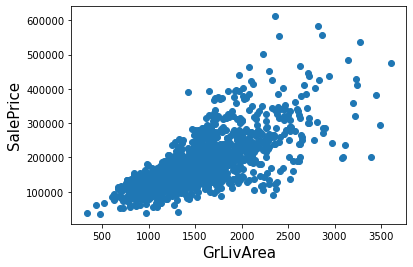

In [3]:
plt.scatter(x = df_house_extracted_wool['GrLivArea'], y = df_house_extracted_wool['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [4]:
### define a fuction for printing RMSLE values of each regression model
def print_rmsle_values(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    ### print and return RMSLE values of each model
    print('#'*5, model.__class__.__name__,'#'*5)
    # not to make nan values from np.log1p
    y_test_ = y_test - y_test.min() + 1
    # plug y_test_ into np.log1p
    log_y = np.log1p(y_test_)
    # not to make nan values from np.log1p
    pred_ = pred - pred.min() + 1
    # plug pred_ into np.log1p
    log_pred = np.log1p(pred_)
    # get squared error
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))
    # return RMSLE value
    return rmsle
###-------------------------------------------------------------------------------------------------
### define a function for printing best parameters for modeling
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [519]:
def print_best_params2(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
    return grid_model.best_params_

In [754]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
def ordinal_encoder(col_name):
 
    str_col4orginal = col_name
    str_col4orginal_ = str_col4orginal + '_'
    df_house[str_col4orginal_] = 0
    #--------------------------------------
    for i in range(len(df_house)):
        if df_house[str_col4orginal].iloc[i] == 'TA':
            df_house[str_col4orginal_].iloc[i] = 3
        elif df_house[str_col4orginal].iloc[i] == 'Gd':
            df_house[str_col4orginal_].iloc[i] = 4
        elif df_house[str_col4orginal].iloc[i] == 'Ex':
            df_house[str_col4orginal_].iloc[i] = 5
        elif df_house[str_col4orginal].iloc[i] == 'Fa':
            df_house[str_col4orginal_].iloc[i] = 2  
        elif df_house[str_col4orginal].iloc[i] == 'Po':
            df_house[str_col4orginal_].iloc[i] = 1      
            

In [774]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
def ordinal_encoder2(col_name):
 
    str_col4orginal = col_name
    str_col4orginal_ = str_col4orginal + '_'
    df_house_test[str_col4orginal_] = 0
    #--------------------------------------
    for i in range(len(df_house_test)):
        if df_house_test[str_col4orginal].iloc[i] == 'TA':
            df_house_test[str_col4orginal_].iloc[i] = 3
        elif df_house_test[str_col4orginal].iloc[i] == 'Gd':
            df_house_test[str_col4orginal_].iloc[i] = 4
        elif df_house_test[str_col4orginal].iloc[i] == 'Ex':
            df_house_test[str_col4orginal_].iloc[i] = 5
        elif df_house_test[str_col4orginal].iloc[i] == 'Fa':
            df_house_test[str_col4orginal_].iloc[i] = 2  
        elif df_house_test[str_col4orginal].iloc[i] == 'Po':
            df_house_test[str_col4orginal_].iloc[i] = 1      
            

In [ ]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
str_col4orginal = 'BsmtCond'
str_col4orginal_ = str_col4orginal + '_'
df_house[str_col4orginal_] = 0
#--------------------------------------
for i in range(len(df_house)):
    if df_house[str_col4orginal].iloc[i] == 'TA':
        df_house[str_col4orginal_].iloc[i] = 3
    elif df_house[str_col4orginal].iloc[i] == 'Gd':
        df_house[str_col4orginal_].iloc[i] = 4
    elif df_house[str_col4orginal].iloc[i] == 'Ex':
        df_house[str_col4orginal_].iloc[i] = 5
    elif df_house[str_col4orginal].iloc[i] == 'Fa':
        df_house[str_col4orginal_].iloc[i] = 2  
    elif df_house[str_col4orginal].iloc[i] == 'Po':
        df_house[str_col4orginal_].iloc[i] = 1      

In [36]:
df_house_extracted3 = df_house_extracted_wool.copy(deep=True)
df_house_extracted4 = df_house_extracted_wool.copy(deep=True)
df_house_extracted5 = df_house_extracted_wool.copy(deep=True)
df_house_extracted6 = df_house_extracted_wool.copy(deep=True)
df_house_extracted7 = df_house_extracted_wool.copy(deep=True)
df_house_extracted8 = df_house_extracted_wool.copy(deep=True)
df_house_extracted9 = df_house_extracted_wool.copy(deep=True)
df_house_extracted10 = df_house_extracted_wool.copy(deep=True)
df_house_extracted11 = df_house_extracted_wool.copy(deep=True)
df_house_extracted12 = df_house_extracted_wool.copy(deep=True)
df_house_extracted13 = df_house_extracted_wool.copy(deep=True)
df_house_extracted14 = df_house_extracted_wool.copy(deep=True)

In [485]:
df_house_extracted15 = df_house_extracted_wool.copy(deep=True)
df_house_extracted16 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted17 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted18 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted19 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted20 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted21 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted22 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted23 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted24 = df_house_extracted_wool.copy(deep=True) 
df_house_extracted25 = df_house_extracted_wool.copy(deep=True) 

In [728]:
df_house_extracted26 = df_house_extracted_wool.copy(deep=True)
df_house_extracted27 = df_house_extracted_wool.copy(deep=True)
df_house_extracted28 = df_house_extracted_wool.copy(deep=True)
df_house_extracted29 = df_house_extracted_wool.copy(deep=True)
df_house_extracted30 = df_house_extracted_wool.copy(deep=True)
df_house_extracted31 = df_house_extracted_wool.copy(deep=True)
df_house_extracted32 = df_house_extracted_wool.copy(deep=True)

In [641]:
df_house_extracted18 = df_house_extracted_wool.copy(deep=True) 

In [681]:
df_house_extracted21 = df_house_extracted_wool.copy(deep=True) 

In [260]:
df_house_extracted10 = df_house_extracted_wool.copy(deep=True)

In [300]:
df_house_extracted12 = df_house_extracted11.copy(deep=True)
df_house_extracted13 = df_house_extracted11.copy(deep=True)
df_house_extracted14 = df_house_extracted11.copy(deep=True)

In [478]:
df_house_extracted15 = df_house_extracted11.copy(deep=True)
df_house_extracted16 = df_house_extracted11.copy(deep=True)
df_house_extracted17 = df_house_extracted11.copy(deep=True)
df_house_extracted18 = df_house_extracted11.copy(deep=True)
df_house_extracted19 = df_house_extracted11.copy(deep=True)
df_house_extracted20 = df_house_extracted11.copy(deep=True)
df_house_extracted21 = df_house_extracted11.copy(deep=True)
df_house_extracted22 = df_house_extracted11.copy(deep=True)
df_house_extracted23 = df_house_extracted11.copy(deep=True)
df_house_extracted24 = df_house_extracted11.copy(deep=True)
df_house_extracted25 = df_house_extracted11.copy(deep=True)

In [729]:
df_house_extracted26 = df_house_extracted11.copy(deep=True)
df_house_extracted27 = df_house_extracted11.copy(deep=True)
df_house_extracted28 = df_house_extracted11.copy(deep=True)
df_house_extracted29 = df_house_extracted11.copy(deep=True)
df_house_extracted30 = df_house_extracted11.copy(deep=True)
df_house_extracted31 = df_house_extracted11.copy(deep=True)
df_house_extracted32 = df_house_extracted11.copy(deep=True)

In [28]:
len(df_house_extracted3)

1440

In [7]:
df_house_test_extracted = pd.read_csv('C:/Users/thsong/df_house_test_extracted_tmp.csv')

In [65]:
df_house_test_extracted3 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted4 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted5 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted6 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted7 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted8 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted9 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted10 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted11 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted12 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted13 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted14 = df_house_test_extracted.copy(deep=True)

In [480]:
df_house_test_extracted15 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted16 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted17 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted18 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted19 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted20 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted21 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted22 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted23 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted24 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted25 = df_house_test_extracted.copy(deep=True)

In [730]:
df_house_test_extracted26 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted27 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted28 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted29 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted30 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted31 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted32 = df_house_test_extracted.copy(deep=True)

In [643]:
df_house_test_extracted18 = df_house_test_extracted.copy(deep=True)

In [38]:
df_house_test3 = df_house_test.copy(deep=True)
df_house_test4 = df_house_test.copy(deep=True)
df_house_test5 = df_house_test.copy(deep=True)
df_house_test6 = df_house_test.copy(deep=True)
df_house_test7 = df_house_test.copy(deep=True)
df_house_test8 = df_house_test.copy(deep=True)
df_house_test9 = df_house_test.copy(deep=True)
df_house_test10 = df_house_test.copy(deep=True)
df_house_test11 = df_house_test.copy(deep=True)
df_house_test12 = df_house_test.copy(deep=True)
df_house_test13 = df_house_test.copy(deep=True)
df_house_test14 = df_house_test.copy(deep=True)

In [481]:
df_house_test15 = df_house_test.copy(deep=True)
df_house_test16 = df_house_test.copy(deep=True)
df_house_test17 = df_house_test.copy(deep=True)
df_house_test18 = df_house_test.copy(deep=True)
df_house_test19 = df_house_test.copy(deep=True)
df_house_test20 = df_house_test.copy(deep=True)
df_house_test21 = df_house_test.copy(deep=True)
df_house_test22 = df_house_test.copy(deep=True)
df_house_test23 = df_house_test.copy(deep=True)
df_house_test24 = df_house_test.copy(deep=True)
df_house_test25 = df_house_test.copy(deep=True)

In [732]:
df_house_test26 = df_house_test.copy(deep=True)
df_house_test27 = df_house_test.copy(deep=True)
df_house_test28 = df_house_test.copy(deep=True)
df_house_test29 = df_house_test.copy(deep=True)
df_house_test30 = df_house_test.copy(deep=True)
df_house_test31 = df_house_test.copy(deep=True)
df_house_test32 = df_house_test.copy(deep=True)

In [642]:
df_house_test18 = df_house_test.copy(deep=True)

In [837]:
df_house_test32 = df_house_test.copy(deep=True)

In [845]:
df_house_test40 = df_house_test32.copy(deep=True)

In [13]:
# ordinary linear regression model
line_fitter5 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter5 = Ridge(alpha=149)
lasso_fitter5 = Lasso(alpha=0.0018)
elasticNet_fitter5 = ElasticNet(alpha = 0.13, l1_ratio=0.001)
# ensemble models
xgb_fitter5 = XGBRegressor(n_estimators=50)
gbm_fitter5 = GradientBoostingRegressor(n_estimators=161)
rf_fitter5 = RandomForestRegressor(n_estimators=180)
lgbm_fitter5 = LGBMRegressor(n_estimators=126)
bg_fitter5 = BaggingRegressor(n_estimators=162)
et_fitter5 = ExtraTreesRegressor(n_estimators=159)

### 3rd trial

In [27]:
df_house_extracted3.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_', 'Foundation_',
       'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual_',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_', 'GarageType_',
       'House_Age', 'Garage_Age', 'GarageFinish_', 'Exterior_Avg', 'SalePrice',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnf

In [39]:
### Feature Engineering
df_house_extracted3['IndoorSF'] =  df_house_extracted3['BsmtFinSF1'] + df_house_extracted3['BsmtUnfSF'] \
                                + df_house_extracted3['TotalBsmtSF'] + df_house_extracted3['TotalBsmtSF'] \
                                + df_house_extracted3['1stFlrSF'] \
                                + df_house_extracted3['2ndFlrSF'] + df_house_extracted3['GrLivArea']
df_house_extracted3['OutdoorSF'] = df_house_extracted3['WoodDeckSF'] + df_house_extracted3['OpenPorchSF']
df_house_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
df_house_extracted3['GarageArea_Unit'] =  df_house_extracted3['GarageArea'] / df_house_extracted3['GarageCars']
df_house_extracted3['GarageArea_Unit'] = df_house_extracted3['GarageArea_Unit'].fillna(0)
df_house_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)
#--------------------------------------------------------------------------------
df_house_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_extracted3)):
    if df_house_extracted3.MSSubClass.iloc[i] == 60:
        df_house_extracted3.MSSubClass_.iloc[i] = 299  
    elif df_house_extracted3.MSSubClass.iloc[i] == 20:
        df_house_extracted3.MSSubClass_.iloc[i] = 536
    elif df_house_extracted3.MSSubClass.iloc[i] == 50:
        df_house_extracted3.MSSubClass_.iloc[i] = 144
    elif df_house_extracted3.MSSubClass.iloc[i] == 120:
        df_house_extracted3.MSSubClass_.iloc[i] = 87
    elif df_house_extracted3.MSSubClass.iloc[i] == 30:
        df_house_extracted3.MSSubClass_.iloc[i] = 69
    elif df_house_extracted3.MSSubClass.iloc[i] == 160:
        df_house_extracted3.MSSubClass_.iloc[i] = 63
    elif df_house_extracted3.MSSubClass.iloc[i] == 70:
        df_house_extracted3.MSSubClass_.iloc[i] = 60
    elif df_house_extracted3.MSSubClass.iloc[i] == 80:
        df_house_extracted3.MSSubClass_.iloc[i] = 58
    elif df_house_extracted3.MSSubClass.iloc[i] == 90:
        df_house_extracted3.MSSubClass_.iloc[i] = 52
    elif df_house_extracted3.MSSubClass.iloc[i] == 190:
        df_house_extracted3.MSSubClass_.iloc[i] = 30
    elif df_house_extracted3.MSSubClass.iloc[i] == 85:
        df_house_extracted3.MSSubClass_.iloc[i] = 20
    elif df_house_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_extracted3.MSSubClass_.iloc[i] = 16
    elif df_house_extracted3.MSSubClass.iloc[i] == 45:
        df_house_extracted3.MSSubClass_.iloc[i] = 12
    elif df_house_extracted3.MSSubClass.iloc[i] == 180:
        df_house_extracted3.MSSubClass_.iloc[i] = 10
    elif df_house_extracted3.MSSubClass.iloc[i] == 40:
        df_house_extracted3.MSSubClass_.iloc[i] = 4
#---------------------------------------------------------------------------------
df_house_extracted3.drop(['MSSubClass'],axis=1,inplace=True)
# one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
LotConfig_ohe = pd.get_dummies(df_house['LotConfig'],prefix='LotConfig')
##BldgType_ohe = pd.get_dummies(df_house['BldgType'],prefix='BldgType')
RoofStyle_ohe = pd.get_dummies(df_house['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
# concat the data
df_house_extracted3_ = pd.concat([df_house_extracted3,LotShape_ohe,LotConfig_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1)
df_house_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 
                           'GarageType_', 'GarageFinish_'],axis=1,inplace=True)
#=================================================
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted3_[new_col] = scaled_data_tst
#-----------------------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted3_['SalePrice'])
df_house_extracted3_['SalePrice(log)'] = log_SalePrice
#===================================================================
X = df_house_extracted3_[['MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'BsmtQual_(scaled)', 'HeatingQC_(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'Exterior_Avg(scaled)', 'IndoorSF(scaled)', 'OutdoorSF(scaled)',
       'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)',
        'LotShape_IR1','LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 
        'LotConfig_Corner','LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3','LotConfig_Inside', 
        'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 
        'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 
        'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 
        'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn','GarageFinish_Unf'          
        ]]
y = df_house_extracted3_['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
len(X), len(X.columns)

(1460, 70)

In [21]:
for i in range(len(df_house_extracted3_)):
    for j in range(len(df_house_extracted3_.columns)):
        if math.isnan(df_house_extracted3_.iloc[i,j]) or math.isinf(df_house_extracted3_.iloc[i,j]):
            print(i,j)

1440 0
1440 1
1440 2
1440 3
1440 4
1440 5
1440 6
1440 7
1440 8
1440 9
1440 10
1440 11
1440 12
1440 13
1440 14
1440 15
1440 16
1440 17
1440 18
1440 19
1440 20
1440 21
1440 22
1440 23
1440 24
1440 25
1440 26
1440 27
1440 28
1440 29
1440 30
1440 31
1440 32
1440 33
1440 34
1440 35
1440 36
1440 37
1440 38
1440 39
1440 40
1440 41
1440 42
1440 43
1440 44
1440 45
1440 46
1440 47
1440 48
1440 49
1440 50
1440 51
1440 52
1440 53
1440 54
1440 55
1440 56
1440 57
1440 58
1440 59
1440 60
1440 61
1440 62
1440 63
1440 64
1440 65
1440 66
1440 67
1440 68
1440 69
1440 70
1440 71
1440 116
1440 117
1440 118
1440 119
1441 0
1441 1
1441 2
1441 3
1441 4
1441 5
1441 6
1441 7
1441 8
1441 9
1441 10
1441 11
1441 12
1441 13
1441 14
1441 15
1441 16
1441 17
1441 18
1441 19
1441 20
1441 21
1441 22
1441 23
1441 24
1441 25
1441 26
1441 27
1441 28
1441 29
1441 30
1441 31
1441 32
1441 33
1441 34
1441 35
1441 36
1441 37
1441 38
1441 39
1441 40
1441 41
1441 42
1441 43
1441 44
1441 45
1441 46
1441 47
1441 48
1441 49
1441 50


In [24]:
df_house_extracted3_.iloc[1440,0:26]

MSZoning_             NaN
LotFrontage           NaN
LotArea               NaN
Neighborhood_         NaN
HouseStyle_           NaN
OverallQual           NaN
OverallCond           NaN
MasVnrArea            NaN
ExterQual_            NaN
BsmtQual_             NaN
HeatingQC_            NaN
BsmtFullBath          NaN
FullBath              NaN
HalfBath              NaN
BedroomAbvGr          NaN
KitchenQual_          NaN
TotRmsAbvGrd          NaN
Fireplaces            NaN
FireplaceQu_          NaN
House_Age             NaN
Garage_Age            NaN
Exterior_Avg          NaN
SalePrice             NaN
MSSubClass(scaled)    NaN
MSZoning_(scaled)     NaN
LotFrontage(scaled)   NaN
Name: 1440, dtype: float64

In [18]:
for i in range(len(X)):
    for j in range(len(X.columns)):
        if math.isnan(X.iloc[i,j]) or math.isinf(X.iloc[i,j]):
            print(i,j)

1440 0
1440 1
1440 2
1440 3
1440 4
1440 5
1440 6
1440 7
1440 8
1440 9
1440 10
1440 11
1440 12
1440 13
1440 14
1440 15
1440 16
1440 17
1440 18
1440 19
1440 20
1440 21
1440 22
1440 23
1440 24
1440 25
1441 0
1441 1
1441 2
1441 3
1441 4
1441 5
1441 6
1441 7
1441 8
1441 9
1441 10
1441 11
1441 12
1441 13
1441 14
1441 15
1441 16
1441 17
1441 18
1441 19
1441 20
1441 21
1441 22
1441 23
1441 24
1441 25
1442 0
1442 1
1442 2
1442 3
1442 4
1442 5
1442 6
1442 7
1442 8
1442 9
1442 10
1442 11
1442 12
1442 13
1442 14
1442 15
1442 16
1442 17
1442 18
1442 19
1442 20
1442 21
1442 22
1442 23
1442 24
1442 25
1443 0
1443 1
1443 2
1443 3
1443 4
1443 5
1443 6
1443 7
1443 8
1443 9
1443 10
1443 11
1443 12
1443 13
1443 14
1443 15
1443 16
1443 17
1443 18
1443 19
1443 20
1443 21
1443 22
1443 23
1443 24
1443 25
1444 0
1444 1
1444 2
1444 3
1444 4
1444 5
1444 6
1444 7
1444 8
1444 9
1444 10
1444 11
1444 12
1444 13
1444 14
1444 15
1444 16
1444 17
1444 18
1444 19
1444 20
1444 21
1444 22
1444 23
1444 24
1444 25
1445 0
144

In [31]:
len(df_house_extracted3)

1440

In [30]:
len(df_house_extracted3_)

1460

In [29]:
len(X)

1460

In [20]:
X.iloc[1440,0:26]

MSZoning_(scaled)         NaN
LotFrontage(scaled)       NaN
LotArea(scaled)           NaN
Neighborhood_(scaled)     NaN
HouseStyle_(scaled)       NaN
OverallQual(scaled)       NaN
OverallCond(scaled)       NaN
MasVnrArea(scaled)        NaN
ExterQual_(scaled)        NaN
BsmtQual_(scaled)         NaN
HeatingQC_(scaled)        NaN
BsmtFullBath(scaled)      NaN
FullBath(scaled)          NaN
HalfBath(scaled)          NaN
BedroomAbvGr(scaled)      NaN
KitchenQual_(scaled)      NaN
TotRmsAbvGrd(scaled)      NaN
Fireplaces(scaled)        NaN
FireplaceQu_(scaled)      NaN
House_Age(scaled)         NaN
Garage_Age(scaled)        NaN
Exterior_Avg(scaled)      NaN
IndoorSF(scaled)          NaN
OutdoorSF(scaled)         NaN
GarageArea_Unit(scaled)   NaN
MSSubClass_(scaled)       NaN
Name: 1440, dtype: float64

In [44]:
ridge_params2 = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1273, and the best parameter is : {'alpha': 7}


In [47]:
lasso_params2 = {'alpha':[0.0001,0.001,0.002,0.0025]} # just 0.0001
print_best_params(lasso_fitter5,lasso_params2) 

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1274, and the best parameter is : {'alpha': 0.0001}


In [49]:
eln_params2 = {'alpha':[0.0001,0.001,0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.01,0.02,0.022]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.006209775399838, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.841486677838895, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.040621384821817, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1272, and the best parameter is : {'alpha': 0.01, 'l1_ratio': 0.02}


In [50]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 47}


In [53]:
candidate_params = {'n_estimators' : [245,246,247,248,249,250,251,252,253,254]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1239, and the best parameter is : {'n_estimators': 247}


In [54]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1394, and the best parameter is : {'n_estimators': 163}


In [57]:
candidate_params = {'n_estimators' : [130,131,132,133,134,135,140]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1305, and the best parameter is : {'n_estimators': 134}


In [58]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1398, and the best parameter is : {'n_estimators': 132}


In [59]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1362, and the best parameter is : {'n_estimators': 132}


In [60]:
# ordinary linear regression model
line_fitter3 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter3 = Ridge(alpha=7)
lasso_fitter3 = Lasso(alpha=0.0001)
elasticNet_fitter3 = ElasticNet(alpha = 0.01, l1_ratio=0.02)
# ensemble models
xgb_fitter3 = XGBRegressor(n_estimators=47)
gbm_fitter3 = GradientBoostingRegressor(n_estimators=247)
rf_fitter3 = RandomForestRegressor(n_estimators=163)
lgbm_fitter3 = LGBMRegressor(n_estimators=134)
bg_fitter3 = BaggingRegressor(n_estimators=132)
et_fitter3 = ExtraTreesRegressor(n_estimators=132)

In [61]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter3,ridge_fitter3,lasso_fitter3,elasticNet_fitter3,xgb_fitter3,gbm_fitter3,rf_fitter3,lgbm_fitter3,bg_fitter3,et_fitter3]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.0689117293017919
##### Ridge #####
RMSLE : 0.07699957425281752
##### Lasso #####
RMSLE : 0.07190494757027545
##### ElasticNet #####
RMSLE : 0.08129929476065269
##### XGBRegressor #####
RMSLE : 0.052546760529252966
##### GradientBoostingRegressor #####
RMSLE : 0.040535649761447315
##### RandomForestRegressor #####
RMSLE : 0.08435245614927647
##### LGBMRegressor #####
RMSLE : 0.07476513924254688
##### BaggingRegressor #####
RMSLE : 0.06843207576200258
##### ExtraTreesRegressor #####
RMSLE : 0.11865921277155865


{'GradientBoostingRegressor(n_estimators=247)': 0.040535649761447315,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=47, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.052546760529252966,
 'BaggingRegressor(n_estimators=132)': 0.06843207576200258,
 'LinearRegression()': 0.0689117293017919,
 'Lasso(alpha=0.0001)': 0.07190494757027545,
 'LGBMRegressor(n_estimators=134)': 0.07476513924254688,
 '

In [66]:
### Feature Engineering
df_house_test_extracted3['IndoorSF'] =  df_house_test_extracted3['BsmtFinSF1'] + df_house_test_extracted3['BsmtUnfSF'] \
                                + df_house_test_extracted3['TotalBsmtSF'] + df_house_test_extracted3['TotalBsmtSF'] \
                                + df_house_test_extracted3['1stFlrSF'] \
                                + df_house_test_extracted3['2ndFlrSF'] + df_house_test_extracted3['GrLivArea']
df_house_test_extracted3['OutdoorSF'] = df_house_test_extracted3['WoodDeckSF'] + df_house_test_extracted3['OpenPorchSF']
df_house_test_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
df_house_test_extracted3['GarageArea_Unit'] =  df_house_test_extracted3['GarageArea'] / df_house_test_extracted3['GarageCars']
df_house_test_extracted3['GarageArea_Unit'] = df_house_test_extracted3['GarageArea_Unit'].fillna(0)
df_house_test_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)
#-----------------------------------------------------------------
df_house_test_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_test_extracted3)):
    if df_house_test_extracted3.MSSubClass.iloc[i] == 60:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 299    
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 20:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 536  
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 50:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 144
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 120:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 87
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 30:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 69
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 160:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 63
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 70:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 60
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 80:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 58
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 90:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 52
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 190:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 30
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 85:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 20
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_test_extracted3.MSSubClass_.iloc[i] = 16
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 45:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 12
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 180:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 10
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 40:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 4
#------------------------
df_house_test_extracted3.drop(['MSSubClass'],axis=1,inplace=True)
#----------------------------------------
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
LotConfig_ohe = pd.get_dummies(df_house_test['LotConfig'],prefix='LotConfig')
BldgType_ohe = pd.get_dummies(df_house_test['BldgType'],prefix='BldgType')
RoofStyle_ohe = pd.get_dummies(df_house_test['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house_test['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house_test['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house_test['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
#--------------------------------------------------------------------------------------------------
#--concat--------------------------------------------------------------------------------------------
df_house_test_extracted3_ = pd.concat([df_house_test_extracted3,LotShape_ohe,LotConfig_ohe,BldgType_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1 )
#--------------------------------------------
df_house_test_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 'GarageType_', 'GarageFinish_',
                          'BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE'
                          ],axis=1,inplace=True)
#-------------------------------------------------------
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted3_[new_col] = scaled_data_tst
#====================================================================================================
df_house_test_extracted3_2b_predicted = df_house_test_extracted3_[['LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'BsmtQual_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'Exterior_Avg(scaled)', 'IndoorSF(scaled)',
       'OutdoorSF(scaled)', 'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)']]
#----------------------------------------------------------------------------------
result_from_model = gbm_fitter3.predict(df_house_test_extracted3_2b_predicted)
df_house_test3['SalePrice'] = 0
df_house_test3['SalePrice'] = np.expm1(result_from_model)
df_house_test3[['Id','SalePrice']].to_csv('C:/Users/thsong/submission7_wool.csv',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [67]:
df_house_test3[['Id','SalePrice']]

,Id,SalePrice
0,1461,147701.437870
1,1462,163797.828526
2,1463,146501.964120
3,1464,146907.683302
4,1465,173777.750031
...,...,...
1454,2915,170145.731973
1455,2916,170145.731973
1456,2917,144400.906238
1457,2918,172263.670762


### 4th trial

In [68]:
### Feature Engineering
df_house_extracted4['IndoorSF'] =  df_house_extracted4['BsmtFinSF1'] + df_house_extracted4['BsmtUnfSF'] \
                                + df_house_extracted4['TotalBsmtSF'] + df_house_extracted4['TotalBsmtSF'] \
                                + df_house_extracted4['1stFlrSF'] \
                                + df_house_extracted4['2ndFlrSF'] + df_house_extracted4['GrLivArea']
df_house_extracted4['OutdoorSF'] = df_house_extracted4['WoodDeckSF'] + df_house_extracted4['OpenPorchSF']
# drop used columns
df_house_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#--------------
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
#---------------
df_house_extracted4_ = pd.concat([df_house_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#---------------------------------------------------------------------------------------------------------------
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted4_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted4_['SalePrice'])
df_house_extracted4_['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
y = df_house_extracted4_['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
ridge_params2 = {'alpha':[0.1,0.2,0.3,0.4]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1277, and the best parameter is : {'alpha': 0.3}


In [79]:
lasso_params2 = {'alpha':[0.0001,0.001,0.002,0.0025]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1277, and the best parameter is : {'alpha': 0.0001}


In [82]:
eln_params2 = {'alpha':[0.0001,0.001,0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.002,0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.1342186873577695, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.016751884769172, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6941507818049564, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1276, and the best parameter is : {'alpha': 0.0001, 'l1_ratio': 0.6}


In [83]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1316, and the best parameter is : {'n_estimators': 51}


In [86]:
candidate_params = {'n_estimators' : [160,161,162,163,164,165]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1239, and the best parameter is : {'n_estimators': 161}


In [87]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1385, and the best parameter is : {'n_estimators': 157}


In [89]:
candidate_params = {'n_estimators' : [120,121,122,123,124,125,126]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1285, and the best parameter is : {'n_estimators': 121}


In [90]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1386, and the best parameter is : {'n_estimators': 131}


In [91]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1346, and the best parameter is : {'n_estimators': 128}


In [92]:
# ordinary linear regression model
line_fitter4 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter4 = Ridge(alpha=0.3)
lasso_fitter4 = Lasso(alpha=0.0001)
elasticNet_fitter4 = ElasticNet(alpha = 0.0001, l1_ratio=0.6)
# ensemble models
xgb_fitter4 = XGBRegressor(n_estimators=51)
gbm_fitter4 = GradientBoostingRegressor(n_estimators=161)
rf_fitter4 = RandomForestRegressor(n_estimators=157)
lgbm_fitter4 = LGBMRegressor(n_estimators=121)
bg_fitter4 = BaggingRegressor(n_estimators=131)
et_fitter4 = ExtraTreesRegressor(n_estimators=128)

In [93]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter4,ridge_fitter4,lasso_fitter4,elasticNet_fitter4,xgb_fitter4,gbm_fitter4,rf_fitter4,lgbm_fitter4,bg_fitter4,et_fitter4]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.07293327475750948
##### Ridge #####
RMSLE : 0.07390681387148773
##### Lasso #####
RMSLE : 0.07553679414518087
##### ElasticNet #####
RMSLE : 0.07463348081421867
##### XGBRegressor #####
RMSLE : 0.04620234371023779
##### GradientBoostingRegressor #####
RMSLE : 0.03924377578653818
##### RandomForestRegressor #####
RMSLE : 0.08749809783778185
##### LGBMRegressor #####
RMSLE : 0.08231942909373037
##### BaggingRegressor #####
RMSLE : 0.0756670577661276
##### ExtraTreesRegressor #####
RMSLE : 0.11976691452861402


{'GradientBoostingRegressor(n_estimators=161)': 0.03924377578653818,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=51, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.04620234371023779,
 'LinearRegression()': 0.07293327475750948,
 'Ridge(alpha=0.3)': 0.07390681387148773,
 'ElasticNet(alpha=0.0001, l1_ratio=0.6)': 0.07463348081421867,
 'Lasso(alpha=0.0001)': 0.07553679414518087,
 'BaggingRegre

In [94]:
### Feature Engineering
df_house_test_extracted4['IndoorSF'] =  df_house_test_extracted4['BsmtFinSF1'] + df_house_test_extracted4['BsmtUnfSF'] \
                                + df_house_test_extracted4['TotalBsmtSF'] + df_house_test_extracted4['TotalBsmtSF'] \
                                + df_house_test_extracted4['1stFlrSF'] \
                                + df_house_test_extracted4['2ndFlrSF'] + df_house_test_extracted4['GrLivArea']
df_house_test_extracted4['OutdoorSF'] = df_house_test_extracted4['WoodDeckSF'] + df_house_test_extracted4['OpenPorchSF']
# drop used columns
df_house_test_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')

df_house_test_extracted4_ = pd.concat([df_house_test_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)

df_house_test_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)

col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted4_[new_col] = scaled_data_tst
#=======================================================================================
df_house_test_extracted4_2b_predicted = df_house_test_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
#=======================================================
result_from_model2 = gbm_fitter4.predict(df_house_test_extracted4_2b_predicted)
df_house_test4['SalePrice'] = 0
df_house_test4['SalePrice'] = np.expm1(result_from_model2)
df_house_test4[['Id','SalePrice']]
df_house_test4[['Id','SalePrice']].to_csv('C:/Users/thsong/submission7_2_re.csv',index=False)

In [95]:
df_house_test4[['Id','SalePrice']]

,Id,SalePrice
0,1461,125996.834575
1,1462,161236.791313
2,1463,184205.782467
3,1464,194764.533530
4,1465,182628.945209
...,...,...
1454,2915,84200.146157
1455,2916,87343.739896
1456,2917,189474.004755
1457,2918,112506.295937


### 5th trial

In [96]:
### Feature Engineering
# df_house_extracted5['IndoorSF'] =  df_house_extracted5['BsmtFinSF1'] + df_house_extracted5['BsmtUnfSF'] \
#                                 + df_house_extracted5['TotalBsmtSF'] + df_house_extracted5['TotalBsmtSF'] \
#                                 + df_house_extracted5['1stFlrSF'] \
#                                 + df_house_extracted5['2ndFlrSF'] + df_house_extracted5['GrLivArea']
# df_house_extracted5['OutdoorSF'] = df_house_extracted5['WoodDeckSF'] + df_house_extracted5['OpenPorchSF']
# # drop used columns
# df_house_extracted5.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
# df_house_extracted5.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#=======================================================================================================================================
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
#---------------
df_house_extracted5_ = pd.concat([df_house_extracted5,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_extracted5_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted5_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted5_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted5_['SalePrice'])
df_house_extracted5_['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted5_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted5_['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
ridge_params2 = {'alpha':[53,54,55,56,57]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1396, and the best parameter is : {'alpha': 54}


In [103]:
lasso_params2 = {'alpha':[0.0001,0.001,0.002,0.0021,0.0022]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1397, and the best parameter is : {'alpha': 0.001}


In [104]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1397, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.05}


In [105]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1487, and the best parameter is : {'n_estimators': 50}


In [106]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1366, and the best parameter is : {'n_estimators': 168}


In [107]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.15, and the best parameter is : {'n_estimators': 161}


In [109]:
candidate_params = {'n_estimators' : [120,121,122,123,124,125,126]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1407, and the best parameter is : {'n_estimators': 121}


In [110]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.15, and the best parameter is : {'n_estimators': 132}


In [111]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1495, and the best parameter is : {'n_estimators': 133}


In [112]:
# ordinary linear regression model
line_fitter5 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter5 = Ridge(alpha=54)
lasso_fitter5 = Lasso(alpha=0.001)
elasticNet_fitter5 = ElasticNet(alpha = 0.02, l1_ratio=0.05)
# ensemble models
xgb_fitter5 = XGBRegressor(n_estimators=50)
gbm_fitter5 = GradientBoostingRegressor(n_estimators=168)
rf_fitter5 = RandomForestRegressor(n_estimators=161)
lgbm_fitter5 = LGBMRegressor(n_estimators=121)
bg_fitter5 = BaggingRegressor(n_estimators=132)
et_fitter5 = ExtraTreesRegressor(n_estimators=133)

In [113]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter5,ridge_fitter5,lasso_fitter5,elasticNet_fitter5,xgb_fitter5,gbm_fitter5,rf_fitter5,lgbm_fitter5,bg_fitter5,et_fitter5]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09823005960660242
##### Ridge #####
RMSLE : 0.10747023318949063
##### Lasso #####
RMSLE : 0.10404353169722295
##### ElasticNet #####
RMSLE : 0.10588108319897632
##### XGBRegressor #####
RMSLE : 0.09340307703519207
##### GradientBoostingRegressor #####
RMSLE : 0.04856505112620272
##### RandomForestRegressor #####
RMSLE : 0.09391243444298303
##### LGBMRegressor #####
RMSLE : 0.07863823070594855
##### BaggingRegressor #####
RMSLE : 0.08096816462634625
##### ExtraTreesRegressor #####
RMSLE : 0.10487832221656353


{'GradientBoostingRegressor(n_estimators=168)': 0.04856505112620272,
 'LGBMRegressor(n_estimators=121)': 0.07863823070594855,
 'BaggingRegressor(n_estimators=132)': 0.08096816462634625,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.09340307703519207,
 'RandomForestRegressor(n_estimators=161)': 0.09391243444298303,
 'LinearRegression()': 0.09

In [114]:
### Feature Engineering
# df_house_test_extracted5['IndoorSF'] =  df_house_test_extracted5['BsmtFinSF1'] + df_house_test_extracted5['BsmtUnfSF'] \
#                                 + df_house_test_extracted5['TotalBsmtSF'] + df_house_test_extracted5['TotalBsmtSF'] \
#                                 + df_house_test_extracted5['1stFlrSF'] \
#                                 + df_house_test_extracted5['2ndFlrSF'] + df_house_test_extracted5['GrLivArea']
# df_house_test_extracted5['OutdoorSF'] = df_house_test_extracted5['WoodDeckSF'] + df_house_test_extracted5['OpenPorchSF']
# # drop used columns
# df_house_test_extracted5.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
# df_house_test_extracted5.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#======================================================================================================================================
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
df_house_test_extracted5_ = pd.concat([df_house_test_extracted5,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_test_extracted5_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#======================================================================================================================================
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted5_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted5_[new_col] = scaled_data_tst

In [115]:
df_house_test_extracted5_2b_predicted = df_house_test_extracted5_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']]
result_from_model5 = gbm_fitter5.predict(df_house_test_extracted5_2b_predicted)
df_house_test5['SalePrice'] = 0
df_house_test5['SalePrice'] = np.expm1(result_from_model5)
df_house_test5[['Id','SalePrice']]

,Id,SalePrice
0,1461,110595.512411
1,1462,154999.702996
2,1463,170029.477737
3,1464,185275.731920
4,1465,200082.389843
...,...,...
1454,2915,85980.599397
1455,2916,91987.425878
1456,2917,182812.010459
1457,2918,106685.708249


In [116]:
df_house_test5[['Id','SalePrice']].to_csv('C:/Users/thsong/submission8_re.csv',index=False)

### 6th trial

In [117]:
### Feature Engineering
df_house_extracted6['IndoorSF'] =  df_house_extracted6['BsmtFinSF1'] + df_house_extracted6['BsmtUnfSF'] \
                                + df_house_extracted6['TotalBsmtSF'] + df_house_extracted6['TotalBsmtSF'] \
                                + df_house_extracted6['1stFlrSF'] \
                                + df_house_extracted6['2ndFlrSF'] + df_house_extracted6['GrLivArea']
df_house_extracted6['OutdoorSF'] = df_house_extracted6['WoodDeckSF'] + df_house_extracted6['OpenPorchSF']
# drop used columns
df_house_extracted6.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted6.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#=======================================================================================================================================
# # reduced number of one hot encodings
# LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
# MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
# BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
# GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
# #---------------
# df_house_extracted6_ = pd.concat([df_house_extracted6,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
# df_house_extracted6_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_','BsmtExposure_','GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted6[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted6[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted6['SalePrice'])
df_house_extracted6['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted6[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',                
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
y = df_house_extracted6['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
ridge_params2 = {'alpha':[35,36,37,38,39,40,41,42,43,44]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1293, and the best parameter is : {'alpha': 38}


In [125]:
lasso_params2 = {'alpha':[0.0001,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0017,0.0018,0.0019,0.002]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1292, and the best parameter is : {'alpha': 0.0016}


In [126]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1291, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}


In [129]:
candidate_params = {'n_estimators' : [40,41,42,43,44,45,46]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.133, and the best parameter is : {'n_estimators': 44}


In [130]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1245, and the best parameter is : {'n_estimators': 166}


In [131]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1382, and the best parameter is : {'n_estimators': 155}


In [133]:
candidate_params = {'n_estimators' : [133,134,135,136,137,138,139,140]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1297, and the best parameter is : {'n_estimators': 134}


In [134]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1385, and the best parameter is : {'n_estimators': 132}


In [135]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1342, and the best parameter is : {'n_estimators': 133}


In [136]:
# ordinary linear regression model
line_fitter6 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter6 = Ridge(alpha=38)
lasso_fitter6 = Lasso(alpha=0.0016)
elasticNet_fitter6 = ElasticNet(alpha = 0.02, l1_ratio=0.07)
# ensemble models
xgb_fitter6 = XGBRegressor(n_estimators=44)
gbm_fitter6 = GradientBoostingRegressor(n_estimators=166)
rf_fitter6 = RandomForestRegressor(n_estimators=155)
lgbm_fitter6 = LGBMRegressor(n_estimators=134)
bg_fitter6 = BaggingRegressor(n_estimators=132)
et_fitter6 = ExtraTreesRegressor(n_estimators=133)
#----------------------------------------------------
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter6,ridge_fitter6,lasso_fitter6,elasticNet_fitter6,xgb_fitter6,gbm_fitter6,rf_fitter6,lgbm_fitter6,bg_fitter6,et_fitter6]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.08225473296988307
##### Ridge #####
RMSLE : 0.0891212501293168
##### Lasso #####
RMSLE : 0.08888009473618436
##### ElasticNet #####
RMSLE : 0.09242546522461227
##### XGBRegressor #####
RMSLE : 0.05438705471256312
##### GradientBoostingRegressor #####
RMSLE : 0.04686104406076806
##### RandomForestRegressor #####
RMSLE : 0.07380251922197711
##### LGBMRegressor #####
RMSLE : 0.07648222324605716
##### BaggingRegressor #####
RMSLE : 0.06503374685722582
##### ExtraTreesRegressor #####
RMSLE : 0.12258266317558172


{'GradientBoostingRegressor(n_estimators=166)': 0.04686104406076806,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=44, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.05438705471256312,
 'BaggingRegressor(n_estimators=132)': 0.06503374685722582,
 'RandomForestRegressor(n_estimators=155)': 0.07380251922197711,
 'LGBMRegressor(n_estimators=134)': 0.07648222324605716,
 'LinearRegression()': 0.08

In [137]:
### Feature Engineering
df_house_test_extracted6['IndoorSF'] =  df_house_test_extracted6['BsmtFinSF1'] + df_house_test_extracted6['BsmtUnfSF'] \
                                + df_house_test_extracted6['TotalBsmtSF'] + df_house_test_extracted6['TotalBsmtSF'] \
                                + df_house_test_extracted6['1stFlrSF'] \
                                + df_house_test_extracted6['2ndFlrSF'] + df_house_test_extracted6['GrLivArea']
df_house_test_extracted6['OutdoorSF'] = df_house_test_extracted6['WoodDeckSF'] + df_house_test_extracted6['OpenPorchSF']
# drop used columns
df_house_test_extracted6.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted6.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

#=======================================================================================================================================
# # reduced number of one hot encodings
# LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
# MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
# BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
# GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
# df_house_test_extracted6_ = pd.concat([df_house_test_extracted6,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
# df_house_test_extracted6_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted6[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted6[new_col] = scaled_data_tst
#===========================================================
df_house_test_extracted6_2b_predicted = df_house_test_extracted6[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
result_from_model6 = gbm_fitter6.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model6)
df_house_test6[['Id','SalePrice']]

,Id,SalePrice
0,1461,126985.602856
1,1462,157105.314495
2,1463,185435.976601
3,1464,195908.448335
4,1465,183346.393007
...,...,...
1454,2915,83281.719126
1455,2916,86822.313763
1456,2917,194669.801360
1457,2918,115940.261432


In [138]:
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_re.csv',index=False)

### 7th trial, using statistics; removing highly correlated columns, adding previously unselected categorical columns whose one category takes up appx 80%

In [139]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
# trial 2 : remove OverallQual
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
           
       'GarageArea', 'Exterior_Avg', 'SalePrice'] #  'GarageCars',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted7[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted7[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted7['SalePrice'])
df_house_extracted7['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted7[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)','OverallQual(scaled)', 
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    
    'GarageArea(scaled)', 'Exterior_Avg(scaled)']]   # 'GarageCars(scaled)',
y = df_house_extracted7['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
ridge_params2 = {'alpha':[50,51,52,53,54,55,56,57,58,59,60,61]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1401, and the best parameter is : {'alpha': 51}


In [145]:
lasso_params2 = {'alpha':[0.0009,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0025,0.0026]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1401, and the best parameter is : {'alpha': 0.0012}


In [149]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.001,0.01,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.04]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.14, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.023}


In [150]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1522, and the best parameter is : {'n_estimators': 48}


In [151]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1359, and the best parameter is : {'n_estimators': 163}


In [152]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1505, and the best parameter is : {'n_estimators': 159}


In [153]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1416, and the best parameter is : {'n_estimators': 131}


In [154]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1505, and the best parameter is : {'n_estimators': 127}


In [155]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1497, and the best parameter is : {'n_estimators': 125}


In [156]:
# ordinary linear regression model
line_fitter7 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter7 = Ridge(alpha=51)
lasso_fitter7 = Lasso(alpha=0.0012)
elasticNet_fitter7 = ElasticNet(alpha = 0.03, l1_ratio=0.023)
# ensemble models
xgb_fitter7 = XGBRegressor(n_estimators=48)
gbm_fitter7 = GradientBoostingRegressor(n_estimators=163)
rf_fitter7 = RandomForestRegressor(n_estimators=159)
lgbm_fitter7 = LGBMRegressor(n_estimators=131) 
bg_fitter7 = BaggingRegressor(n_estimators=127)
et_fitter7 = ExtraTreesRegressor(n_estimators=125)

In [157]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter7,ridge_fitter7,lasso_fitter7,elasticNet_fitter7,xgb_fitter7,gbm_fitter7,rf_fitter7,lgbm_fitter7,bg_fitter7,et_fitter7]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09327839086012113
##### Ridge #####
RMSLE : 0.10092168633863534
##### Lasso #####
RMSLE : 0.09523764389356773
##### ElasticNet #####
RMSLE : 0.09938579053322918
##### XGBRegressor #####
RMSLE : 0.06560257173973967
##### GradientBoostingRegressor #####
RMSLE : 0.055155102079753514
##### RandomForestRegressor #####
RMSLE : 0.0972696597371996
##### LGBMRegressor #####
RMSLE : 0.0799227913211862
##### BaggingRegressor #####
RMSLE : 0.09723556365346976
##### ExtraTreesRegressor #####
RMSLE : 0.09282698702791638


{'GradientBoostingRegressor(n_estimators=163)': 0.055155102079753514,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=48, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.06560257173973967,
 'LGBMRegressor(n_estimators=131)': 0.0799227913211862,
 'ExtraTreesRegressor(n_estimators=125)': 0.09282698702791638,
 'LinearRegression()': 0.09327839086012113,
 'Lasso(alpha=0.0012)': 0.09523764389356773,


In [158]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageArea', 'Exterior_Avg'] # 'GarageCars',
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted7[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted7[new_col] = scaled_data_tst
###==================================================================================
df_house_test_extracted7_2b_predicted = df_house_test_extracted7[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']] # 'GarageCars(scaled)',
result_from_model7 = gbm_fitter7.predict(df_house_test_extracted7_2b_predicted)
df_house_test7['SalePrice'] = 0
df_house_test7['SalePrice'] = np.expm1(result_from_model7)
df_house_test7[['Id','SalePrice']]

,Id,SalePrice
0,1461,116323.205202
1,1462,155845.181070
2,1463,166951.102394
3,1464,187500.508577
4,1465,205656.178133
...,...,...
1454,2915,86737.828984
1455,2916,93012.252293
1456,2917,182626.137818
1457,2918,109875.642064


In [159]:
df_house_test7[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_1_re.csv',index=False)

### 8th trial

In [160]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
# trial 2 : remove OverallQual
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars',    
        'Exterior_Avg', 'SalePrice'] #  'GarageArea',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted8[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted8[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted8['SalePrice'])
df_house_extracted8['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted8[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)','OverallQual(scaled)', 
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    'GarageCars(scaled)',
     'Exterior_Avg(scaled)']]   # 'GarageArea(scaled)',
y = df_house_extracted8['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [163]:
ridge_params2 = {'alpha':[40,45,46,47,48,49,50,51,52,53,54,60]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1413, and the best parameter is : {'alpha': 51}


In [168]:
lasso_params2 = {'alpha':[0.0001,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0017,0.0018]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1413, and the best parameter is : {'alpha': 0.0014}


In [170]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.021,0.022,0.023,0.024,0.025]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1412, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.022}


In [174]:
candidate_params = {'n_estimators' : [20,30,35,36,37,38,39,40,41,42,43,44,45,46]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1523, and the best parameter is : {'n_estimators': 40}


In [175]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1362, and the best parameter is : {'n_estimators': 168}


In [176]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1503, and the best parameter is : {'n_estimators': 152}


In [180]:
candidate_params = {'n_estimators' : [50,60,65,66,67,68,69,70,71,72,73,74,75,80,90,100]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1413, and the best parameter is : {'n_estimators': 74}


In [181]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1503, and the best parameter is : {'n_estimators': 131}


In [182]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1499, and the best parameter is : {'n_estimators': 130}


In [183]:
# ordinary linear regression model
line_fitter8 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter8 = Ridge(alpha=51)
lasso_fitter8 = Lasso(alpha=0.0014)
elasticNet_fitter8 = ElasticNet(alpha = 0.03, l1_ratio=0.022)
# ensemble models
xgb_fitter8 = XGBRegressor(n_estimators=40)
gbm_fitter8 = GradientBoostingRegressor(n_estimators=168)
rf_fitter8 = RandomForestRegressor(n_estimators=152)
lgbm_fitter8 = LGBMRegressor(n_estimators=74)
bg_fitter8 = BaggingRegressor(n_estimators=131)
et_fitter8 = ExtraTreesRegressor(n_estimators=130)

In [184]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter8,ridge_fitter8,lasso_fitter8,elasticNet_fitter8,xgb_fitter8,gbm_fitter8,rf_fitter8,lgbm_fitter8,bg_fitter8,et_fitter8]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09282547832193741
##### Ridge #####
RMSLE : 0.10054492820326853
##### Lasso #####
RMSLE : 0.09484253428656994
##### ElasticNet #####
RMSLE : 0.09909875871296957
##### XGBRegressor #####
RMSLE : 0.10881034447816809
##### GradientBoostingRegressor #####
RMSLE : 0.053616692115516125
##### RandomForestRegressor #####
RMSLE : 0.09585830776787416
##### LGBMRegressor #####
RMSLE : 0.10020336294285397
##### BaggingRegressor #####
RMSLE : 0.0855267192042757
##### ExtraTreesRegressor #####
RMSLE : 0.09786328836566799


{'GradientBoostingRegressor(n_estimators=168)': 0.053616692115516125,
 'BaggingRegressor(n_estimators=131)': 0.0855267192042757,
 'LinearRegression()': 0.09282547832193741,
 'Lasso(alpha=0.0014)': 0.09484253428656994,
 'RandomForestRegressor(n_estimators=152)': 0.09585830776787416,
 'ExtraTreesRegressor(n_estimators=130)': 0.09786328836566799,
 'ElasticNet(alpha=0.03, l1_ratio=0.022)': 0.09909875871296957,
 'LGBMRegressor(n_estimators=74)': 0.10020336294285397,
 'Ridge(alpha=51)': 0.10054492820326853,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_

In [185]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars',
    'Exterior_Avg'] #  'GarageArea',
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted8[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted8[new_col] = scaled_data_tst
#===========================
df_house_test_extracted8_2b_predicted = df_house_test_extracted8[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageCars(scaled)', 
    
    'Exterior_Avg(scaled)']] # 'GarageArea(scaled)',
result_from_model8 = gbm_fitter8.predict(df_house_test_extracted8_2b_predicted)
df_house_test8['SalePrice'] = 0
df_house_test8['SalePrice'] = np.expm1(result_from_model8)
df_house_test8[['Id','SalePrice']]

,Id,SalePrice
0,1461,121400.218922
1,1462,153734.457333
2,1463,166796.142505
3,1464,187452.279085
4,1465,207958.217808
...,...,...
1454,2915,86197.547987
1455,2916,89887.622699
1456,2917,173202.969112
1457,2918,108837.730681


In [186]:
df_house_test8[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_2_re.csv',index=False)

### trial 9th

In [187]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
##--- trial 2 : remove OverallQual -------------------------------------
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case (aborted : because of early trial on the SF combination)

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_',  'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars', 'GarageArea',   
        'Exterior_Avg', 'SalePrice'] #  'OverallQual',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted9[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted9[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted9['SalePrice'])
df_house_extracted9['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted9[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    'GarageCars(scaled)', 'GarageArea(scaled)', 
     'Exterior_Avg(scaled)']]   # 'OverallQual(scaled)', 
y = df_house_extracted9['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [190]:
ridge_params2 = {'alpha':[75,76,77,78,79,80,81,82,83,84]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1532, and the best parameter is : {'alpha': 80}


In [195]:
lasso_params2 = {'alpha':[0.0009,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0022]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1533, and the best parameter is : {'alpha': 0.0012}


In [200]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08],
            'l1_ratio':[0.0009,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1532, and the best parameter is : {'alpha': 0.07, 'l1_ratio': 0.0011}


In [203]:
candidate_params = {'n_estimators' : [35,36,37,38,39,40,41,42,43,44]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1496, and the best parameter is : {'n_estimators': 42}


In [207]:
candidate_params = {'n_estimators' : [235,236,237,238,239,240,241,242,243,244]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1418, and the best parameter is : {'n_estimators': 243}


In [208]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1574, and the best parameter is : {'n_estimators': 158}


In [210]:
candidate_params = {'n_estimators' : [120,121,122,123,124,125]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1482, and the best parameter is : {'n_estimators': 123}


In [211]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1573, and the best parameter is : {'n_estimators': 130}


In [212]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1558, and the best parameter is : {'n_estimators': 129}


In [215]:
# ordinary linear regression model
line_fitter9 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter9 = Ridge(alpha=80)
lasso_fitter9 = Lasso(alpha=0.0012)
elasticNet_fitter9 = ElasticNet(alpha = 0.07, l1_ratio=0.0011)
# ensemble models
xgb_fitter9 = XGBRegressor(n_estimators=42)
gbm_fitter9 = GradientBoostingRegressor(n_estimators=243)
rf_fitter9 = RandomForestRegressor(n_estimators=158)
lgbm_fitter9 = LGBMRegressor(n_estimators=123)
bg_fitter9 = BaggingRegressor(n_estimators=130)
et_fitter9 = ExtraTreesRegressor(n_estimators=129)

In [216]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter9,ridge_fitter9,lasso_fitter9,elasticNet_fitter9,xgb_fitter9,gbm_fitter9,rf_fitter9,lgbm_fitter9,bg_fitter9,et_fitter9]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1435372697306905
##### Ridge #####
RMSLE : 0.15133549929699988
##### Lasso #####
RMSLE : 0.1457259303034642
##### ElasticNet #####
RMSLE : 0.1515155950621649
##### XGBRegressor #####
RMSLE : 0.053934625756922455
##### GradientBoostingRegressor #####
RMSLE : 0.04471503324739184
##### RandomForestRegressor #####
RMSLE : 0.12119048993274557
##### LGBMRegressor #####
RMSLE : 0.098587603239312
##### BaggingRegressor #####
RMSLE : 0.12399508224570775
##### ExtraTreesRegressor #####
RMSLE : 0.12476042629800735


{'GradientBoostingRegressor(n_estimators=243)': 0.04471503324739184,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=42, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.053934625756922455,
 'LGBMRegressor(n_estimators=123)': 0.098587603239312,
 'RandomForestRegressor(n_estimators=158)': 0.12119048993274557,
 'BaggingRegressor(n_estimators=130)': 0.12399508224570775,
 'ExtraTreesRegressor(n_esti

In [217]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars', 'GarageArea',
    'Exterior_Avg'] #  'OverallQual', 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted9[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted9[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted9_2b_predicted = df_house_test_extracted9[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
        'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageCars(scaled)', 'GarageArea(scaled)',
    
    'Exterior_Avg(scaled)']] # 'OverallQual(scaled)',
result_from_model9 = gbm_fitter9.predict(df_house_test_extracted9_2b_predicted)
df_house_test9['SalePrice'] = 0
df_house_test9['SalePrice'] = np.expm1(result_from_model9)
df_house_test9[['Id','SalePrice']]

,Id,SalePrice
0,1461,111352.111531
1,1462,153334.596042
2,1463,183232.077160
3,1464,186232.202492
4,1465,177030.430717
...,...,...
1454,2915,87158.487890
1455,2916,96442.949193
1456,2917,168338.419486
1457,2918,111899.913877


In [218]:
df_house_test9[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_3_re.csv',index=False)

#### adding unextracted columns

In [220]:
df_house.columns[:50]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

In [221]:
df_house.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_'],
      dtype='object')

In [222]:
len(df_house)

1440

##### adding 'EnclosedPorch'

In [233]:
df_house[['EnclosedPorch']]

,EnclosedPorch
0,0
1,0
2,0
3,272
4,0
...,...
1435,0
1436,0
1437,0
1438,0


In [245]:
df_house.EnclosedPorch.dtypes

dtype('int64')

In [236]:
df_house.EnclosedPorch.unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 291, 116, 158, 210,  36, 200,  84, 148, 136, 240,
        54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98, 143,
        70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194, 318,
        48,  94, 138, 226, 174,  19, 170, 220, 115, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99], dtype=int64)

In [240]:
e_porch_arr = df_house.EnclosedPorch.unique()

In [243]:
e_porch_arr[e_porch_arr<50]

array([ 0, 37, 44, 39, 40, 30, 24, 34, 32, 36, 48, 19, 42, 20],
      dtype=int64)

In [238]:
len(df_house.EnclosedPorch.unique())

120

<AxesSubplot:>

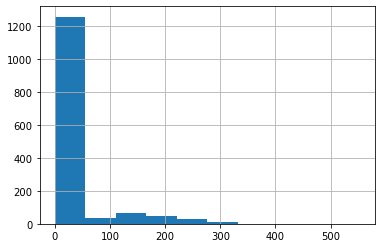

In [237]:
df_house.EnclosedPorch.hist()

In [239]:
df_house.EnclosedPorch.value_counts()

0      1233
112      15
96        6
144       5
120       5
       ... 
272       1
210       1
291       1
248       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

In [261]:
df_house_extracted10_ = pd.concat([df_house_extracted10,df_house[['EnclosedPorch']]],axis=1)

In [262]:
df_house_extracted10_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [263]:
df_house_extracted10_.drop(['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
       'SalePrice(log_stdz)', 'SalePrice(log_mm)'],axis=1,inplace=True)

In [264]:
df_house_extracted10_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)',
       'EnclosedPorch'],
      dtype='object')

In [267]:
df_house_extracted10_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)',
       'EnclosedPorch', 'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
      

In [265]:
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'EnclosedPorch']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted10_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted10_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted10_['SalePrice'])
df_house_extracted10_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------

In [268]:
X = df_house_extracted10_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 'EnclosedPorch(scaled)']]  
y = df_house_extracted10_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [271]:
ridge_params2 = {'alpha':[45,46,47,48,49,50,51,52,53,54]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 51}


In [272]:
lasso_params2 = {'alpha':[0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.004,0.005]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


In [273]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}


In [277]:
candidate_params = {'n_estimators' : [59,60,61,62,63,64]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 61}


In [278]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1239, and the best parameter is : {'n_estimators': 163}


In [279]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 156}


In [282]:
candidate_params = {'n_estimators' : [120,121,122,123,124,125,126,127,128,129]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1279, and the best parameter is : {'n_estimators': 124}


In [283]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 130}


In [284]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1336, and the best parameter is : {'n_estimators': 126}


In [285]:
# ordinary linear regression model
line_fitter10 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter10 = Ridge(alpha=51)
lasso_fitter10 = Lasso(alpha=0.0027)
elasticNet_fitter10 = ElasticNet(alpha = 0.02, l1_ratio=0.07)
# ensemble models
xgb_fitter10 = XGBRegressor(n_estimators=61)
gbm_fitter10 = GradientBoostingRegressor(n_estimators=163)
rf_fitter10 = RandomForestRegressor(n_estimators=156)
lgbm_fitter10 = LGBMRegressor(n_estimators=124)
bg_fitter10 = BaggingRegressor(n_estimators=130)
et_fitter10 = ExtraTreesRegressor(n_estimators=126)

In [286]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter10,ridge_fitter10,lasso_fitter10,elasticNet_fitter10,xgb_fitter10,gbm_fitter10,rf_fitter10,lgbm_fitter10,bg_fitter10,et_fitter10]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09806850535848817
##### Ridge #####
RMSLE : 0.10413378673069419
##### Lasso #####
RMSLE : 0.10492279492913789
##### ElasticNet #####
RMSLE : 0.10544602765128643
##### XGBRegressor #####
RMSLE : 0.18485235619161206
##### GradientBoostingRegressor #####
RMSLE : 0.08257000793040926
##### RandomForestRegressor #####
RMSLE : 0.13793464127174032
##### LGBMRegressor #####
RMSLE : 0.11799932122305426
##### BaggingRegressor #####
RMSLE : 0.14734508540288163
##### ExtraTreesRegressor #####
RMSLE : 0.16094127761421367


{'GradientBoostingRegressor(n_estimators=163)': 0.08257000793040926,
 'LinearRegression()': 0.09806850535848817,
 'Ridge(alpha=51)': 0.10413378673069419,
 'Lasso(alpha=0.0027)': 0.10492279492913789,
 'ElasticNet(alpha=0.02, l1_ratio=0.07)': 0.10544602765128643,
 'LGBMRegressor(n_estimators=124)': 0.11799932122305426,
 'RandomForestRegressor(n_estimators=156)': 0.13793464127174032,
 'BaggingRegressor(n_estimators=130)': 0.14734508540288163,
 'ExtraTreesRegressor(n_estimators=126)': 0.16094127761421367,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_

In [289]:
df_house_test_extracted10_ = pd.concat([df_house_test_extracted10,df_house_test10[['EnclosedPorch']]],axis=1)

In [290]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'EnclosedPorch'] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted10_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted10_[new_col] = scaled_data_tst
###====================================================================


In [291]:
df_house_test_extracted10_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'EnclosedPorch', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(sc

In [292]:
df_house_test_extracted10_2b_predicted = df_house_test_extracted10_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 'EnclosedPorch(scaled)']]
result_from_model10 = gbm_fitter10.predict(df_house_test_extracted10_2b_predicted)
df_house_test10['SalePrice'] = 0
df_house_test10['SalePrice'] = np.expm1(result_from_model10)
df_house_test10[['Id','SalePrice']]

,Id,SalePrice
0,1461,119861.047951
1,1462,156777.689439
2,1463,182476.655114
3,1464,180040.293052
4,1465,185768.369165
...,...,...
1454,2915,74826.354396
1455,2916,78169.073208
1456,2917,173499.206911
1457,2918,108002.274745


In [293]:
df_house_test10[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_4.csv',index=False)

In [287]:
df_house_test_extracted10.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [288]:
df_house_test10.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### adding 'BldgType'

In [223]:
df_house.BldgType.value_counts()

1Fam      1202
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [228]:
df_house.BldgType.iloc[5:10]

5      1Fam
6      1Fam
7      1Fam
8      1Fam
9    2fmCon
Name: BldgType, dtype: object

In [229]:
df_house['BldgType_'] = 0
for i in range(len(df_house)):
    if df_house.BldgType.iloc[i] == '1Fam':
        df_house.BldgType_.iloc[i] = 1202
    elif df_house.BldgType.iloc[i] == 'TwnhsE':
        df_house.BldgType_.iloc[i] = 113
    elif df_house.BldgType.iloc[i] == 'Duplex': 
        df_house.BldgType_.iloc[i] = 52
    elif df_house.BldgType.iloc[i] == 'Twnhs':  
        df_house.BldgType_.iloc[i] = 43
    elif df_house.BldgType.iloc[i] == '2fmCon':   
        df_house.BldgType_.iloc[i] = 30

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [230]:
df_house.BldgType_.value_counts()

1202    1202
113      113
52        52
43        43
30        30
Name: BldgType_, dtype: int64

In [295]:
df_house_extracted11.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [297]:
df_house_extracted11.drop(['MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
       'SalePrice(log_stdz)', 'SalePrice(log_mm)'],axis=1,inplace=True)

In [299]:
df_house_extracted11.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)'],
      dtype='object')

In [301]:
df_house_extracted11_ = pd.concat([df_house_extracted11,df_house[['BldgType_']]],axis=1)

In [302]:
df_house_extracted11_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)',
       'BldgType_'],
      dtype='object')

In [304]:
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'BldgType_'
        ]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted11_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted11_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted11_['SalePrice'])
df_house_extracted11_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###=======================================
X = df_house_extracted11_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 'BldgType_(scaled)']]  
y = df_house_extracted11_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [307]:
ridge_params2 = {'alpha':[50,51,52,53,54,55,56,57,58,59,60]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 53}


In [315]:
lasso_params2 = {'alpha':[0.0015,0.0016,0.0017,0.0018,0.0019,0.002,0.0021,0.0025,0.0026]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0016}


In [316]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}


In [318]:
candidate_params = {'n_estimators' : [40,41,42,43,44,45,46]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1354, and the best parameter is : {'n_estimators': 45}


In [319]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'n_estimators': 165}


In [320]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1368, and the best parameter is : {'n_estimators': 153}


In [321]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1286, and the best parameter is : {'n_estimators': 131}


In [322]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 126}


In [323]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1339, and the best parameter is : {'n_estimators': 132}


In [324]:
# ordinary linear regression model
line_fitter11 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter11 = Ridge(alpha=53)
lasso_fitter11 = Lasso(alpha=0.0016)
elasticNet_fitter11 = ElasticNet(alpha = 0.03, l1_ratio=0.04)
# ensemble models
xgb_fitter11 = XGBRegressor(n_estimators=45)
gbm_fitter11 = GradientBoostingRegressor(n_estimators=165)
rf_fitter11 = RandomForestRegressor(n_estimators=153)
lgbm_fitter11 = LGBMRegressor(n_estimators=131)
bg_fitter11 = BaggingRegressor(n_estimators=126)
et_fitter11 = ExtraTreesRegressor(n_estimators=132)

In [325]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter11,ridge_fitter11,lasso_fitter11,elasticNet_fitter11,xgb_fitter11,gbm_fitter11,rf_fitter11,lgbm_fitter11,bg_fitter11,et_fitter11]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09835578112214889
##### Ridge #####
RMSLE : 0.10519291919958651
##### Lasso #####
RMSLE : 0.10237698581234166
##### ElasticNet #####
RMSLE : 0.10666841076264712
##### XGBRegressor #####
RMSLE : 0.170958207709812
##### GradientBoostingRegressor #####
RMSLE : 0.08616983021536756
##### RandomForestRegressor #####
RMSLE : 0.12636406074822706
##### LGBMRegressor #####
RMSLE : 0.12308993276370243
##### BaggingRegressor #####
RMSLE : 0.1319324796294557
##### ExtraTreesRegressor #####
RMSLE : 0.13355225960554737


{'GradientBoostingRegressor(n_estimators=165)': 0.08616983021536756,
 'LinearRegression()': 0.09835578112214889,
 'Lasso(alpha=0.0016)': 0.10237698581234166,
 'Ridge(alpha=53)': 0.10519291919958651,
 'ElasticNet(alpha=0.03, l1_ratio=0.04)': 0.10666841076264712,
 'LGBMRegressor(n_estimators=131)': 0.12308993276370243,
 'RandomForestRegressor(n_estimators=153)': 0.12636406074822706,
 'BaggingRegressor(n_estimators=126)': 0.1319324796294557,
 'ExtraTreesRegressor(n_estimators=132)': 0.13355225960554737,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_w

In [332]:
df_house_test11.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [333]:
df_house_test_extracted11_ = pd.concat([df_house_test_extracted11,df_house_test11[['BldgType']]],axis=1)

In [335]:
df_house_test_extracted11_.BldgType.value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [336]:
df_house_test_extracted11_['BldgType_'] = 0
for i in range(len(df_house_test_extracted11_)):
    if df_house_test_extracted11_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted11_['BldgType_'].iloc[i] = 1205
    elif df_house_test_extracted11_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted11_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted11_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted11_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted11_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted11_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted11_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted11_['BldgType_'].iloc[i] = 31

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [337]:
df_house_test_extracted11_['BldgType_'].value_counts()

1205    1205
113      113
57        57
53        53
31        31
Name: BldgType_, dtype: int64

In [338]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'BldgType_'] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted11_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted11_[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted11_2b_predicted = df_house_test_extracted11_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 'BldgType_(scaled)']]
result_from_model11 = gbm_fitter11.predict(df_house_test_extracted11_2b_predicted)
df_house_test11['SalePrice'] = 0
df_house_test11['SalePrice'] = np.expm1(result_from_model11)
df_house_test11[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_5.csv',index=False)
df_house_test11[['Id','SalePrice']]

,Id,SalePrice
0,1461,122262.968094
1,1462,156830.033471
2,1463,182376.768863
3,1464,180120.151084
4,1465,185569.902258
...,...,...
1454,2915,74963.571704
1455,2916,78256.851385
1456,2917,171991.386224
1457,2918,108678.901396


##### adding 'SaleType'

In [246]:
df_house.SaleType.value_counts()

WD       1250
New       119
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [248]:
df_house['SaleType_'] = 0
for i in range(len(df_house)):
    if df_house.SaleType.iloc[i] == 'WD':
        df_house.SaleType_.iloc[i] = 1250
    elif df_house.SaleType.iloc[i] == 'New':
        df_house.SaleType_.iloc[i] = 119
    elif df_house.SaleType.iloc[i] == 'COD':
        df_house.SaleType_.iloc[i] = 43
    elif df_house.SaleType.iloc[i] == 'ConLD':
        df_house.SaleType_.iloc[i] = 9
    elif df_house.SaleType.iloc[i] == 'ConLI':
        df_house.SaleType_.iloc[i] = 5
    elif df_house.SaleType.iloc[i] == 'ConLw':
        df_house.SaleType_.iloc[i] = 5
    elif df_house.SaleType.iloc[i] == 'CWD':
        df_house.SaleType_.iloc[i] = 4
    elif df_house.SaleType.iloc[i] == 'Oth':    
        df_house.SaleType_.iloc[i] = 3
    elif df_house.SaleType.iloc[i] == 'Con':        
        df_house.SaleType_.iloc[i] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [249]:
df_house.SaleType_.value_counts()

1250    1250
119      119
43        43
5         10
9          9
4          4
3          3
2          2
Name: SaleType_, dtype: int64

In [339]:
df_house_extracted12.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)'],
      dtype='object')

In [340]:
df_house_extracted12_ = pd.concat([df_house_extracted12,df_house[['SaleType_']]],axis=1)

In [341]:
df_house_extracted12_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)',
       'SaleType_'],
      dtype='object')

In [342]:
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'SaleType_'
        ]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted12_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted12_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted12_['SalePrice'])
df_house_extracted12_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###=======================================
X = df_house_extracted12_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 'SaleType_(scaled)']]  
y = df_house_extracted12_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [345]:
ridge_params2 = {'alpha':[40,45,46,47,48,49,50,51,52,53,54]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 51}


In [348]:
lasso_params2 = {'alpha':[0.002,0.0021,0.0022,0.0023,0.0024,0.0025,0.0026]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.0023}


In [349]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}


In [350]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1354, and the best parameter is : {'n_estimators': 47}


In [351]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1232, and the best parameter is : {'n_estimators': 169}


In [355]:
candidate_params = {'n_estimators' : [95,96,97,98,99,100,101,102,103,104]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1379, and the best parameter is : {'n_estimators': 100}


In [356]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1287, and the best parameter is : {'n_estimators': 130}


In [357]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1378, and the best parameter is : {'n_estimators': 132}


In [358]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1342, and the best parameter is : {'n_estimators': 129}


In [359]:
# ordinary linear regression model
line_fitter12 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter12 = Ridge(alpha=51)
lasso_fitter12 = Lasso(alpha=0.0023)
elasticNet_fitter12 = ElasticNet(alpha = 0.02, l1_ratio=0.06)
# ensemble models
xgb_fitter12 = XGBRegressor(n_estimators=47)
gbm_fitter12 = GradientBoostingRegressor(n_estimators=169)
rf_fitter12 = RandomForestRegressor(n_estimators=100)
lgbm_fitter12 = LGBMRegressor(n_estimators=130)
bg_fitter12 = BaggingRegressor(n_estimators=132)
et_fitter12 = ExtraTreesRegressor(n_estimators=129)

In [360]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter12,ridge_fitter12,lasso_fitter12,elasticNet_fitter12,xgb_fitter12,gbm_fitter12,rf_fitter12,lgbm_fitter12,bg_fitter12,et_fitter12]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10796623153282583
##### Ridge #####
RMSLE : 0.11372407413487359
##### Lasso #####
RMSLE : 0.11197708819038028
##### ElasticNet #####
RMSLE : 0.11322092336476253
##### XGBRegressor #####
RMSLE : 0.173168614898568
##### GradientBoostingRegressor #####
RMSLE : 0.09375957154928
##### RandomForestRegressor #####
RMSLE : 0.13657358700129577
##### LGBMRegressor #####
RMSLE : 0.1168063052124314
##### BaggingRegressor #####
RMSLE : 0.13552631146934802
##### ExtraTreesRegressor #####
RMSLE : 0.14004724940393748


{'GradientBoostingRegressor(n_estimators=169)': 0.09375957154928,
 'LinearRegression()': 0.10796623153282583,
 'Lasso(alpha=0.0023)': 0.11197708819038028,
 'ElasticNet(alpha=0.02, l1_ratio=0.06)': 0.11322092336476253,
 'Ridge(alpha=51)': 0.11372407413487359,
 'LGBMRegressor(n_estimators=130)': 0.1168063052124314,
 'BaggingRegressor(n_estimators=132)': 0.13552631146934802,
 'RandomForestRegressor()': 0.13657358700129577,
 'ExtraTreesRegressor(n_estimators=129)': 0.14004724940393748,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n         

In [361]:
df_house_test12.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [362]:
df_house_test_extracted12_ = pd.concat([df_house_test_extracted12,df_house_test12[['SaleType']]],axis=1)

In [364]:
df_house_test_extracted12_.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [370]:
df_house_test_extracted12_[df_house_test_extracted12_['SaleType'].isna()]

,MSSubClass,MSZoning_,LotFrontage,LotArea,LotShape_,LotConfig_,Neighborhood_,HouseStyle_,OverallQual,OverallCond,...,House_Age,Garage_Age,GarageFinish_,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Exterior_Avg,SaleType,SaleType_
1029,20,1114,85.0,13770,934,248,77,745,5,6,...,9,49.0,625,1.0,303.0,0,0,120.5,NaN,0


In [369]:
len(df_house_test_extracted12_)

1459

In [368]:
df_house_test_extracted12_.SaleType.value_counts().sum()

1458

In [366]:
df_house_test_extracted12_['SaleType_'] = 0
for i in range(len(df_house_test_extracted12_)):
    if df_house_test_extracted12_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted12_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'New':
        df_house_test_extracted12_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted12_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted12_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted12_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted12_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted12_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted12_.SaleType.iloc[i] == 'Con' or df_house_test_extracted12_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted12_.SaleType_.iloc[i] = 3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [367]:
df_house_test_extracted12_.SaleType_.value_counts()

1258    1258
117      117
44        44
17        17
4          8
8          8
3          6
0          1
Name: SaleType_, dtype: int64

In [371]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'SaleType_'] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted12_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted12_[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted12_2b_predicted = df_house_test_extracted12_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 'SaleType_(scaled)']]
result_from_model12 = gbm_fitter12.predict(df_house_test_extracted12_2b_predicted)
df_house_test11['SalePrice'] = 0
df_house_test11['SalePrice'] = np.expm1(result_from_model12)
df_house_test11[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_6.csv',index=False)
df_house_test11[['Id','SalePrice']]

,Id,SalePrice
0,1461,118580.736565
1,1462,159740.784630
2,1463,184216.812021
3,1464,180791.084579
4,1465,185491.401249
...,...,...
1454,2915,74051.851612
1455,2916,77897.733261
1456,2917,173032.685337
1457,2918,107281.666702


##### adding 'SaleCondition'

In [250]:
df_house.SaleCondition.value_counts()

Normal     1184
Partial     122
Abnorml      98
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [252]:
df_house['SaleCondition_'] = 0
for i in range(len(df_house)):
    if df_house.SaleCondition.iloc[i] == 'Normal':
        df_house.SaleCondition_.iloc[i] = 1184
    elif df_house.SaleCondition.iloc[i] == 'Partial':
        df_house.SaleCondition_.iloc[i] = 122
    elif df_house.SaleCondition.iloc[i] == 'Abnorml':
        df_house.SaleCondition_.iloc[i] = 98
    elif df_house.SaleCondition.iloc[i] == 'Family':
        df_house.SaleCondition_.iloc[i] = 20
    elif df_house.SaleCondition.iloc[i] == 'Alloca':
        df_house.SaleCondition_.iloc[i] = 12
    elif df_house.SaleCondition.iloc[i] == 'AdjLand':
        df_house.SaleCondition_.iloc[i] = 4

In [253]:
df_house.SaleCondition_.value_counts()

1184    1184
122      122
98        98
20        20
12        12
4          4
Name: SaleCondition_, dtype: int64

In [373]:
df_house_extracted13.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'SalePrice(log)'],
      dtype='object')

In [374]:
df_house_extracted13_ = pd.concat([df_house_extracted13,df_house[['SaleCondition_']]],axis=1)

In [375]:
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'SaleCondition_'
        ]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted13_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted13_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted13_['SalePrice'])
df_house_extracted13_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###=======================================
X = df_house_extracted13_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    'SaleCondition_(scaled)'
    ]]  
y = df_house_extracted13_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [378]:
ridge_params2 = {'alpha':[55,56,57,58,59,60,61,62,63,64]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 56}


In [381]:
lasso_params2 = {'alpha':[0.0024,0.0025,0.0026,0.0027,0.0028]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


In [382]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}


In [387]:
candidate_params = {'n_estimators' : [50,51,52,53,53,54,55,56,57,58,59,60,61,62,63,64]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1345, and the best parameter is : {'n_estimators': 58}


In [388]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'n_estimators': 169}


In [391]:
candidate_params = {'n_estimators' : [148,149,150,151,152]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 151}


In [392]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1284, and the best parameter is : {'n_estimators': 133}


In [393]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 129}


In [394]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1336, and the best parameter is : {'n_estimators': 133}


In [395]:
# ordinary linear regression model
line_fitter13 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter13 = Ridge(alpha=56)
lasso_fitter13 = Lasso(alpha=0.0027)
elasticNet_fitter13 = ElasticNet(alpha = 0.02, l1_ratio=0.07)
# ensemble models
xgb_fitter13 = XGBRegressor(n_estimators=58)
gbm_fitter13 = GradientBoostingRegressor(n_estimators=169)
rf_fitter13 = RandomForestRegressor(n_estimators=151)
lgbm_fitter13 = LGBMRegressor(n_estimators=133)
bg_fitter13 = BaggingRegressor(n_estimators=129)
et_fitter13 = ExtraTreesRegressor(n_estimators=133)

In [396]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter13,ridge_fitter13,lasso_fitter13,elasticNet_fitter13,xgb_fitter13,gbm_fitter13,rf_fitter13,lgbm_fitter13,bg_fitter13,et_fitter13]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.10052563702325083
##### Ridge #####
RMSLE : 0.10701973747759536
##### Lasso #####
RMSLE : 0.10591941502921588
##### ElasticNet #####
RMSLE : 0.10692200202546862
##### XGBRegressor #####
RMSLE : 0.1496431328014078
##### GradientBoostingRegressor #####
RMSLE : 0.10502210666760944
##### RandomForestRegressor #####
RMSLE : 0.12637969654045397
##### LGBMRegressor #####
RMSLE : 0.11465523609952082
##### BaggingRegressor #####
RMSLE : 0.12924012123181122
##### ExtraTreesRegressor #####
RMSLE : 0.13127851227869294


{'LinearRegression()': 0.10052563702325083,
 'GradientBoostingRegressor(n_estimators=169)': 0.10502210666760944,
 'Lasso(alpha=0.0027)': 0.10591941502921588,
 'ElasticNet(alpha=0.02, l1_ratio=0.07)': 0.10692200202546862,
 'Ridge(alpha=56)': 0.10701973747759536,
 'LGBMRegressor(n_estimators=133)': 0.11465523609952082,
 'RandomForestRegressor(n_estimators=151)': 0.12637969654045397,
 'BaggingRegressor(n_estimators=129)': 0.12924012123181122,
 'ExtraTreesRegressor(n_estimators=133)': 0.13127851227869294,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_

In [399]:
ridge_params2 = {'alpha':[55,56,57,58,59,60,61,62,63,64]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 56}


In [401]:
lasso_params2 = {'alpha':[0.0025,0.0026,0.0027,0.0028,0.0029,0.003]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


In [402]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}


In [406]:
candidate_params = {'n_estimators' : [50,51,52,53,54,55,56,57,58,59,60]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1345, and the best parameter is : {'n_estimators': 58}


In [407]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'n_estimators': 165}


In [408]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 162}


In [409]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1284, and the best parameter is : {'n_estimators': 133}


In [412]:
candidate_params = {'n_estimators' : [135,136,137,138,139,140,141,142,143,144]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1367, and the best parameter is : {'n_estimators': 143}


In [413]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1339, and the best parameter is : {'n_estimators': 127}


In [416]:
df_house_test_extracted13_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleType'],
      dtype='object')

In [418]:
df_house_test_extracted13_ = pd.concat([df_house_test_extracted13,df_house_test13[['SaleCondition']]],axis=1)

In [419]:
df_house_test_extracted13_.SaleCondition.value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [420]:
df_house_test_extracted13_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted13_)):
    if df_house_test_extracted13_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 1204
    elif df_house_test_extracted13_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 120
    elif df_house_test_extracted13_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted13_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted13_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted13_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted13_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [421]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'SaleCondition_'] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted13_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted13_[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted13_2b_predicted = df_house_test_extracted13_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 'SaleCondition_(scaled)']]
result_from_model13 = gbm_fitter13.predict(df_house_test_extracted13_2b_predicted)
df_house_test13['SalePrice'] = 0
df_house_test13['SalePrice'] = np.expm1(result_from_model13)
df_house_test13[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_7.csv',index=False)
df_house_test13[['Id','SalePrice']]

,Id,SalePrice
0,1461,120338.844288
1,1462,156571.285478
2,1463,184710.146745
3,1464,180160.928064
4,1465,186732.839978
...,...,...
1454,2915,73383.554318
1455,2916,75443.036856
1456,2917,163437.307651
1457,2918,111540.772600


##### splitting 'Exterior_Avg' into 'Exterior1st' and 'Exterior2nd'

In [424]:
df_house.columns[:50]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

In [425]:
df_house[['Exterior1st', 'Exterior2nd','ExterCond']]

,Exterior1st,Exterior2nd,ExterCond
0,VinylSd,VinylSd,TA
1,MetalSd,MetalSd,TA
2,VinylSd,VinylSd,TA
3,Wd Sdng,Wd Shng,TA
4,VinylSd,VinylSd,TA
...,...,...,...
1435,VinylSd,VinylSd,TA
1436,VinylSd,VinylSd,TA
1437,Plywood,Plywood,TA
1438,CemntBd,CmentBd,Gd


In [426]:
df_house.ExterCond.value_counts()

TA    1265
Gd     144
Fa      28
Ex       2
Po       1
Name: ExterCond, dtype: int64

In [428]:
df_house_test_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [429]:
df_house['Exterior1st_'] = 0
#-----------------------------
for i in range(len(df_house)):
    if df_house.Exterior1st.iloc[i] == 'VinylSd':
         df_house.Exterior1st_.iloc[i] = 515
    elif df_house.Exterior1st.iloc[i] == 'HdBoard':
         df_house.Exterior1st_.iloc[i] = 222
    elif df_house.Exterior1st.iloc[i] == 'MetalSd':
         df_house.Exterior1st_.iloc[i] = 220
    elif df_house.Exterior1st.iloc[i] == 'Wd Sdng':
         df_house.Exterior1st_.iloc[i] = 206
    elif df_house.Exterior1st.iloc[i] == 'Plywood':
         df_house.Exterior1st_.iloc[i] = 108
    elif df_house.Exterior1st.iloc[i] == 'CemntBd':
         df_house.Exterior1st_.iloc[i] = 61
    elif df_house.Exterior1st.iloc[i] == 'BrkFace':
         df_house.Exterior1st_.iloc[i] = 50
    elif df_house.Exterior1st.iloc[i] == 'WdShing':
         df_house.Exterior1st_.iloc[i] = 26
    elif df_house.Exterior1st.iloc[i] == 'Stucco':
         df_house.Exterior1st_.iloc[i] = 25
    elif df_house.Exterior1st.iloc[i] == 'AsbShng':
         df_house.Exterior1st_.iloc[i] = 20
    elif df_house.Exterior1st.iloc[i] == 'BrkComm' or df_house.Exterior1st.iloc[i] == 'Stone':
         df_house.Exterior1st_.iloc[i] = 2
    elif df_house.Exterior1st.iloc[i] == 'AsphShn' or df_house.Exterior1st.iloc[i] == 'ImStucc' or df_house.Exterior1st.iloc[i] == 'CBlock':
         df_house.Exterior1st_.iloc[i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [430]:
df_house['Exterior2nd_'] = 0 
#-------------------------------
for i in range(len(df_house)):
    if df_house.Exterior2nd.iloc[i] == 'VinylSd':
        df_house.Exterior2nd_.iloc[i] = 504
    elif df_house.Exterior2nd.iloc[i] == 'MetalSd':
        df_house.Exterior2nd_.iloc[i] = 214
    elif df_house.Exterior2nd.iloc[i] == 'HdBoard':
        df_house.Exterior2nd_.iloc[i] = 207
    elif df_house.Exterior2nd.iloc[i] == 'Wd Sdng':
        df_house.Exterior2nd_.iloc[i] = 197
    elif df_house.Exterior2nd.iloc[i] == 'Plywood':
        df_house.Exterior2nd_.iloc[i] = 142
    elif df_house.Exterior2nd.iloc[i] == 'CmentBd':
        df_house.Exterior2nd_.iloc[i] = 60
    elif df_house.Exterior2nd.iloc[i] == 'Wd Shng':
        df_house.Exterior2nd_.iloc[i] = 38
    elif df_house.Exterior2nd.iloc[i] == 'Stucco':
        df_house.Exterior2nd_.iloc[i] = 26
    elif df_house.Exterior2nd.iloc[i] == 'BrkFace':
        df_house.Exterior2nd_.iloc[i] = 25
    elif df_house.Exterior2nd.iloc[i] == 'AsbShng':
        df_house.Exterior2nd_.iloc[i] = 20
    elif df_house.Exterior2nd.iloc[i] == 'ImStucc':
        df_house.Exterior2nd_.iloc[i] = 10
    elif df_house.Exterior2nd.iloc[i] == 'Brk Cmn':
        df_house.Exterior2nd_.iloc[i] = 7
    elif df_house.Exterior2nd.iloc[i] == 'Stone':
        df_house.Exterior2nd_.iloc[i] = 5
    elif df_house.Exterior2nd.iloc[i] == 'AsphShn':
        df_house.Exterior2nd_.iloc[i] = 3
    elif df_house.Exterior2nd.iloc[i] == 'Other' or df_house.Exterior2nd.iloc[i] == 'CBlock':
        df_house.Exterior2nd_.iloc[i] = 1

In [431]:
df_house[['Exterior1st','Exterior1st_','Exterior2nd','Exterior2nd_']]

,Exterior1st,Exterior1st_,Exterior2nd,Exterior2nd_
0,VinylSd,515,VinylSd,504
1,MetalSd,220,MetalSd,214
2,VinylSd,515,VinylSd,504
3,Wd Sdng,206,Wd Shng,38
4,VinylSd,515,VinylSd,504
...,...,...,...,...
1435,VinylSd,515,VinylSd,504
1436,VinylSd,515,VinylSd,504
1437,Plywood,108,Plywood,142
1438,CemntBd,61,CmentBd,60


In [432]:
df_house_test_extracted13.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [433]:
df_house_extracted14_ = pd.concat([df_house_extracted14,df_house[['Exterior1st_','Exterior2nd_']]],axis=1)

In [434]:
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 
       'Exterior1st_','Exterior2nd_'
        ]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted14_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted14_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted14_['SalePrice'])
df_house_extracted14_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###=======================================
X = df_house_extracted14_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior1st_(scaled)','Exterior2nd_(scaled)'
    ]]  
y = df_house_extracted14_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [436]:
ridge_params2 = {'alpha':[45,46,47,48,49,50,51,52,53,54]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 53}


In [440]:
lasso_params2 = {'alpha':[0.0014,0.0015,0.0016,0.0017,0.0018,0.0019,0.002,0.0021]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0016}


In [441]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}


In [442]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1352, and the best parameter is : {'n_estimators': 49}


In [443]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.123, and the best parameter is : {'n_estimators': 167}


In [444]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 155}


In [450]:
candidate_params = {'n_estimators' : [56,57,58,59,60,61,62,63]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1285, and the best parameter is : {'n_estimators': 60}


In [451]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 126}


In [452]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1334, and the best parameter is : {'n_estimators': 131}


In [462]:
# ordinary linear regression model
line_fitter14 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter14 = Ridge(alpha=53)
lasso_fitter14 = Lasso(alpha=0.0016)
elasticNet_fitter14 = ElasticNet(alpha = 0.02, l1_ratio=0.06)
# ensemble models
xgb_fitter14 = XGBRegressor(n_estimators=49)
gbm_fitter14 = GradientBoostingRegressor(n_estimators=167)
rf_fitter14 = RandomForestRegressor(n_estimators=155)
lgbm_fitter14 = LGBMRegressor(n_estimators=60)
bg_fitter14 = BaggingRegressor(n_estimators=126)
et_fitter14 = ExtraTreesRegressor(n_estimators=131)

In [463]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter14,ridge_fitter14,lasso_fitter14,elasticNet_fitter14,xgb_fitter14,gbm_fitter14,rf_fitter14,lgbm_fitter14,bg_fitter14,et_fitter14]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09842789425064029
##### Ridge #####
RMSLE : 0.10474851223812581
##### Lasso #####
RMSLE : 0.10200438277697232
##### ElasticNet #####
RMSLE : 0.10449544310554822
##### XGBRegressor #####
RMSLE : 0.1714772940210271
##### GradientBoostingRegressor #####
RMSLE : 0.10143348856675315
##### RandomForestRegressor #####
RMSLE : 0.11842088241498157
##### LGBMRegressor #####
RMSLE : 0.13846829545723566
##### BaggingRegressor #####
RMSLE : 0.12422154002468477
##### ExtraTreesRegressor #####
RMSLE : 0.148345990393123


{'LinearRegression()': 0.09842789425064029,
 'GradientBoostingRegressor(n_estimators=167)': 0.10143348856675315,
 'Lasso(alpha=0.0016)': 0.10200438277697232,
 'ElasticNet(alpha=0.02, l1_ratio=0.06)': 0.10449544310554822,
 'Ridge(alpha=53)': 0.10474851223812581,
 'RandomForestRegressor(n_estimators=155)': 0.11842088241498157,
 'BaggingRegressor(n_estimators=126)': 0.12422154002468477,
 'LGBMRegressor(n_estimators=60)': 0.13846829545723566,
 'ExtraTreesRegressor(n_estimators=131)': 0.148345990393123,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_wei

In [455]:
df_house_test14.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [456]:
df_house_test_extracted14_ = pd.concat([df_house_test_extracted14,df_house_test14[['Exterior1st', 'Exterior2nd']]],axis=1)

In [457]:
df_house_test_extracted14_.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [458]:
df_house_test_extracted14_.Exterior2nd.value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [459]:
df_house_test_extracted14_['Exterior1st_'] = 0
#-----------------------------
for i in range(len(df_house_test_extracted14_)):
    if df_house_test_extracted14_.Exterior1st.iloc[i] == 'VinylSd':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 510
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'HdBoard':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 220
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'MetalSd':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 230
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'Wd Sdng':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 205
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'Plywood':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 113
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'CemntBd':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 65
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'BrkFace':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 37
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'WdShing':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 30
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'Stucco':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 18
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'AsbShng':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 24
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'BrkComm':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 4
    elif df_house_test_extracted14_.Exterior1st.iloc[i] == 'AsphShn' or df_house_test_extracted14_.Exterior1st.iloc[i] == 'CBlock':
         df_house_test_extracted14_.Exterior1st_.iloc[i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [460]:
df_house_test_extracted14_['Exterior2nd_'] = 0 
#-------------------------------
for i in range(len(df_house_test_extracted14_)):
    if df_house_test_extracted14_.Exterior2nd.iloc[i] == 'VinylSd':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 510
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'MetalSd':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 233
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'HdBoard':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 199
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Wd Sdng':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 194
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Plywood':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 128
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'CmentBd':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 66
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Wd Shng':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 43
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Stucco':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 21
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'BrkFace':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 22
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'AsbShng':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 18
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'ImStucc':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 5
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Brk Cmn':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 15
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'Stone' or df_house_test_extracted14_.Exterior2nd.iloc[i] == 'AsphShn':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 1
    elif df_house_test_extracted14_.Exterior2nd.iloc[i] == 'CBlock':
        df_house_test_extracted14_.Exterior2nd_.iloc[i] = 2
    

In [464]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 
        'Exterior1st_', 'Exterior2nd_'
        ] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted14_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted14_[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted14_2b_predicted = df_house_test_extracted14_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 
    'Exterior1st_(scaled)', 'Exterior2nd_(scaled)']]
result_from_model14 = gbm_fitter14.predict(df_house_test_extracted14_2b_predicted)
df_house_test14['SalePrice'] = 0
df_house_test14['SalePrice'] = np.expm1(result_from_model14)
df_house_test14[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_8.csv',index=False)
df_house_test14[['Id','SalePrice']]

,Id,SalePrice
0,1461,121563.542937
1,1462,160737.244479
2,1463,184023.965214
3,1464,182433.187489
4,1465,185503.229895
...,...,...
1454,2915,73407.833176
1455,2916,78992.002878
1456,2917,172565.986243
1457,2918,108478.424626


In [465]:
result_from_model14_2 = line_fitter14.predict(df_house_test_extracted14_2b_predicted)
df_house_test14['SalePrice'] = 0
df_house_test14['SalePrice'] = np.expm1(result_from_model14_2)
df_house_test14[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_8_lr.csv',index=False)
df_house_test14[['Id','SalePrice']]

,Id,SalePrice
0,1461,114455.985809
1,1462,159637.693558
2,1463,176350.181884
3,1464,193663.786447
4,1465,183143.692720
...,...,...
1454,2915,90876.177839
1455,2916,91158.552348
1456,2917,183055.603719
1457,2918,102784.511848


In [ ]:
'''
LandContour // Lvl : 89 %
                                LandSlope // Gtl : 94.7 %
Condition1 // Norm 86.3 %
ExterCond // TA : 87.8 %
BsmtCond // TA : 89.8 %
BsmtFinType2 // Unf : 86.0 %
BsmtFinSF2 // 0 : 88.6 %
                                CentralAir // Y : 93.5 %
Electrical // SBrkr : 91.4 %
                                BsmtHalfBath // 0 : 94.4 %
                                KitchenAbvGr // 1 : 95.3 %
                                Functional // Typ : 93.1 %
GarageQual // TA : 89.8 %
GarageCond // TA : 90.8 %
PavedDrive // Y : 91.8 %
                                ScreenPorch // 0 : 92.1 %
                                
Fence // MnPrv + GdPrv + GdWo + MnWw : ~ 20 %
'''

In [467]:
df_house.columns[:50]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

In [468]:
df_house.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_', 'SaleType_',
       'SaleCondition_'],
      dtype='object')

In [ ]:
df_house4corr = df_house.drop(['Id',],axis=1)

In [469]:
df_house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_,SaleType_,SaleCondition_
Id,1.000000,0.011270,-0.024019,0.000763,-0.033228,0.014760,-0.015420,-0.022005,-0.054062,-0.012637,...,0.009882,-0.029404,0.007381,-0.019550,0.013079,0.002278,0.006227,0.002505,0.028177,0.018826
MSSubClass,0.011270,1.000000,-0.379111,-0.287624,0.034106,-0.060820,0.027572,0.041887,0.025829,-0.077364,...,-0.016064,-0.060633,0.107422,-0.024540,-0.011422,-0.043574,-0.173800,-0.060388,0.024472,0.020500
LotFrontage,-0.024019,-0.379111,1.000000,0.407580,0.204974,-0.047586,0.108685,0.074842,0.147960,0.119596,...,0.048023,-0.111968,0.029755,0.084202,0.149653,0.220744,0.168830,-0.070775,-0.070608,-0.047982
LotArea,0.000763,-0.287624,0.407580,1.000000,0.135880,-0.013673,0.027628,0.023780,0.104348,0.181068,...,0.047594,-0.174439,-0.034624,0.026871,0.105956,0.250705,0.124165,0.007222,-0.011247,-0.004620
OverallQual,-0.033228,0.034106,0.204974,0.135880,1.000000,-0.095578,0.579652,0.551779,0.400554,0.212701,...,0.273203,-0.150163,0.439463,0.458515,0.668913,0.487114,0.326568,-0.160583,-0.213189,-0.133711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FireplaceQu_,0.002278,-0.043574,0.220744,0.250705,0.487114,-0.056394,0.224428,0.194007,0.277044,0.170697,...,0.115017,-0.100622,0.136603,0.205646,0.349769,1.000000,0.213900,-0.086484,-0.095833,-0.028113
GarageType_,0.006227,-0.173800,0.168830,0.124165,0.326568,-0.058560,0.394222,0.212002,0.152901,0.264296,...,0.157250,-0.075295,0.057669,0.161442,0.244303,0.213900,1.000000,0.156068,-0.041514,0.029816
GarageFinish_,0.002505,-0.060388,-0.070775,0.007222,-0.160583,0.149157,-0.238317,-0.239159,-0.088376,-0.067961,...,-0.017090,0.103409,-0.180024,-0.178929,-0.144525,-0.086484,0.156068,1.000000,0.108574,0.107606
SaleType_,0.028177,0.024472,-0.070608,-0.011247,-0.213189,0.161737,-0.224675,-0.167811,-0.126331,-0.003139,...,-0.046036,0.075629,-0.151020,-0.116829,-0.213247,-0.095833,-0.041514,0.108574,1.000000,0.609429


In [470]:
df_house_corr = df_house.corr()

In [475]:
for i in range(len(df_house_corr)):
    for j in range(len(df_house_corr.columns)):
        if df_house_corr.iloc[i,j]>0.6 and i!=j:
            print(df_house_corr.iloc[i,j].round(5), i,df_house_corr.index[i],j, df_house_corr.columns[j])

0.80097 4 OverallQual 37 SalePrice
0.72295 4 OverallQual 51 ExterQual_
0.62634 4 OverallQual 53 BsmtQual_
0.66891 4 OverallQual 58 KitchenQual_
0.82734 6 YearBuilt 25 GarageYrBlt
0.60743 6 YearBuilt 51 ExterQual_
0.60333 6 YearBuilt 53 BsmtQual_
0.6407 7 YearRemodAdd 25 GarageYrBlt
0.62308 7 YearRemodAdd 58 KitchenQual_
0.65026 8 MasVnrArea 50 MasVnrType_
0.65777 9 BsmtFinSF1 17 BsmtFullBath
0.79771 12 TotalBsmtSF 13 1stFlrSF
0.64413 12 TotalBsmtSF 37 SalePrice
0.79771 13 1stFlrSF 12 TotalBsmtSF
0.62305 13 1stFlrSF 37 SalePrice
0.68153 14 2ndFlrSF 16 GrLivArea
0.61154 14 2ndFlrSF 20 HalfBath
0.60396 14 2ndFlrSF 23 TotRmsAbvGrd
0.68153 16 GrLivArea 14 2ndFlrSF
0.63386 16 GrLivArea 19 FullBath
0.8346 16 GrLivArea 23 TotRmsAbvGrd
0.71536 16 GrLivArea 37 SalePrice
0.65777 17 BsmtFullBath 9 BsmtFinSF1
0.63386 19 FullBath 16 GrLivArea
0.61154 20 HalfBath 14 2ndFlrSF
0.67799 21 BedroomAbvGr 23 TotRmsAbvGrd
0.60396 23 TotRmsAbvGrd 14 2ndFlrSF
0.8346 23 TotRmsAbvGrd 16 GrLivArea
0.67799 23 TotR

In [715]:
for i in range(len(df_house_corr)):
    for j in range(len(df_house_corr.columns)):
        if df_house_corr.iloc[i,j]<0.3 and i!=j:
            print(df_house_corr.iloc[i,j].round(5), i,df_house_corr.index[i],j, df_house_corr.columns[j])

0.01127 0 Id 1 MSSubClass
-0.02402 0 Id 2 LotFrontage
0.00076 0 Id 3 LotArea
-0.03323 0 Id 4 OverallQual
0.01476 0 Id 5 OverallCond
-0.01542 0 Id 6 YearBuilt
-0.02201 0 Id 7 YearRemodAdd
-0.05406 0 Id 8 MasVnrArea
-0.01264 0 Id 9 BsmtFinSF1
-0.00494 0 Id 10 BsmtFinSF2
-0.01197 0 Id 11 BsmtUnfSF
-0.02796 0 Id 12 TotalBsmtSF
0.00248 0 Id 13 1stFlrSF
-0.00501 0 Id 14 2ndFlrSF
-0.04427 0 Id 15 LowQualFinSF
-0.00693 0 Id 16 GrLivArea
0.0042 0 Id 17 BsmtFullBath
-0.01637 0 Id 18 BsmtHalfBath
0.00011 0 Id 19 FullBath
0.00089 0 Id 20 HalfBath
0.02741 0 Id 21 BedroomAbvGr
0.00347 0 Id 22 KitchenAbvGr
0.01746 0 Id 23 TotRmsAbvGrd
-0.0226 0 Id 24 Fireplaces
-0.00051 0 Id 25 GarageYrBlt
0.01544 0 Id 26 GarageCars
0.01369 0 Id 27 GarageArea
-0.04307 0 Id 28 WoodDeckSF
-0.00992 0 Id 29 OpenPorchSF
0.00448 0 Id 30 EnclosedPorch
-0.0467 0 Id 31 3SsnPorch
-0.00532 0 Id 32 ScreenPorch
0.04118 0 Id 33 PoolArea
-0.00731 0 Id 34 MiscVal
0.02704 0 Id 35 MoSold
-0.00159 0 Id 36 YrSold
-0.02868 0 Id 37 SalePr

0.03169 6 YearBuilt 31 3SsnPorch
-0.04206 6 YearBuilt 32 ScreenPorch
-0.01457 6 YearBuilt 33 PoolArea
-0.03182 6 YearBuilt 34 MiscVal
0.01604 6 YearBuilt 35 MoSold
-0.01167 6 YearBuilt 36 YrSold
0.24263 6 YearBuilt 38 MSZoning_
-0.23077 6 YearBuilt 39 LotShape_
-0.03493 6 YearBuilt 40 LotConfig_
-0.0903 6 YearBuilt 41 Neighborhood_
-0.11304 6 YearBuilt 42 BldgType_
0.269 6 YearBuilt 43 HouseStyle_
-0.59419 6 YearBuilt 44 House_Age
-0.69109 6 YearBuilt 45 Garage_Age
-0.01285 6 YearBuilt 46 RoofStyle_
0.18439 6 YearBuilt 54 BsmtCond_
-0.21076 6 YearBuilt 55 BsmtExposure_
0.22443 6 YearBuilt 59 FireplaceQu_
-0.23832 6 YearBuilt 61 GarageFinish_
-0.22468 6 YearBuilt 62 SaleType_
-0.15059 6 YearBuilt 63 SaleCondition_
-0.02201 7 YearRemodAdd 0 Id
0.04189 7 YearRemodAdd 1 MSSubClass
0.07484 7 YearRemodAdd 2 LotFrontage
0.02378 7 YearRemodAdd 3 LotArea
0.07458 7 YearRemodAdd 5 OverallCond
0.17095 7 YearRemodAdd 8 MasVnrArea
0.12645 7 YearRemodAdd 9 BsmtFinSF1
-0.06164 7 YearRemodAdd 10 BsmtFi

0.25801 12 TotalBsmtSF 23 TotRmsAbvGrd
0.22713 12 TotalBsmtSF 28 WoodDeckSF
0.22286 12 TotalBsmtSF 29 OpenPorchSF
-0.09233 12 TotalBsmtSF 30 EnclosedPorch
0.04327 12 TotalBsmtSF 31 3SsnPorch
0.08837 12 TotalBsmtSF 32 ScreenPorch
0.00502 12 TotalBsmtSF 33 PoolArea
-0.02118 12 TotalBsmtSF 34 MiscVal
0.02845 12 TotalBsmtSF 35 MoSold
-0.00841 12 TotalBsmtSF 36 YrSold
0.26 12 TotalBsmtSF 38 MSZoning_
-0.16208 12 TotalBsmtSF 39 LotShape_
-0.02838 12 TotalBsmtSF 40 LotConfig_
-0.03026 12 TotalBsmtSF 41 Neighborhood_
0.08657 12 TotalBsmtSF 42 BldgType_
-0.30006 12 TotalBsmtSF 44 House_Age
-0.26662 12 TotalBsmtSF 45 Garage_Age
-0.23166 12 TotalBsmtSF 46 RoofStyle_
0.16885 12 TotalBsmtSF 47 Exterior1st_
0.17631 12 TotalBsmtSF 48 Exterior2nd_
0.17484 12 TotalBsmtSF 49 Exterior_Avg
0.24836 12 TotalBsmtSF 50 MasVnrType_
-0.10467 12 TotalBsmtSF 55 BsmtExposure_
0.24286 12 TotalBsmtSF 56 BsmtFinType1_
0.27348 12 TotalBsmtSF 57 HeatingQC_
-0.12617 12 TotalBsmtSF 61 GarageFinish_
-0.19824 12 TotalBsmtS

0.29079 19 FullBath 59 FireplaceQu_
0.16595 19 FullBath 60 GarageType_
-0.21532 19 FullBath 61 GarageFinish_
-0.15407 19 FullBath 62 SaleType_
-0.10611 19 FullBath 63 SaleCondition_
0.00089 20 HalfBath 0 Id
0.17958 20 HalfBath 1 MSSubClass
0.03165 20 HalfBath 2 LotFrontage
0.06057 20 HalfBath 3 LotArea
0.26275 20 HalfBath 4 OverallQual
-0.05786 20 HalfBath 5 OverallCond
0.23963 20 HalfBath 6 YearBuilt
0.1796 20 HalfBath 7 YearRemodAdd
0.19364 20 HalfBath 8 MasVnrArea
-0.01442 20 HalfBath 9 BsmtFinSF1
-0.03486 20 HalfBath 10 BsmtFinSF2
-0.04466 20 HalfBath 11 BsmtUnfSF
-0.07654 20 HalfBath 12 TotalBsmtSF
-0.14939 20 HalfBath 13 1stFlrSF
-0.02625 20 HalfBath 15 LowQualFinSF
-0.03602 20 HalfBath 17 BsmtFullBath
-0.01185 20 HalfBath 18 BsmtHalfBath
0.13043 20 HalfBath 19 FullBath
0.22674 20 HalfBath 21 BedroomAbvGr
-0.067 20 HalfBath 22 KitchenAbvGr
0.20298 20 HalfBath 24 Fireplaces
0.19126 20 HalfBath 25 GarageYrBlt
0.21297 20 HalfBath 26 GarageCars
0.15287 20 HalfBath 27 GarageArea
0.089

0.2493 27 GarageArea 29 OpenPorchSF
-0.1171 27 GarageArea 30 EnclosedPorch
0.03701 27 GarageArea 31 3SsnPorch
0.05518 27 GarageArea 32 ScreenPorch
0.01199 27 GarageArea 33 PoolArea
-0.02731 27 GarageArea 34 MiscVal
0.03493 27 GarageArea 35 MoSold
-0.02215 27 GarageArea 36 YrSold
0.15587 27 GarageArea 38 MSZoning_
-0.15976 27 GarageArea 39 LotShape_
-0.06398 27 GarageArea 40 LotConfig_
-0.04345 27 GarageArea 41 Neighborhood_
0.09775 27 GarageArea 42 BldgType_
0.13264 27 GarageArea 43 HouseStyle_
-0.36977 27 GarageArea 44 House_Age
-0.31546 27 GarageArea 45 Garage_Age
-0.11874 27 GarageArea 46 RoofStyle_
0.26085 27 GarageArea 47 Exterior1st_
0.27135 27 GarageArea 48 Exterior2nd_
0.26958 27 GarageArea 49 Exterior_Avg
0.25142 27 GarageArea 50 MasVnrType_
0.21527 27 GarageArea 52 Foundation_
0.14244 27 GarageArea 54 BsmtCond_
-0.19013 27 GarageArea 55 BsmtExposure_
0.23742 27 GarageArea 56 BsmtFinType1_
0.29296 27 GarageArea 57 HeatingQC_
0.16915 27 GarageArea 61 GarageFinish_
-0.20593 27 G

0.02998 33 PoolArea 60 GarageType_
0.01008 33 PoolArea 61 GarageFinish_
0.02276 33 PoolArea 62 SaleType_
-0.03961 33 PoolArea 63 SaleCondition_
-0.00731 34 MiscVal 0 Id
-0.01042 34 MiscVal 1 MSSubClass
0.00368 34 MiscVal 2 LotFrontage
0.03319 34 MiscVal 3 LotArea
-0.03 34 MiscVal 4 OverallQual
0.06629 34 MiscVal 5 OverallCond
-0.03182 34 MiscVal 6 YearBuilt
-0.00753 34 MiscVal 7 YearRemodAdd
-0.02976 34 MiscVal 8 MasVnrArea
0.00389 34 MiscVal 9 BsmtFinSF1
0.00582 34 MiscVal 10 BsmtFinSF2
-0.02554 34 MiscVal 11 BsmtUnfSF
-0.02118 34 MiscVal 12 TotalBsmtSF
-0.02374 34 MiscVal 13 1stFlrSF
0.01413 34 MiscVal 14 2ndFlrSF
-0.00349 34 MiscVal 15 LowQualFinSF
-0.00585 34 MiscVal 16 GrLivArea
-0.02341 34 MiscVal 17 BsmtFullBath
-0.00927 34 MiscVal 18 BsmtHalfBath
-0.01672 34 MiscVal 19 FullBath
0.00386 34 MiscVal 20 HalfBath
0.003 34 MiscVal 21 BedroomAbvGr
0.06309 34 MiscVal 22 KitchenAbvGr
0.02409 34 MiscVal 23 TotRmsAbvGrd
-0.00467 34 MiscVal 24 Fireplaces
-0.02776 34 MiscVal 25 GarageYrBlt


0.0522 41 Neighborhood_ 34 MiscVal
0.01292 41 Neighborhood_ 35 MoSold
0.01051 41 Neighborhood_ 36 YrSold
-0.18916 41 Neighborhood_ 37 SalePrice
0.17647 41 Neighborhood_ 38 MSZoning_
0.06586 41 Neighborhood_ 39 LotShape_
-0.01474 41 Neighborhood_ 40 LotConfig_
0.17622 41 Neighborhood_ 42 BldgType_
0.12876 41 Neighborhood_ 43 HouseStyle_
0.15917 41 Neighborhood_ 44 House_Age
0.1504 41 Neighborhood_ 45 Garage_Age
-0.02538 41 Neighborhood_ 46 RoofStyle_
-0.00864 41 Neighborhood_ 47 Exterior1st_
0.01059 41 Neighborhood_ 48 Exterior2nd_
0.00089 41 Neighborhood_ 49 Exterior_Avg
0.03581 41 Neighborhood_ 50 MasVnrType_
-0.15466 41 Neighborhood_ 51 ExterQual_
0.07558 41 Neighborhood_ 52 Foundation_
-0.21456 41 Neighborhood_ 53 BsmtQual_
-0.04516 41 Neighborhood_ 54 BsmtCond_
0.03267 41 Neighborhood_ 55 BsmtExposure_
-0.20437 41 Neighborhood_ 56 BsmtFinType1_
-0.09389 41 Neighborhood_ 57 HeatingQC_
-0.12111 41 Neighborhood_ 58 KitchenQual_
-0.1754 41 Neighborhood_ 59 FireplaceQu_
0.06741 41 Neigh

-0.12099 49 Exterior_Avg 10 BsmtFinSF2
0.2202 49 Exterior_Avg 11 BsmtUnfSF
0.17484 49 Exterior_Avg 12 TotalBsmtSF
0.04604 49 Exterior_Avg 13 1stFlrSF
0.11086 49 Exterior_Avg 14 2ndFlrSF
-0.04665 49 Exterior_Avg 15 LowQualFinSF
0.12662 49 Exterior_Avg 16 GrLivArea
0.01467 49 Exterior_Avg 17 BsmtFullBath
-0.04514 49 Exterior_Avg 18 BsmtHalfBath
0.27455 49 Exterior_Avg 19 FullBath
0.11038 49 Exterior_Avg 20 HalfBath
-0.00204 49 Exterior_Avg 21 BedroomAbvGr
-0.10125 49 Exterior_Avg 22 KitchenAbvGr
0.10733 49 Exterior_Avg 23 TotRmsAbvGrd
-0.02983 49 Exterior_Avg 24 Fireplaces
0.29803 49 Exterior_Avg 26 GarageCars
0.26958 49 Exterior_Avg 27 GarageArea
0.08368 49 Exterior_Avg 28 WoodDeckSF
0.18893 49 Exterior_Avg 29 OpenPorchSF
-0.18736 49 Exterior_Avg 30 EnclosedPorch
-0.00572 49 Exterior_Avg 31 3SsnPorch
-0.10605 49 Exterior_Avg 32 ScreenPorch
-0.05447 49 Exterior_Avg 33 PoolArea
-0.03071 49 Exterior_Avg 34 MiscVal
-0.00013 49 Exterior_Avg 35 MoSold
-0.02582 49 Exterior_Avg 36 YrSold
0.2901

0.05602 58 KitchenQual_ 35 MoSold
0.00603 58 KitchenQual_ 36 YrSold
0.11156 58 KitchenQual_ 38 MSZoning_
-0.15484 58 KitchenQual_ 39 LotShape_
-0.019 58 KitchenQual_ 40 LotConfig_
-0.12111 58 KitchenQual_ 41 Neighborhood_
0.03392 58 KitchenQual_ 42 BldgType_
0.11274 58 KitchenQual_ 43 HouseStyle_
-0.62296 58 KitchenQual_ 44 House_Age
-0.42267 58 KitchenQual_ 45 Garage_Age
-0.07817 58 KitchenQual_ 46 RoofStyle_
0.1826 58 KitchenQual_ 50 MasVnrType_
0.22974 58 KitchenQual_ 52 Foundation_
0.18373 58 KitchenQual_ 54 BsmtCond_
-0.1645 58 KitchenQual_ 55 BsmtExposure_
0.2443 58 KitchenQual_ 60 GarageType_
-0.14452 58 KitchenQual_ 61 GarageFinish_
-0.21325 58 KitchenQual_ 62 SaleType_
-0.16584 58 KitchenQual_ 63 SaleCondition_
0.00228 59 FireplaceQu_ 0 Id
-0.04357 59 FireplaceQu_ 1 MSSubClass
0.22074 59 FireplaceQu_ 2 LotFrontage
0.25071 59 FireplaceQu_ 3 LotArea
-0.05639 59 FireplaceQu_ 5 OverallCond
0.22443 59 FireplaceQu_ 6 YearBuilt
0.19401 59 FireplaceQu_ 7 YearRemodAdd
0.27704 59 Firepl

#### comb1 :  EnclosedPorch + BldgType

In [484]:
df_house[['EnclosedPorch','BldgType_']]

,EnclosedPorch,BldgType_
0,0,1202
1,0,1202
2,0,1202
3,272,1202
4,0,1202
...,...,...
1435,0,1202
1436,0,1202
1437,0,1202
1438,0,1202


In [486]:
df_house_extracted15_ = pd.concat([df_house_extracted15,df_house[['EnclosedPorch','BldgType_']]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'EnclosedPorch','BldgType_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted15_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted15_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted15_['SalePrice'])
df_house_extracted15_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted15_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    'EnclosedPorch(scaled)','BldgType_(scaled)'
]]  
y = df_house_extracted15_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================


In [488]:
ridge_params2 = {'alpha':range(0,100)}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 53}


In [501]:
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
print_best_params(lasso_fitter5,lasso_params2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0026000000000000003}


In [505]:
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
print_best_params(elasticNet_fitter5,eln_params2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.497258204111168, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.78012867035565, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.695245200297231, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.184483004371756, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.62878142492524, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.502523536294689, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.029677947796907, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}


In [507]:
candidate_params = {'n_estimators' : range(30,80)}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1339, and the best parameter is : {'n_estimators': 71}


In [511]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.124, and the best parameter is : {'n_estimators': 167}


In [515]:
candidate_params = {'n_estimators' : [130,135,136,137,138,139,140,41,142,143,144,150,151,152]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1376, and the best parameter is : {'n_estimators': 142}


In [516]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1285, and the best parameter is : {'n_estimators': 131}


In [517]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.138, and the best parameter is : {'n_estimators': 130}


In [518]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1336, and the best parameter is : {'n_estimators': 131}


In [520]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
var5 = print_best_params2(gbm_fitter5,candidate_params)
candidate_params = {'n_estimators' : [130,135,136,137,138,139,140,41,142,143,144,150,151,152]}
var6 = print_best_params2(rf_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var8= print_best_params2(bg_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 53}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0026000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.497258204111168, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.497258204111168, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.497258204111168, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.219286945500073, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.112059184966306, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.62202908001792, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1339, and the best parameter is : {'n_estimators': 71}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1239, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 143}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1285, and the best parameter is : {'n_estimators': 131}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [546]:
var3 = print_best_params2(elasticNet_fitter5,eln_params2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.622966724845131, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.520204227901663, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.520204227901663, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.07674246295936, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.976560626161936, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.48012641068281, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.889306182396954, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.751762024143364, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.28900521921767, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}


In [523]:
type(var1)

dict

In [540]:
list(var1.items())[0][1]

53

In [541]:
type(list(var1.items())[0][1])

int

In [542]:
var2

{'alpha': 0.0026000000000000003}

In [543]:
list(var2.items())[0][1]

0.0026000000000000003

In [521]:
var1, var2, var3, var3_, var4

({'alpha': 53},
 {'alpha': 0.0026000000000000003},
 'alpha',
 'l1_ratio',
 {'n_estimators': 71})

In [547]:
var3

{'alpha': 0.03, 'l1_ratio': 0.04}

In [548]:
list(var3.items())[0][1]

0.03

In [551]:
list(var3.items())[1][1]

0.04

In [552]:
var5, var6, var7, var8, var9

({'n_estimators': 167},
 {'n_estimators': 143},
 {'n_estimators': 131},
 {'n_estimators': 127},
 {'n_estimators': 132})

In [553]:
list(var5.items())[0][1]

167

In [554]:
list(var9.items())[0][1]

132

In [557]:
df_house_test_extracted15.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [562]:
df_house_test_extracted15_.BldgType.value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [561]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter15 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter15 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter15 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter15 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter15 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter15 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter15 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter15 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter15 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter15 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter15,ridge_fitter15,lasso_fitter15,elasticNet_fitter15,xgb_fitter15,gbm_fitter15,rf_fitter15,lgbm_fitter15,bg_fitter15,et_fitter15]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted15_ = pd.concat([df_house_test_extracted15,df_house_test15[['EnclosedPorch','BldgType']]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09781340644932064
##### Ridge #####
RMSLE : 0.10472722970638648
##### Lasso #####
RMSLE : 0.10476215416698705
##### ElasticNet #####
RMSLE : 0.10666842132248762
##### XGBRegressor #####
RMSLE : 0.17521966011832218
##### GradientBoostingRegressor #####
RMSLE : 0.08493623714517813
##### RandomForestRegressor #####
RMSLE : 0.11562652899455901
##### LGBMRegressor #####
RMSLE : 0.11844530889832684
##### BaggingRegressor #####
RMSLE : 0.14006550826378975
##### ExtraTreesRegressor #####
RMSLE : 0.16330458375054474


In [567]:
### T E S T ###
# linear models
ridge_fitter15_2 = Ridge(alpha=53)
lasso_fitter15_2 = Lasso(alpha=0.0026)
elasticNet_fitter15_2 = ElasticNet(alpha = 0.03, l1_ratio=0.04)
# ensemble models
xgb_fitter15_2 = XGBRegressor(n_estimators=71)
gbm_fitter15_2 = GradientBoostingRegressor(n_estimators=167)
rf_fitter15_2 = RandomForestRegressor(n_estimators=142)
lgbm_fitter15_2 = LGBMRegressor(n_estimators=131)
bg_fitter15_2 = BaggingRegressor(n_estimators=130)
et_fitter15_2 = ExtraTreesRegressor(n_estimators=131)
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter15,ridge_fitter15_2,lasso_fitter15_2,elasticNet_fitter15_2,xgb_fitter15_2,gbm_fitter15_2,rf_fitter15_2,lgbm_fitter15_2,bg_fitter15_2,et_fitter15_2]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.09781340644932064
##### Ridge #####
RMSLE : 0.10472722970638648
##### Lasso #####
RMSLE : 0.10476215416698705
##### ElasticNet #####
RMSLE : 0.10666842132248762
##### XGBRegressor #####
RMSLE : 0.17521966011832218
##### GradientBoostingRegressor #####
RMSLE : 0.0849396359774302
##### RandomForestRegressor #####
RMSLE : 0.13077090416409856
##### LGBMRegressor #####
RMSLE : 0.11844530889832684
##### BaggingRegressor #####
RMSLE : 0.12833630517725653
##### ExtraTreesRegressor #####
RMSLE : 0.1304743986850067


{'GradientBoostingRegressor(n_estimators=167)': 0.0849396359774302,
 'LinearRegression()': 0.09781340644932064,
 'Ridge(alpha=53)': 0.10472722970638648,
 'Lasso(alpha=0.0026)': 0.10476215416698705,
 'ElasticNet(alpha=0.03, l1_ratio=0.04)': 0.10666842132248762,
 'LGBMRegressor(n_estimators=131)': 0.11844530889832684,
 'BaggingRegressor(n_estimators=130)': 0.12833630517725653,
 'ExtraTreesRegressor(n_estimators=131)': 0.1304743986850067,
 'RandomForestRegressor(n_estimators=142)': 0.13077090416409856,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_we

In [563]:
df_house_test_extracted15_['BldgType_'] = 0
for i in range(len(df_house_test_extracted15_)):
    if df_house_test_extracted15_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted15_['BldgType_'].iloc[i] = 1205
    elif df_house_test_extracted15_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted15_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted15_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted15_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted15_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted15_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted15_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted15_['BldgType_'].iloc[i] = 31

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [564]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
        'EnclosedPorch','BldgType_'] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted15_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted15_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted15_2b_predicted = df_house_test_extracted15_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 'EnclosedPorch(scaled)','BldgType_(scaled)']]
result_from_model15 = gbm_fitter15.predict(df_house_test_extracted15_2b_predicted)
df_house_test15['SalePrice'] = 0
df_house_test15['SalePrice'] = np.expm1(result_from_model15)
df_house_test15[['Id','SalePrice']]

,Id,SalePrice
0,1461,120356.957805
1,1462,158328.744201
2,1463,183864.175656
3,1464,180288.579484
4,1465,185640.592917
...,...,...
1454,2915,74160.825312
1455,2916,78014.042849
1456,2917,172227.787262
1457,2918,107933.314065


In [565]:
df_house_test15[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_9.csv',index=False)

#### comb2 : EnclosedPorch + SaleType

In [572]:
df_house.SaleType_.value_counts()

1250    1250
119      119
43        43
5         10
9          9
4          4
3          3
2          2
Name: SaleType_, dtype: int64

In [ ]:
# df_house['SaleType_'] = 0
# for i in range(len(df_house)):
#     if df_house.SaleType.iloc[i] == 'WD':
#         df_house.SaleType_.iloc[i] = 1250
#     elif df_house.SaleType.iloc[i] == 'New':
#         df_house.SaleType_.iloc[i] = 119
#     elif df_house.SaleType.iloc[i] == 'COD':
#         df_house.SaleType_.iloc[i] = 43
#     elif df_house.SaleType.iloc[i] == 'ConLD':
#         df_house.SaleType_.iloc[i] = 9
#     elif df_house.SaleType.iloc[i] == 'ConLI':
#         df_house.SaleType_.iloc[i] = 5
#     elif df_house.SaleType.iloc[i] == 'ConLw':
#         df_house.SaleType_.iloc[i] = 5
#     elif df_house.SaleType.iloc[i] == 'CWD':
#         df_house.SaleType_.iloc[i] = 4
#     elif df_house.SaleType.iloc[i] == 'Oth':    
#         df_house.SaleType_.iloc[i] = 3
#     elif df_house.SaleType.iloc[i] == 'Con':        
#         df_house.SaleType_.iloc[i] = 2

In [575]:
str1 = 'EnclosedPorch'
str2 = 'SaleType'
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted16_ = pd.concat([df_house_extracted16,df_house[[str1,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted16_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted16_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted16_['SalePrice'])
df_house_extracted16_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted16_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled,str2_scaled
]]  
y = df_house_extracted16_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================


In [576]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
var5 = print_best_params2(gbm_fitter5,candidate_params)
candidate_params = {'n_estimators' : [130,135,136,137,138,139,140,41,142,143,144,150,151,152]}
var6 = print_best_params2(rf_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var8= print_best_params2(bg_fitter5,candidate_params)
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 51}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0025}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.982174690800569, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.436139847496861, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.486806388521817, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.438411539722974, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.222519175054748, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.863844378285453, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1347, and the best parameter is : {'n_estimators': 67}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1241, and the best parameter is : {'n_estimators': 163}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 135}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1291, and the best parameter is : {'n_estimators': 126}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 133}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best

In [577]:
var1

{'alpha': 51}

In [578]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(120,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 51}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0025}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561931157547885, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.436139847496861, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.436139847496861, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.641559754499658, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.591251295119559, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.870453498071097, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.705236588419769, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.481409530682265, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.130602344091285, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1347, and the best parameter is : {'n_estimators': 67}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1242, and the best parameter is : {'n_estimators': 160}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 135}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1291, and the best parameter is : {'n_estimators': 126}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 136}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best

In [581]:
candidate_params = {'n_estimators' : [140,141,142,143,144,145,146,147,148,149,150]}
var5 = print_best_params2(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1241, and the best parameter is : {'n_estimators': 148}


In [584]:
candidate_params = {'n_estimators' : [130,135,136,137,138,139,140,41,142,143,144,150,151,152]}
var6 = print_best_params2(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 143}


In [585]:
candidate_params = {'n_estimators' : [130,131,132,133,134,135,136,137,138,139,140,41,142,143,144,145,146]}
var6 = print_best_params2(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 144}


In [587]:
# get the start time
st = time.time()
#--------------------------------------
candidate_params = {'n_estimators' : [130,131,132,133,134,135,136,137,138,139,140,41,142,143,144,145,146]}
var6 = print_best_params2(rf_fitter5,candidate_params)
#--------------------------------------
# get the end time
et = time.time()

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 133}


In [588]:
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 124.46733617782593 seconds


In [589]:
# get the start time
st = time.time()
#--------------------------------------
candidate_params = {'n_estimators' : range(130,147)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#--------------------------------------
# get the end time
et = time.time()

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1372, and the best parameter is : {'n_estimators': 137}


In [590]:
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 129.48954057693481 seconds


In [591]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1291, and the best parameter is : {'n_estimators': 126}


In [592]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
var8= print_best_params2(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1376, and the best parameter is : {'n_estimators': 128}


In [583]:
var5

{'n_estimators': 148}

In [ ]:
# get the start time
st = time.time()
#--------------------------------------

#--------------------------------------
# get the end time
et = time.time()

In [ ]:
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

In [593]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter16 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter16 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter16 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter16 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter16 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter16 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter16 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter16 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter16 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter16 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter16,ridge_fitter16,lasso_fitter16,elasticNet_fitter16,xgb_fitter16,gbm_fitter16,rf_fitter16,lgbm_fitter16,bg_fitter16,et_fitter16]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted16_ = pd.concat([df_house_test_extracted16,df_house_test16[['EnclosedPorch','BldgType']]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.10752486011874045
##### Ridge #####
RMSLE : 0.1132970628314756
##### Lasso #####
RMSLE : 0.11213099383043855
##### ElasticNet #####
RMSLE : 0.11322092745669103
##### XGBRegressor #####
RMSLE : 0.18098540760272516
##### GradientBoostingRegressor #####
RMSLE : 0.0882633176255284
##### RandomForestRegressor #####
RMSLE : 0.12912581607973153
##### LGBMRegressor #####
RMSLE : 0.11703796117233263
##### BaggingRegressor #####
RMSLE : 0.1381745154821223
##### ExtraTreesRegressor #####
RMSLE : 0.143531160511401


In [600]:
#df_house_test_extracted16_.SaleType.value_counts()

In [599]:
#df_house_test16.SaleType_.value_counts()

In [605]:
#df_house_test_extracted16_.SaleType_.value_counts()

In [602]:
df_house_test_extracted16_ = pd.concat([df_house_test_extracted16,df_house_test16[[str1,str2]]],axis=1)

In [603]:
df_house_test_extracted16_['SaleType_'] = 0
for i in range(len(df_house_test_extracted16_)):
    if df_house_test_extracted16_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted16_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'New':
        df_house_test_extracted16_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted16_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted16_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted16_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted16_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted16_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted16_.SaleType.iloc[i] == 'Con' or df_house_test_extracted16_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted16_.SaleType_.iloc[i] = 3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [606]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted16_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted16_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted16_2b_predicted = df_house_test_extracted16_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled
    
]]
result_from_model16 = gbm_fitter16.predict(df_house_test_extracted16_2b_predicted)
df_house_test16['SalePrice'] = 0
df_house_test16['SalePrice'] = np.expm1(result_from_model16)
df_house_test16[['Id','SalePrice']]

,Id,SalePrice
0,1461,119416.337727
1,1462,157995.324390
2,1463,183380.930402
3,1464,179877.748031
4,1465,185063.412279
...,...,...
1454,2915,73565.108936
1455,2916,78538.984863
1456,2917,174256.427470
1457,2918,108345.603341


In [607]:
df_house_test16[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_10.csv',index=False)

#### comb3 : EnclosedPorch + SaleCondition

In [609]:
df_house.SaleCondition_.value_counts()

1184    1184
122      122
98        98
20        20
12        12
4          4
Name: SaleCondition_, dtype: int64

In [611]:
str1 = 'EnclosedPorch' # numerical
str2 = 'SaleCondition' # categorial
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted17_ = pd.concat([df_house_extracted16,df_house[[str1,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted17_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted17_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted17_['SalePrice'])
df_house_extracted17_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted17_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled,str2_scaled
]]  
y = df_house_extracted17_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================


In [612]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1264, and the best parameter is : {'alpha': 56}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615720492546343, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615720492546343, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.484487936400779, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.484487936400779, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615720492546343, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.773038751045815, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.697379948813353, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.187269969069758, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.623513318965017, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.509446387840416, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.036994011153283, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1358, and the best parameter is : {'n_estimators': 37}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.124, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 144}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1288, and the best parameter is : {'n_estimators': 120}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 130}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [613]:
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1286, and the best parameter is : {'n_estimators': 106}


In [614]:
candidate_params = {'n_estimators' : range(105,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1336, and the best parameter is : {'n_estimators': 134}


In [615]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter17 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter17 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter17 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter17 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter17 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter17 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter17 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter17 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter17 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter17 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter17,ridge_fitter17,lasso_fitter17,elasticNet_fitter17,xgb_fitter17,gbm_fitter17,rf_fitter17,lgbm_fitter17,bg_fitter17,et_fitter17]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================

##### LinearRegression #####
RMSLE : 0.10008746924754243
##### Ridge #####
RMSLE : 0.10660227349867964
##### Lasso #####
RMSLE : 0.10591941063088525
##### ElasticNet #####
RMSLE : 0.10961352730006389
##### XGBRegressor #####
RMSLE : 0.14433224380162396
##### GradientBoostingRegressor #####
RMSLE : 0.1064332717371292
##### RandomForestRegressor #####
RMSLE : 0.14057788661701429
##### LGBMRegressor #####
RMSLE : 0.11755255230866539
##### BaggingRegressor #####
RMSLE : 0.1126880671791758
##### ExtraTreesRegressor #####
RMSLE : 0.15127232570772725


{'LinearRegression()': 0.10008746924754243,
 'Lasso(alpha=0.0027)': 0.10591941063088525,
 'GradientBoostingRegressor(n_estimators=162)': 0.1064332717371292,
 'Ridge(alpha=56)': 0.10660227349867964,
 'ElasticNet(alpha=0.03, l1_ratio=0.06)': 0.10961352730006389,
 'BaggingRegressor(n_estimators=130)': 0.1126880671791758,
 'LGBMRegressor(n_estimators=106)': 0.11755255230866539,
 'RandomForestRegressor(n_estimators=144)': 0.14057788661701429,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n

In [617]:
df_house_test17.SaleCondition.value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [618]:
df_house_test_extracted17_ = pd.concat([df_house_test_extracted17,df_house_test17[[str1, str2]]],axis=1)
###=====================================================================

In [619]:
df_house_test_extracted17_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted17_)):
    if df_house_test_extracted17_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 1204
    elif df_house_test_extracted17_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 120
    elif df_house_test_extracted17_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted17_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted17_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted17_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted17_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [621]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted17_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted17_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted17_2b_predicted = df_house_test_extracted17_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled
    
]]


In [622]:
result_from_model17_1 = line_fitter17.predict(df_house_test_extracted17_2b_predicted)
df_house_test17['SalePrice'] = 0
df_house_test17['SalePrice'] = np.expm1(result_from_model17_1)
df_house_test17[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_11_1.csv',index=False)
df_house_test17[['Id','SalePrice']]

,Id,SalePrice
0,1461,115150.856962
1,1462,159700.255279
2,1463,176816.779262
3,1464,193574.370622
4,1465,183893.663940
...,...,...
1454,2915,90710.282681
1455,2916,89245.208666
1456,2917,179942.853259
1457,2918,104688.550629


In [623]:
result_from_model17_2 = lasso_fitter17.predict(df_house_test_extracted17_2b_predicted)
df_house_test17['SalePrice'] = 0
df_house_test17['SalePrice'] = np.expm1(result_from_model17_2)
df_house_test17[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_11_2.csv',index=False)
df_house_test17[['Id','SalePrice']]

,Id,SalePrice
0,1461,114178.099893
1,1462,158943.591278
2,1463,175126.277961
3,1464,194723.466445
4,1465,185786.001469
...,...,...
1454,2915,91721.922954
1455,2916,90295.084951
1456,2917,179479.921926
1457,2918,107977.445885


In [624]:
result_from_model17_3 = gbm_fitter17.predict(df_house_test_extracted17_2b_predicted)
df_house_test17['SalePrice'] = 0
df_house_test17['SalePrice'] = np.expm1(result_from_model17_3)
df_house_test17[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_11_3.csv',index=False)
df_house_test17[['Id','SalePrice']]

,Id,SalePrice
0,1461,121709.882869
1,1462,157406.829789
2,1463,184796.015677
3,1464,179910.657786
4,1465,189445.798874
...,...,...
1454,2915,73929.964926
1455,2916,74915.926787
1456,2917,165023.426926
1457,2918,110261.118037


In [625]:
result_from_model17_4 = ridge_fitter17.predict(df_house_test_extracted17_2b_predicted)
df_house_test17['SalePrice'] = 0
df_house_test17['SalePrice'] = np.expm1(result_from_model17_4)
df_house_test17[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_11_4.csv',index=False)
df_house_test17[['Id','SalePrice']]

,Id,SalePrice
0,1461,115326.023358
1,1462,159646.752020
2,1463,177107.921601
3,1464,194598.666808
4,1465,182031.714222
...,...,...
1454,2915,90908.353721
1455,2916,90108.765154
1456,2917,180760.645201
1457,2918,105551.494000


#### comb4 : BldgType + SaleType

In [626]:
df_house.SaleType_.value_counts()

1250    1250
119      119
43        43
5         10
9          9
4          4
3          3
2          2
Name: SaleType_, dtype: int64

In [645]:
df_house.BldgType.value_counts()

1Fam      1202
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

In [648]:
str1 = 'BldgType' # numerical # categorical
str2 = 'SaleType' # categorial
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted18_ = pd.concat([df_house_extracted18,df_house[[str1_,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted18_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted18_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted18_['SalePrice'])
df_house_extracted18_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted18_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled,str2_scaled
]]  
y = df_house_extracted18_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [649]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 53}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.56302404262026, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.0015}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.56302404262026, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.56302404262026, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.37223717685793, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.37223717685793, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.49593445640188, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.160519416464146, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.949079300455576, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.592726817020434, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.725065387984941, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.686059000581551, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(


when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1358, and the best parameter is : {'n_estimators': 50}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1236, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 136}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1278, and the best parameter is : {'n_estimators': 100}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1378, and the best parameter is : {'n_estimators': 129}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best

In [650]:
candidate_params = {'n_estimators' : range(50,100)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1277, and the best parameter is : {'n_estimators': 86}


In [651]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter18 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter18 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter18 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter18 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter18 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter18 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter18 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter18 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter18 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter18 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter18,ridge_fitter18,lasso_fitter18,elasticNet_fitter18,xgb_fitter18,gbm_fitter18,rf_fitter18,lgbm_fitter18,bg_fitter18,et_fitter18]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted18_ = pd.concat([df_house_test_extracted18,df_house_test18[[str1, str2]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.10782559148748064
##### Ridge #####
RMSLE : 0.11438148877227262
##### Lasso #####
RMSLE : 0.11016438501350907
##### ElasticNet #####
RMSLE : 0.11498857195770745
##### XGBRegressor #####
RMSLE : 0.1753686778922422
##### GradientBoostingRegressor #####
RMSLE : 0.09417799674870296
##### RandomForestRegressor #####
RMSLE : 0.12586028271156244
##### LGBMRegressor #####
RMSLE : 0.12714492002084765
##### BaggingRegressor #####
RMSLE : 0.12642049549232984
##### ExtraTreesRegressor #####
RMSLE : 0.14340517124687582


In [632]:
df_house_test_extracted18_.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [652]:
df_house_test_extracted18_ = pd.concat([df_house_test_extracted18,df_house_test18[[str1, str2]]],axis=1)
###=====================================================================

In [653]:
df_house_test_extracted18_['BldgType'].value_counts()

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [654]:
df_house_test_extracted18_['BldgType_'] = 0
for i in range(len(df_house_test_extracted18_)):
    if df_house_test_extracted18_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted18_['BldgType_'].iloc[i] = 1205
    elif df_house_test_extracted18_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted18_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted18_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted18_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted18_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted18_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted18_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted18_['BldgType_'].iloc[i] = 31

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [657]:
df_house_test_extracted18_['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [658]:
df_house_test_extracted18_['SaleType_'] = 0
for i in range(len(df_house_test_extracted18_)):
    if df_house_test_extracted18_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted18_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'New':
        df_house_test_extracted18_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted18_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted18_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted18_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted18_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted18_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted18_.SaleType.iloc[i] == 'Con' or df_house_test_extracted18_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted18_.SaleType_.iloc[i] = 3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [656]:
df_house_test_extracted18_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'BldgType', 'SaleType', 'BldgType_',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scal

In [659]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted18_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted18_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted18_2b_predicted = df_house_test_extracted18_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled, str2_scaled
    
]]
result_from_model18 = gbm_fitter18.predict(df_house_test_extracted18_2b_predicted)
df_house_test18['SalePrice'] = 0
df_house_test18['SalePrice'] = np.expm1(result_from_model18)
df_house_test18[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_12_re.csv',index=False)
df_house_test18[['Id','SalePrice']]

,Id,SalePrice
0,1461,118600.644085
1,1462,159744.966125
2,1463,184243.446878
3,1464,180795.817099
4,1465,185755.357332
...,...,...
1454,2915,74274.604226
1455,2916,78019.637271
1456,2917,173061.734257
1457,2918,107449.553736


#### comb5 : BldgType + SaleCondition

In [661]:
df_house.SaleCondition_.value_counts()

1184    1184
122      122
98        98
20        20
12        12
4          4
Name: SaleCondition_, dtype: int64

In [662]:
str1 = 'BldgType' # numerical # categorical
str2 = 'SaleCondition' # categorial
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted19_ = pd.concat([df_house_extracted19,df_house[[str1_,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted19_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted19_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted19_['SalePrice'])
df_house_extracted19_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted19_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled,str2_scaled
]]  
y = df_house_extracted19_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [663]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 58}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616669095299745, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616669095299745, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.483722475160596, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616669095299745, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503893081091597, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.483722475160596, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.487839207819498, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.374796182297672, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.907499410620684, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1341, and the best parameter is : {'n_estimators': 38}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1228, and the best parameter is : {'n_estimators': 163}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1364, and the best parameter is : {'n_estimators': 141}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1283, and the best parameter is : {'n_estimators': 108}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 130}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [664]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter19 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter19 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter19 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter19 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter19 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter19 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter19 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter19 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter19 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter19 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter19,ridge_fitter19,lasso_fitter19,elasticNet_fitter19,xgb_fitter19,gbm_fitter19,rf_fitter19,lgbm_fitter19,bg_fitter19,et_fitter19]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted19_ = pd.concat([df_house_test_extracted19,df_house_test19[[str1, str2]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.10032243689414681
##### Ridge #####
RMSLE : 0.10765537860384011
##### Lasso #####
RMSLE : 0.10591944562286236
##### ElasticNet #####
RMSLE : 0.106942595413827
##### XGBRegressor #####
RMSLE : 0.16911042501725435
##### GradientBoostingRegressor #####
RMSLE : 0.10628907562753365
##### RandomForestRegressor #####
RMSLE : 0.1301086797814908
##### LGBMRegressor #####
RMSLE : 0.11313335070671733
##### BaggingRegressor #####
RMSLE : 0.13524939774240538
##### ExtraTreesRegressor #####
RMSLE : 0.14878203626716544


In [665]:
df_house_test_extracted19_ = pd.concat([df_house_test_extracted19,df_house_test19[[str1, str2]]],axis=1)
###=====================================================================

In [668]:
df_house_test_extracted19_['BldgType_'] = 0
for i in range(len(df_house_test_extracted19_)):
    if df_house_test_extracted19_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted19_['BldgType_'].iloc[i] = 1205
    elif df_house_test_extracted19_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted19_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted19_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted19_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted19_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted19_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted19_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted19_['BldgType_'].iloc[i] = 31

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [669]:
df_house_test_extracted19_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted19_)):
    if df_house_test_extracted19_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 1204
    elif df_house_test_extracted19_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 120
    elif df_house_test_extracted19_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted19_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted19_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted19_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted19_.SaleCondition_.iloc[i] = 8

In [670]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted19_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted19_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted19_2b_predicted = df_house_test_extracted19_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled, str2_scaled
    
]]
result_from_model19 = gbm_fitter19.predict(df_house_test_extracted19_2b_predicted)
df_house_test19['SalePrice'] = 0
df_house_test19['SalePrice'] = np.expm1(result_from_model19)
df_house_test19[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_13.csv',index=False)
df_house_test19[['Id','SalePrice']]

,Id,SalePrice
0,1461,120274.300269
1,1462,157508.640195
2,1463,184239.130701
3,1464,180657.387347
4,1465,188123.484687
...,...,...
1454,2915,73884.888045
1455,2916,75607.449791
1456,2917,164988.598709
1457,2918,111492.924333


#### comb6 : SaleType + SaleCondition

In [671]:
str1 = 'SaleType' # numerical # categorical
str2 = 'SaleCondition' # categorial
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted20_ = pd.concat([df_house_extracted20,df_house[[str1_,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted20_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted20_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted20_['SalePrice'])
df_house_extracted20_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted20_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled,str2_scaled
]]  
y = df_house_extracted20_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [672]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 55}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487771781507988, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 0.0014}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487771781507988, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.96742564254651, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.39650070724144, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.96742564254651, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.352147200150426, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.646470033161176, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.433411545711248, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.507448542329847, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.277539098028003, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.981405892818717, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1254, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.05}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1367, and the best parameter is : {'n_estimators': 79}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1231, and the best parameter is : {'n_estimators': 171}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 136}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1283, and the best parameter is : {'n_estimators': 105}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1376, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best

In [673]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter20 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter20 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter20 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter20 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter20 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter20 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter20 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter20 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter20 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter20 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter20,ridge_fitter20,lasso_fitter20,elasticNet_fitter20,xgb_fitter20,gbm_fitter20,rf_fitter20,lgbm_fitter20,bg_fitter20,et_fitter20]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted20_ = pd.concat([df_house_test_extracted20,df_house_test20[[str1, str2]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.12367266314266698
##### Ridge #####
RMSLE : 0.12776734935047088
##### Lasso #####
RMSLE : 0.12309739364799423
##### ElasticNet #####
RMSLE : 0.12578644870908678
##### XGBRegressor #####
RMSLE : 0.15290426787021252
##### GradientBoostingRegressor #####
RMSLE : 0.11126711234455035
##### RandomForestRegressor #####
RMSLE : 0.15239629953561037
##### LGBMRegressor #####
RMSLE : 0.12273730309079339
##### BaggingRegressor #####
RMSLE : 0.13703673552237294
##### ExtraTreesRegressor #####
RMSLE : 0.14883721925743448


In [674]:
df_house_test_extracted20_ = pd.concat([df_house_test_extracted20,df_house_test20[[str1, str2]]],axis=1)
###=====================================================================

In [676]:
# 'SaleType',' SaleCondition'
df_house_test_extracted20_['SaleType_'] = 0
for i in range(len(df_house_test_extracted20_)):
    if df_house_test_extracted20_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted20_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'New':
        df_house_test_extracted20_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted20_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted20_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted20_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted20_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted20_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted20_.SaleType.iloc[i] == 'Con' or df_house_test_extracted20_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted20_.SaleType_.iloc[i] = 3
#-------------------------------------------------
df_house_test_extracted20_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted20_)):
    if df_house_test_extracted20_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 1204
    elif df_house_test_extracted20_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 120
    elif df_house_test_extracted20_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted20_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted20_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted20_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted20_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [677]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted20_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted20_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted20_2b_predicted = df_house_test_extracted20_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled, str2_scaled
    
]]
result_from_model20 = gbm_fitter20.predict(df_house_test_extracted20_2b_predicted)
df_house_test20['SalePrice'] = 0
df_house_test20['SalePrice'] = np.expm1(result_from_model20)
df_house_test20[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_14.csv',index=False)
df_house_test20[['Id','SalePrice']]

,Id,SalePrice
0,1461,121745.329067
1,1462,156771.124761
2,1463,185250.302649
3,1464,179959.220847
4,1465,188045.990482
...,...,...
1454,2915,73849.426160
1455,2916,76121.481364
1456,2917,164515.989832
1457,2918,111050.230042


#### comb7 : EnclosedPorch + BldgType + SaleType

In [682]:
str1 = 'EnclosedPorch' # numerical # categorical
str2 = 'BldgType' # categorial
str3 = 'SaleType'

str1_ = str1 + '_'
str2_ = str2 + '_'
str3_ = str3 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str3scaled = str3 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
str3_scaled = str3_ + '(scaled)'

df_house_extracted21_ = pd.concat([df_house_extracted21,df_house[[str1,str2_,str3_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_, str3_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted21_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted21_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted21_['SalePrice'])
df_house_extracted21_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted21_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled, str2_scaled, str3_scaled
]]  
y = df_house_extracted21_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [683]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 52}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561765689911756, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0025}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.561765689911756, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.43564577737092, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.48675478039143, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.980290169723409, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.01620684663076, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.810604750864202, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.438237037413726, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.558512149692913, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.830530631392957, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.59832189069782, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1362, and the best parameter is : {'n_estimators': 36}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1244, and the best parameter is : {'n_estimators': 169}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 144}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1289, and the best parameter is : {'n_estimators': 103}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.138, and the best parameter is : {'n_estimators': 129}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [684]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter21 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter21 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter21 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter21 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter21 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter21 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter21 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter21 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter21 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter21 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter21,ridge_fitter21,lasso_fitter21,elasticNet_fitter21,xgb_fitter21,gbm_fitter21,rf_fitter21,lgbm_fitter21,bg_fitter21,et_fitter21]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted21_ = pd.concat([df_house_test_extracted21,df_house_test21[[str1, str2, str3]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.107332460185692
##### Ridge #####
RMSLE : 0.11384047870597701
##### Lasso #####
RMSLE : 0.11213103347999434
##### ElasticNet #####
RMSLE : 0.11498858228196907
##### XGBRegressor #####
RMSLE : 0.18739698444014422
##### GradientBoostingRegressor #####
RMSLE : 0.08780442143861826
##### RandomForestRegressor #####
RMSLE : 0.13927351317102382
##### LGBMRegressor #####
RMSLE : 0.12974144055725706
##### BaggingRegressor #####
RMSLE : 0.12599545960436523
##### ExtraTreesRegressor #####
RMSLE : 0.1258333968983034


In [685]:
#-------------------------------------------------------------------------
# 'BldgType'
df_house_test_extracted21_['BldgType_'] = 0
for i in range(len(df_house_test_extracted21_)):
    if df_house_test_extracted21_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted21_['BldgType_'].iloc[i] = 1215
    elif df_house_test_extracted21_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted21_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted21_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted21_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted21_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted21_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted21_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted21_['BldgType_'].iloc[i] = 31
#-----------------------------------------------------------------------------------------------------------------------------------
# 'SaleType',' SaleCondition'
df_house_test_extracted21_['SaleType_'] = 0
for i in range(len(df_house_test_extracted21_)):
    if df_house_test_extracted21_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted21_.SaleType_.iloc[i] = 1218
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'New':
        df_house_test_extracted21_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted21_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted21_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted21_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted21_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted21_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted21_.SaleType.iloc[i] == 'Con' or df_house_test_extracted21_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted21_.SaleType_.iloc[i] = 3
#--------------------------------------------------------------------------------------------------------------------------
# # 'SaleCondition'
# df_house_test_extracted21_['SaleCondition_'] = 0
# for i in range(len(df_house_test_extracted21_)):
#     if df_house_test_extracted21_.SaleCondition.iloc[i] == 'Normal':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 1214
#     elif df_house_test_extracted21_.SaleCondition.iloc[i] == 'Partial':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 121
#     elif df_house_test_extracted21_.SaleCondition.iloc[i] == 'Abnorml':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 89
#     elif df_house_test_extracted21_.SaleCondition.iloc[i] == 'Family':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 26
#     elif df_house_test_extracted21_.SaleCondition.iloc[i] == 'Alloca':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 12
#     elif df_house_test_extracted21_.SaleCondition.iloc[i] == 'AdjLand':
#         df_house_test_extracted21_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [686]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_, str3_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted21_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted21_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted21_2b_predicted = df_house_test_extracted21_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled, str3_scaled,
    
]]
result_from_model21 = gbm_fitter21.predict(df_house_test_extracted21_2b_predicted)
df_house_test21['SalePrice'] = 0
df_house_test21['SalePrice'] = np.expm1(result_from_model21)
df_house_test21[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_15.csv',index=False)
df_house_test21[['Id','SalePrice']]

,Id,SalePrice
0,1461,117636.172018
1,1462,159040.083156
2,1463,184184.530498
3,1464,179498.825686
4,1465,184854.506294
...,...,...
1454,2915,73123.326303
1455,2916,77986.273107
1456,2917,174214.384140
1457,2918,107786.030467


#### comb8 : EnclosedPorch + BldgType + SaleCondition

In [687]:
str1 = 'EnclosedPorch' # numerical # categorical
str2 = 'BldgType' # categorial
str3 = 'SaleCondition'

str1_ = str1 + '_'
str2_ = str2 + '_'
str3_ = str3 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str3scaled = str3 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
str3_scaled = str3_ + '(scaled)'

df_house_extracted22_ = pd.concat([df_house_extracted22,df_house[[str1,str2_,str3_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_, str3_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted22_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted22_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted22_['SalePrice'])
df_house_extracted22_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted22_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled, str2_scaled, str3_scaled
]]  
y = df_house_extracted22_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [688]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1265, and the best parameter is : {'alpha': 58}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615653685717778, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615653685717778, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.546002131030878, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.615653685717778, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.483670857015506, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.772755241880448, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.694834591642794, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.184464576880917, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.620399434469162, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.501877680041112, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.02916972868767, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1339, and the best parameter is : {'n_estimators': 77}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1242, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 130}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.129, and the best parameter is : {'n_estimators': 100}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 130}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [691]:
candidate_params = {'n_estimators' : range(50,80)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1284, and the best parameter is : {'n_estimators': 77}


In [692]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter22 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter22 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter22 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter22 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter22 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter22 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter22 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter22 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter22 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter22 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter22,ridge_fitter22,lasso_fitter22,elasticNet_fitter22,xgb_fitter22,gbm_fitter22,rf_fitter22,lgbm_fitter22,bg_fitter22,et_fitter22]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted22_ = pd.concat([df_house_test_extracted22,df_house_test22[[str1, str2, str3]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09982757508160711
##### Ridge #####
RMSLE : 0.10724099335192327
##### Lasso #####
RMSLE : 0.10591942906829503
##### ElasticNet #####
RMSLE : 0.10972713767651018
##### XGBRegressor #####
RMSLE : 0.15597500680605675
##### GradientBoostingRegressor #####
RMSLE : 0.10584615855242432
##### RandomForestRegressor #####
RMSLE : 0.1446131247008009
##### LGBMRegressor #####
RMSLE : 0.1284782360357263
##### BaggingRegressor #####
RMSLE : 0.15087441085921777
##### ExtraTreesRegressor #####
RMSLE : 0.15109064217522772


In [693]:
#-------------------------------------------------------------------------
# 'BldgType'
df_house_test_extracted22_['BldgType_'] = 0
for i in range(len(df_house_test_extracted22_)):
    if df_house_test_extracted22_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted22_['BldgType_'].iloc[i] = 1255
    elif df_house_test_extracted22_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted22_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted22_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted22_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted22_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted22_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted22_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted22_['BldgType_'].iloc[i] = 31
#-----------------------------------------------------------------------------------------------------------------------------------
# # 'SaleType'
# df_house_test_extracted22_['SaleType_'] = 0
# for i in range(len(df_house_test_extracted22_)):
#     if df_house_test_extracted22_.SaleType.iloc[i] == 'WD':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 1258
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'New':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 117
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'COD':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 44
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'ConLD':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 17
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'CWD':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 8
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted22_.SaleType.iloc[i] == 'ConLI':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 4
#     elif df_house_test_extracted22_.SaleType.iloc[i] == 'Con' or df_house_test_extracted22_.SaleType.iloc[i] == 'ConLw':
#         df_house_test_extracted22_.SaleType_.iloc[i] = 3
#--------------------------------------------------------------------------------------------------------------------------
# 'SaleCondition'
df_house_test_extracted22_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted22_)):
    if df_house_test_extracted22_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 1254
    elif df_house_test_extracted22_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 125
    elif df_house_test_extracted22_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted22_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted22_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted22_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted22_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [694]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_, str3_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted22_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted22_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted22_2b_predicted = df_house_test_extracted22_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled, str3_scaled,
    
]]
result_from_model22 = gbm_fitter22.predict(df_house_test_extracted22_2b_predicted)
df_house_test22['SalePrice'] = 0
df_house_test22['SalePrice'] = np.expm1(result_from_model22)
df_house_test22[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_16.csv',index=False)
df_house_test22[['Id','SalePrice']]

,Id,SalePrice
0,1461,121496.136189
1,1462,158178.524465
2,1463,185008.816316
3,1464,179710.417696
4,1465,188976.345562
...,...,...
1454,2915,73595.856748
1455,2916,74636.876368
1456,2917,166310.452486
1457,2918,109773.868884


In [696]:
str1, str2_, str3_

('EnclosedPorch', 'BldgType_', 'SaleCondition_')

#### comb9 : EnclosedPorch + SaleType + SaleCondition

In [697]:
str1 = 'EnclosedPorch' # numerical # categorical
str2 = 'SaleType' # categorial
str3 = 'SaleCondition'

str1_ = str1 + '_'
str2_ = str2 + '_'
str3_ = str3 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str3scaled = str3 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
str3_scaled = str3_ + '(scaled)'

df_house_extracted23_ = pd.concat([df_house_extracted23,df_house[[str1,str2_,str3_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_, str3_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted23_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted23_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted23_['SalePrice'])
df_house_extracted23_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted23_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled, str2_scaled, str3_scaled
]]  
y = df_house_extracted23_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [698]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 55}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487246732451496, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.0014}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487246732451496, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.352055115022333, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.352055115022333, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487246732451496, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.798192519195144, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.582650748303356, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.268921242925437, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.639888496480125, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.40746462085797, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.104477479078765, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.136, and the best parameter is : {'n_estimators': 37}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1237, and the best parameter is : {'n_estimators': 166}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 139}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1287, and the best parameter is : {'n_estimators': 109}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 134}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [699]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter23 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter23 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter23 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter23 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter23 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter23 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter23 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter23 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter23 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter23 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter23,ridge_fitter23,lasso_fitter23,elasticNet_fitter23,xgb_fitter23,gbm_fitter23,rf_fitter23,lgbm_fitter23,bg_fitter23,et_fitter23]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted23_ = pd.concat([df_house_test_extracted23,df_house_test23[[str1, str2, str3]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.12344981668480365
##### Ridge #####
RMSLE : 0.12751506710676694
##### Lasso #####
RMSLE : 0.12309736760640268
##### ElasticNet #####
RMSLE : 0.12589655730437585
##### XGBRegressor #####
RMSLE : 0.13924125212032404
##### GradientBoostingRegressor #####
RMSLE : 0.11091882745098024
##### RandomForestRegressor #####
RMSLE : 0.147677308703201
##### LGBMRegressor #####
RMSLE : 0.11897550732876414
##### BaggingRegressor #####
RMSLE : 0.15331529865372726
##### ExtraTreesRegressor #####
RMSLE : 0.1526972535814001


In [700]:
#-------------------------------------------------------------------------
# # 'BldgType'
# df_house_test_extracted23_['BldgType_'] = 0
# for i in range(len(df_house_test_extracted23_)):
#     if df_house_test_extracted23_['BldgType'].iloc[i] == '1Fam':
#         df_house_test_extracted23_['BldgType_'].iloc[i] = 1255
#     elif df_house_test_extracted23_['BldgType'].iloc[i] == 'TwnhsE':
#         df_house_test_extracted23_['BldgType_'].iloc[i] = 113
#     elif df_house_test_extracted23_['BldgType'].iloc[i] == 'Duplex':    
#         df_house_test_extracted23_['BldgType_'].iloc[i] = 57
#     elif df_house_test_extracted23_['BldgType'].iloc[i] == 'Twnhs':     
#         df_house_test_extracted23_['BldgType_'].iloc[i] = 53
#     elif df_house_test_extracted23_['BldgType'].iloc[i] == '2fmCon':     
#         df_house_test_extracted23_['BldgType_'].iloc[i] = 31
#-----------------------------------------------------------------------------------------------------------------------------------
# 'SaleType',' SaleCondition'
df_house_test_extracted23_['SaleType_'] = 0
for i in range(len(df_house_test_extracted23_)):
    if df_house_test_extracted23_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted23_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'New':
        df_house_test_extracted23_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted23_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted23_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted23_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted23_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted23_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted23_.SaleType.iloc[i] == 'Con' or df_house_test_extracted23_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted23_.SaleType_.iloc[i] = 3
#--------------------------------------------------------------------------------------------------------------------------
# 'SaleCondition'
df_house_test_extracted23_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted23_)):
    if df_house_test_extracted23_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 1254
    elif df_house_test_extracted23_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 125
    elif df_house_test_extracted23_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted23_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted23_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted23_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted23_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [701]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_, str3_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted23_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted23_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted23_2b_predicted = df_house_test_extracted23_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled, str3_scaled,
    
]]
result_from_model23 = gbm_fitter23.predict(df_house_test_extracted23_2b_predicted)
df_house_test23['SalePrice'] = 0
df_house_test23['SalePrice'] = np.expm1(result_from_model23)
df_house_test23[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_17.csv',index=False)
df_house_test23[['Id','SalePrice']]

,Id,SalePrice
0,1461,120515.491476
1,1462,156027.793430
2,1463,185716.532443
3,1464,180782.146702
4,1465,188196.438701
...,...,...
1454,2915,74339.824352
1455,2916,73574.634560
1456,2917,167174.111618
1457,2918,109849.553966


In [702]:
str1scaled, str2_scaled, str3_scaled,

('EnclosedPorch(scaled)', 'SaleType_(scaled)', 'SaleCondition_(scaled)')

#### comb10 : BldgType + SaleType + SaleCondition

In [703]:
str1 = 'BldgType'  # categorical
str2 = 'SaleType' # categorial
str3 = 'SaleCondition'

str1_ = str1 + '_'
str2_ = str2 + '_'
str3_ = str3 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str3scaled = str3 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
str3_scaled = str3_ + '(scaled)'

df_house_extracted24_ = pd.concat([df_house_extracted24,df_house[[str1_,str2_,str3_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_, str2_, str3_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted24_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted24_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted24_['SalePrice'])
df_house_extracted24_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted24_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled, str2_scaled, str3_scaled
]]  
y = df_house_extracted24_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [704]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 57}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.48754664912698, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 0.0014}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.48754664912698, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.27750632935295, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.48754664912698, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.350844570912955, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.551707735112373, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.508253873505975, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.797901545088255, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.357026332440796, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.636262731716474, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.401112850149419, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1254, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.03}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1352, and the best parameter is : {'n_estimators': 37}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.123, and the best parameter is : {'n_estimators': 166}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 146}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1285, and the best parameter is : {'n_estimators': 100}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [705]:
candidate_params = {'n_estimators' : range(50,100)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1281, and the best parameter is : {'n_estimators': 75}


In [706]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter24 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter24 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter24 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter24 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter24 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter24 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter24 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter24 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter24 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter24 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter24,ridge_fitter24,lasso_fitter24,elasticNet_fitter24,xgb_fitter24,gbm_fitter24,rf_fitter24,lgbm_fitter24,bg_fitter24,et_fitter24]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted24_ = pd.concat([df_house_test_extracted24,df_house_test24[[str1, str2, str3]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.12357532325656377
##### Ridge #####
RMSLE : 0.12847034498842078
##### Lasso #####
RMSLE : 0.12309734005090797
##### ElasticNet #####
RMSLE : 0.12718450819410346
##### XGBRegressor #####
RMSLE : 0.17565176184826736
##### GradientBoostingRegressor #####
RMSLE : 0.11093371568536896
##### RandomForestRegressor #####
RMSLE : 0.1485413373757834
##### LGBMRegressor #####
RMSLE : 0.1287909571324478
##### BaggingRegressor #####
RMSLE : 0.13776236399639902
##### ExtraTreesRegressor #####
RMSLE : 0.15423372358197449


In [707]:
#-------------------------------------------------------------------------
# 'BldgType'
df_house_test_extracted24_['BldgType_'] = 0
for i in range(len(df_house_test_extracted24_)):
    if df_house_test_extracted24_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted24_['BldgType_'].iloc[i] = 1255
    elif df_house_test_extracted24_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted24_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted24_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted24_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted24_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted24_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted24_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted24_['BldgType_'].iloc[i] = 31
#-----------------------------------------------------------------------------------------------------------------------------------
# 'SaleType',' SaleCondition'
df_house_test_extracted24_['SaleType_'] = 0
for i in range(len(df_house_test_extracted24_)):
    if df_house_test_extracted24_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted24_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'New':
        df_house_test_extracted24_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted24_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted24_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted24_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted24_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted24_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted24_.SaleType.iloc[i] == 'Con' or df_house_test_extracted24_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted24_.SaleType_.iloc[i] = 3
#--------------------------------------------------------------------------------------------------------------------------
# 'SaleCondition'
df_house_test_extracted24_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted24_)):
    if df_house_test_extracted24_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 1254
    elif df_house_test_extracted24_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 125
    elif df_house_test_extracted24_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted24_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted24_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted24_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted24_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [708]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_, str2_, str3_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted24_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted24_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted24_2b_predicted = df_house_test_extracted24_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled, str2_scaled, str3_scaled,
    
]]
result_from_model24 = gbm_fitter24.predict(df_house_test_extracted24_2b_predicted)
df_house_test24['SalePrice'] = 0
df_house_test24['SalePrice'] = np.expm1(result_from_model24)
df_house_test24[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_18.csv',index=False)
df_house_test24[['Id','SalePrice']]

,Id,SalePrice
0,1461,121775.257719
1,1462,156646.113741
2,1463,185273.717167
3,1464,179981.966608
4,1465,188194.455422
...,...,...
1454,2915,73915.971377
1455,2916,76144.566322
1456,2917,164402.712352
1457,2918,110911.236715


#### comb11 : EnclosedPorch + BldgType + SaleType + SaleCondition

In [709]:
str1 = 'EnclosedPorch' # numerical # categorical
str2 = 'BldgType' # categorial
str3 = 'SaleType'
str4 = 'SaleCondition'

str1_ = str1 + '_'
str2_ = str2 + '_'
str3_ = str3 + '_'
str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str3scaled = str3 + '(scaled)'
str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
str3_scaled = str3_ + '(scaled)'
str4_scaled = str4_ + '(scaled)'

df_house_extracted25_ = pd.concat([df_house_extracted25,df_house[[str1,str2_,str3_,str4_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1, str2_, str3_, str4_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted25_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted25_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted25_['SalePrice'])
df_house_extracted25_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted25_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled, str2_scaled, str3_scaled, str4_scaled
]]  
y = df_house_extracted25_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [710]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(100,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 56}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487079676087356, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.0014}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487079676087356, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.387763142163276, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.954772666693676, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.27736362421846, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.945047899642264, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.725476148476282, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.412358360017745, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.766111241149806, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.528196967072503, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.225551902247002, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.03}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1351, and the best parameter is : {'n_estimators': 36}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.124, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 137}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1286, and the best parameter is : {'n_estimators': 102}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 128}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [711]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter25 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter25 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter25 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter25 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter25 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter25 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter25 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter25 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter25 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter25 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter25,ridge_fitter25,lasso_fitter25,elasticNet_fitter25,xgb_fitter25,gbm_fitter25,rf_fitter25,lgbm_fitter25,bg_fitter25,et_fitter25]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted25_ = pd.concat([df_house_test_extracted25,df_house_test25[[str1, str2, str3, str4]]],axis=1)
###=====================================================================

##### LinearRegression #####
RMSLE : 0.12332435122373742
##### Ridge #####
RMSLE : 0.12816616506241765
##### Lasso #####
RMSLE : 0.1230973142084896
##### ElasticNet #####
RMSLE : 0.12718452295789168
##### XGBRegressor #####
RMSLE : 0.15124991104071148
##### GradientBoostingRegressor #####
RMSLE : 0.10294262744832264
##### RandomForestRegressor #####
RMSLE : 0.14627067703694427
##### LGBMRegressor #####
RMSLE : 0.1157386543194088
##### BaggingRegressor #####
RMSLE : 0.14056620162331723
##### ExtraTreesRegressor #####
RMSLE : 0.15643659387172426


In [712]:
#-------------------------------------------------------------------------
# 'BldgType'
df_house_test_extracted25_['BldgType_'] = 0
for i in range(len(df_house_test_extracted25_)):
    if df_house_test_extracted25_['BldgType'].iloc[i] == '1Fam':
        df_house_test_extracted25_['BldgType_'].iloc[i] = 1255
    elif df_house_test_extracted25_['BldgType'].iloc[i] == 'TwnhsE':
        df_house_test_extracted25_['BldgType_'].iloc[i] = 113
    elif df_house_test_extracted25_['BldgType'].iloc[i] == 'Duplex':    
        df_house_test_extracted25_['BldgType_'].iloc[i] = 57
    elif df_house_test_extracted25_['BldgType'].iloc[i] == 'Twnhs':     
        df_house_test_extracted25_['BldgType_'].iloc[i] = 53
    elif df_house_test_extracted25_['BldgType'].iloc[i] == '2fmCon':     
        df_house_test_extracted25_['BldgType_'].iloc[i] = 31
#-----------------------------------------------------------------------------------------------------------------------------------
# 'SaleType',' SaleCondition'
df_house_test_extracted25_['SaleType_'] = 0
for i in range(len(df_house_test_extracted25_)):
    if df_house_test_extracted25_.SaleType.iloc[i] == 'WD':
        df_house_test_extracted25_.SaleType_.iloc[i] = 1258
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'New':
        df_house_test_extracted25_.SaleType_.iloc[i] = 117
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'COD':
        df_house_test_extracted25_.SaleType_.iloc[i] = 44
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'ConLD':
        df_house_test_extracted25_.SaleType_.iloc[i] = 17
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'CWD':
        df_house_test_extracted25_.SaleType_.iloc[i] = 8
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'Oth' or df_house_test_extracted25_.SaleType.iloc[i] == 'ConLI':
        df_house_test_extracted25_.SaleType_.iloc[i] = 4
    elif df_house_test_extracted25_.SaleType.iloc[i] == 'Con' or df_house_test_extracted25_.SaleType.iloc[i] == 'ConLw':
        df_house_test_extracted25_.SaleType_.iloc[i] = 3
#--------------------------------------------------------------------------------------------------------------------------
# 'SaleCondition'
df_house_test_extracted25_['SaleCondition_'] = 0
for i in range(len(df_house_test_extracted25_)):
    if df_house_test_extracted25_.SaleCondition.iloc[i] == 'Normal':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 1254
    elif df_house_test_extracted25_.SaleCondition.iloc[i] == 'Partial':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 125
    elif df_house_test_extracted25_.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 89
    elif df_house_test_extracted25_.SaleCondition.iloc[i] == 'Family':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 26
    elif df_house_test_extracted25_.SaleCondition.iloc[i] == 'Alloca':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 12
    elif df_house_test_extracted25_.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test_extracted25_.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [714]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1, str2_, str3_, str4_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted25_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted25_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted25_2b_predicted = df_house_test_extracted25_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled, str2_scaled, str3_scaled, str4_scaled
    
]]
result_from_model25 = gbm_fitter25.predict(df_house_test_extracted25_2b_predicted)
df_house_test25['SalePrice'] = 0
df_house_test25['SalePrice'] = np.expm1(result_from_model25)
df_house_test25[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_19.csv',index=False)
df_house_test25[['Id','SalePrice']]

,Id,SalePrice
0,1461,120511.357732
1,1462,156022.441606
2,1463,185710.162289
3,1464,180775.945798
4,1465,188189.983485
...,...,...
1454,2915,74337.274444
1455,2916,73958.976401
1456,2917,170475.163941
1457,2918,109845.786067


In [716]:
from statsmodels.stats.stattools import durbin_watson

In [719]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1435    12.128117
1436    12.072547
1437    12.254868
1438    12.493133
1439    11.864469
Name: SalePrice(log), Length: 1440, dtype: float64

In [724]:
y_fitted = gbm_fitter25.predict(X)

In [725]:
y_fitted

array([12.22931942, 12.08639441, 12.25927544, ..., 12.27077848,
       12.44138906, 11.81074275])

In [726]:
resid = y_fitted - y

In [727]:
durbin_watson(resid)

2.0010072519252766

### Condition1 + Condition2 (both categorical)

In [733]:
df_house.Condition1.value_counts()

Norm      1243
Feedr       80
Artery      47
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [734]:
df_house['Condition1_'] = 0
for i in range(len(df_house)):
    if df_house.Condition1.iloc[i] == 'Norm':
        df_house.Condition1_.iloc[i] = 1243
    elif df_house.Condition1.iloc[i] == 'Feedr':
        df_house.Condition1_.iloc[i] = 80
    elif df_house.Condition1.iloc[i] == 'Artery':
        df_house.Condition1_.iloc[i] = 47
    elif df_house.Condition1.iloc[i] == 'RRAn':
        df_house.Condition1_.iloc[i] = 26
    elif df_house.Condition1.iloc[i] == 'PosN':
        df_house.Condition1_.iloc[i] = 18
    elif df_house.Condition1.iloc[i] == 'RRAe':
        df_house.Condition1_.iloc[i] = 11
    elif df_house.Condition1.iloc[i] == 'PosA':
        df_house.Condition1_.iloc[i] = 8
    elif df_house.Condition1.iloc[i] == 'RRNn':
        df_house.Condition1_.iloc[i] = 5
    elif df_house.Condition1.iloc[i] == 'RRNe':
        df_house.Condition1_.iloc[i] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [735]:
df_house.Condition1_.value_counts()

1243    1243
80        80
47        47
26        26
18        18
11        11
8          8
5          5
2          2
Name: Condition1_, dtype: int64

In [736]:
df_house.Condition2.value_counts()

Norm      1427
Feedr        6
Artery       2
RRNn         2
PosN         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [737]:
df_house.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'RRAn', 'RRAe'],
      dtype=object)

In [738]:
df_house['Condition2_'] = 0
for i in range(len(df_house)):
    if df_house.Condition2.iloc[i] == 'Norm':
        df_house.Condition2_.iloc[i] = 1427
    elif df_house.Condition2.iloc[i] == 'Feedr':
        df_house.Condition2_.iloc[i] = 6
    elif df_house.Condition2.iloc[i] == 'Artery' or df_house.Condition2.iloc[i] == 'RRNn':
        df_house.Condition2_.iloc[i] = 2
    elif df_house.Condition2.iloc[i] == 'PosN' or df_house.Condition2.iloc[i] == 'RRAe' or df_house.Condition2.iloc[i] == 'RRAn':
        df_house.Condition2_.iloc[i] = 1

In [739]:
df_house.Condition2_.value_counts()

1427    1427
6          6
2          4
1          3
Name: Condition2_, dtype: int64

In [740]:
df_house['Condition_Avg'] = (df_house['Condition1_']+df_house['Condition2_'])/2

In [741]:
df_house[['Condition1_','Condition2_','Condition_Avg']]

,Condition1_,Condition2_,Condition_Avg
0,1243,1427,1335.0
1,80,1427,753.5
2,1243,1427,1335.0
3,1243,1427,1335.0
4,1243,1427,1335.0
...,...,...,...
1435,1243,1427,1335.0
1436,1243,1427,1335.0
1437,1243,1427,1335.0
1438,1243,1427,1335.0


##### test set encoding

In [764]:
df_house_test.Condition1.value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

In [765]:
df_house_test['Condition1_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.Condition1.iloc[i] == 'Norm':
        df_house_test.Condition1_.iloc[i] = 1251
    elif df_house_test.Condition1.iloc[i] == 'Feedr':
        df_house_test.Condition1_.iloc[i] = 83
    elif df_house_test.Condition1.iloc[i] == 'Artery':
        df_house_test.Condition1_.iloc[i] = 44
    elif df_house_test.Condition1.iloc[i] == 'RRAn':
        df_house_test.Condition1_.iloc[i] = 24
    elif df_house_test.Condition1.iloc[i] == 'PosN':
        df_house_test.Condition1_.iloc[i] = 20
    elif df_house_test.Condition1.iloc[i] == 'RRAe':
        df_house_test.Condition1_.iloc[i] = 17
    elif df_house_test.Condition1.iloc[i] == 'PosA':
        df_house_test.Condition1_.iloc[i] = 12
    elif df_house_test.Condition1.iloc[i] == 'RRNn' or df_house_test.Condition1.iloc[i] == 'RRNe':
        df_house_test.Condition1_.iloc[i] = 4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [766]:
df_house_test.Condition2.value_counts()

Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64

In [767]:
df_house_test['Condition2_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.Condition2.iloc[i] == 'Norm':
        df_house_test.Condition2_.iloc[i] = 1444
    elif df_house_test.Condition2.iloc[i] == 'Feedr':
        df_house_test.Condition2_.iloc[i] = 7
    elif df_house_test.Condition2.iloc[i] == 'Artery' or df_house_test.Condition2.iloc[i] == 'PosA':
        df_house_test.Condition2_.iloc[i] = 3
    elif df_house_test.Condition2.iloc[i] == 'PosN':
        df_house_test.Condition2_.iloc[i] = 2

In [768]:
df_house_test['Condition_Avg'] = (df_house_test['Condition1_']+df_house_test['Condition2_'])/2

In [769]:
df_house_test[['Condition1_','Condition2_','Condition_Avg']]

,Condition1_,Condition2_,Condition_Avg
0,83,1444,763.5
1,1251,1444,1347.5
2,1251,1444,1347.5
3,1251,1444,1347.5
4,1251,1444,1347.5
...,...,...,...
1454,1251,1444,1347.5
1455,1251,1444,1347.5
1456,1251,1444,1347.5
1457,1251,1444,1347.5


In [742]:
str1 = 'Condition_Avg' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted26_ = pd.concat([df_house_extracted26,df_house[[str1]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted26_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted26_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted26_['SalePrice'])
df_house_extracted26_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted26_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled
]]  
y = df_house_extracted26_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [743]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1246, and the best parameter is : {'alpha': 51}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.446888741738608, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1246, and the best parameter is : {'alpha': 0.0028}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.446888741738608, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.364854130037548, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.327037890655948, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.307881089543208, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.327037890655948, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.332885719030138, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.15074237817373, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.691261834068984, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1245, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 44}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'n_estimators': 168}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 142}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.128, and the best parameter is : {'n_estimators': 100}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 133}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [762]:
candidate_params = {'n_estimators' : range(50,100)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1278, and the best parameter is : {'n_estimators': 81}


In [763]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter26 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter26 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter26 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter26 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter26 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter26 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter26 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter26 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter26 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter26 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter26,ridge_fitter26,lasso_fitter26,elasticNet_fitter26,xgb_fitter26,gbm_fitter26,rf_fitter26,lgbm_fitter26,bg_fitter26,et_fitter26]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================

##### LinearRegression #####
RMSLE : 0.10071272156561167
##### Ridge #####
RMSLE : 0.10696683425626233
##### Lasso #####
RMSLE : 0.10637555141889664
##### ElasticNet #####
RMSLE : 0.10874298308862616
##### XGBRegressor #####
RMSLE : 0.1805141784158143
##### GradientBoostingRegressor #####
RMSLE : 0.0928495775314869
##### RandomForestRegressor #####
RMSLE : 0.12986059088949953
##### LGBMRegressor #####
RMSLE : 0.13395549460284026
##### BaggingRegressor #####
RMSLE : 0.12290358552939584
##### ExtraTreesRegressor #####
RMSLE : 0.14964467857040326


{'GradientBoostingRegressor(n_estimators=168)': 0.0928495775314869,
 'LinearRegression()': 0.10071272156561167,
 'Lasso(alpha=0.0028)': 0.10637555141889664,
 'Ridge(alpha=51)': 0.10696683425626233,
 'ElasticNet(alpha=0.03, l1_ratio=0.04)': 0.10874298308862616,
 'BaggingRegressor(n_estimators=133)': 0.12290358552939584,
 'RandomForestRegressor(n_estimators=142)': 0.12986059088949953,
 'LGBMRegressor(n_estimators=81)': 0.13395549460284026,
 'ExtraTreesRegressor(n_estimators=132)': 0.14964467857040326,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_we

In [771]:
df_house_test_extracted26_ = pd.concat([df_house_test_extracted26,df_house_test[str1]],axis=1)
###=====================================================================

In [773]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted26_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted26_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted26_2b_predicted = df_house_test_extracted26_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled
    
]]
result_from_model26 = gbm_fitter26.predict(df_house_test_extracted26_2b_predicted)
df_house_test26['SalePrice'] = 0
df_house_test26['SalePrice'] = np.expm1(result_from_model26)
df_house_test26[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_20.csv',index=False)
df_house_test26[['Id','SalePrice']]

,Id,SalePrice
0,1461,117368.359619
1,1462,157083.412730
2,1463,183952.941483
3,1464,181910.566511
4,1465,187036.989366
...,...,...
1454,2915,75341.585588
1455,2916,79132.830569
1456,2917,174267.243555
1457,2918,109484.462307


### ExterCond (categorical)

In [744]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
df_house['ExterCond_'] = 0
#--------------------------------------
for i in range(len(df_house)):
    if df_house.ExterCond.iloc[i] == 'TA':
        df_house.ExterCond_.iloc[i] = 3
    elif df_house.ExterCond.iloc[i] == 'Gd':
        df_house.ExterCond_.iloc[i] = 4
    elif df_house.ExterCond.iloc[i] == 'Ex':
        df_house.ExterCond_.iloc[i] = 5
    elif df_house.ExterCond.iloc[i] == 'Fa':
        df_house.ExterCond_.iloc[i] = 2  
    elif df_house.ExterCond.iloc[i] == 'Po':
        df_house.ExterCond_.iloc[i] = 1      

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [775]:
df_house_test.ExterCond.value_counts()

TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64

In [776]:
ordinal_encoder2('ExterCond')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [777]:
str1 = 'ExterCond' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted27_ = pd.concat([df_house_extracted27,df_house[[str1_]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted27_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted27_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted27_['SalePrice'])
df_house_extracted27_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted27_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted27_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [780]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 51}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.58458066061898, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0015}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.58458066061898, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.58458066061898, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.489494737745616, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.489494737745616, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.190869155931008, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.072043645873226, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.631571139179364, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1358, and the best parameter is : {'n_estimators': 76}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1236, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 148}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1274, and the best parameter is : {'n_estimators': 77}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 128}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [782]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter27 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter27 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter27 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter27 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter27 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter27 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter27 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter27 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter27 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter27 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter27,ridge_fitter27,lasso_fitter27,elasticNet_fitter27,xgb_fitter27,gbm_fitter27,rf_fitter27,lgbm_fitter27,bg_fitter27,et_fitter27]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================

##### LinearRegression #####
RMSLE : 0.10308858731239773
##### Ridge #####
RMSLE : 0.10853475345889642
##### Lasso #####
RMSLE : 0.10470206146766405
##### ElasticNet #####
RMSLE : 0.10779513601097972
##### XGBRegressor #####
RMSLE : 0.14233401995661796
##### GradientBoostingRegressor #####
RMSLE : 0.08204354651757018
##### RandomForestRegressor #####
RMSLE : 0.13512538404153682
##### LGBMRegressor #####
RMSLE : 0.13053566812274756
##### BaggingRegressor #####
RMSLE : 0.14437913803616562
##### ExtraTreesRegressor #####
RMSLE : 0.14124224406672758


{'GradientBoostingRegressor(n_estimators=162)': 0.08204354651757018,
 'LinearRegression()': 0.10308858731239773,
 'Lasso(alpha=0.0015)': 0.10470206146766405,
 'ElasticNet(alpha=0.02, l1_ratio=0.06)': 0.10779513601097972,
 'Ridge(alpha=51)': 0.10853475345889642,
 'LGBMRegressor(n_estimators=77)': 0.13053566812274756,
 'RandomForestRegressor(n_estimators=148)': 0.13512538404153682,
 'ExtraTreesRegressor(n_estimators=131)': 0.14124224406672758,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()

In [788]:
df_house_test_extracted27_ = pd.concat([df_house_test_extracted27,df_house_test[str1_]],axis=1) 
'''str1'''
###=====================================================================

'str1'

In [789]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted27_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted27_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted27_2b_predicted = df_house_test_extracted27_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model27 = gbm_fitter27.predict(df_house_test_extracted27_2b_predicted)
df_house_test27['SalePrice'] = 0
df_house_test27['SalePrice'] = np.expm1(result_from_model27)
df_house_test27[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_21.csv',index=False)
df_house_test27[['Id','SalePrice']]

,Id,SalePrice
0,1461,122759.807046
1,1462,155671.388380
2,1463,183311.838300
3,1464,179488.946505
4,1465,185424.576393
...,...,...
1454,2915,74556.519405
1455,2916,78158.349017
1456,2917,173298.062871
1457,2918,107911.629027


### BsmtCond (categorical)

In [749]:
# Ex : 5
# Gd : 4
# TA : 3
# Fa : 2
# Po : 1
str_col4orginal = 'BsmtCond'
str_col4orginal_ = str_col4orginal + '_'
df_house[str_col4orginal_] = 0
#--------------------------------------
for i in range(len(df_house)):
    if df_house[str_col4orginal].iloc[i] == 'TA':
        df_house[str_col4orginal_].iloc[i] = 3
    elif df_house[str_col4orginal].iloc[i] == 'Gd':
        df_house[str_col4orginal_].iloc[i] = 4
    elif df_house[str_col4orginal].iloc[i] == 'Ex':
        df_house[str_col4orginal_].iloc[i] = 5
    elif df_house[str_col4orginal].iloc[i] == 'Fa':
        df_house[str_col4orginal_].iloc[i] = 2  
    elif df_house[str_col4orginal].iloc[i] == 'Po':
        df_house[str_col4orginal_].iloc[i] = 1      

In [779]:
ordinal_encoder2('BsmtCond')

In [791]:
str1 = 'BsmtCond' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted28_ = pd.concat([df_house_extracted28,df_house[[str1_]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted28_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted28_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted28_['SalePrice'])
df_house_extracted28_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted28_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted28_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [792]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 50}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617188263545401, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0021000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617188263545401, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617188263545401, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.543417235691702, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.026417099507551, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.076192608412018, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.979963237553275, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.487720578221007, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.89512196835657, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.762205036393496, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.306048584106742, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1358, and the best parameter is : {'n_estimators': 47}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1223, and the best parameter is : {'n_estimators': 168}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1375, and the best parameter is : {'n_estimators': 133}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.128, and the best parameter is : {'n_estimators': 72}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 133}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [795]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter28 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter28 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter28 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter28 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter28 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter28 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter28 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter28 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter28 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter28 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter28,ridge_fitter28,lasso_fitter28,elasticNet_fitter28,xgb_fitter28,gbm_fitter28,rf_fitter28,lgbm_fitter28,bg_fitter28,et_fitter28]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted28_ = pd.concat([df_house_test_extracted28,df_house_test[str1_]],axis=1) 
'''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.10025517515217207
##### Ridge #####
RMSLE : 0.10543022260775003
##### Lasso #####
RMSLE : 0.10397016479341643
##### ElasticNet #####
RMSLE : 0.10676192186032687
##### XGBRegressor #####
RMSLE : 0.1852358351123612
##### GradientBoostingRegressor #####
RMSLE : 0.09146623410057238
##### RandomForestRegressor #####
RMSLE : 0.12533727769776581
##### LGBMRegressor #####
RMSLE : 0.13710230058425243
##### BaggingRegressor #####
RMSLE : 0.12458165335549419
##### ExtraTreesRegressor #####
RMSLE : 0.13692953780815412


'str1'

In [796]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted28_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted28_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted28_2b_predicted = df_house_test_extracted28_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model28 = gbm_fitter28.predict(df_house_test_extracted28_2b_predicted)
df_house_test28['SalePrice'] = 0
df_house_test28['SalePrice'] = np.expm1(result_from_model28)
df_house_test28[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_22.csv',index=False)
df_house_test28[['Id','SalePrice']]

,Id,SalePrice
0,1461,119714.024594
1,1462,157528.843903
2,1463,184791.944008
3,1464,180135.770969
4,1465,184528.343441
...,...,...
1454,2915,74721.751948
1455,2916,77471.880060
1456,2917,176614.715620
1457,2918,108114.658026


### GarageCond (categorical)

In [755]:
ordinal_encoder('GarageCond')

In [756]:
df_house.GarageCond.value_counts()

TA    1307
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [778]:
ordinal_encoder2('GarageCond')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [797]:
str1 = 'GarageCond' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted29_ = pd.concat([df_house_extracted29,df_house[[str1_]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted29_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted29_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted29_['SalePrice'])
df_house_extracted29_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted29_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted29_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [798]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(125,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1253, and the best parameter is : {'alpha': 49}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448140101042519, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1252, and the best parameter is : {'alpha': 0.0019}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448140101042519, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448140101042519, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.47048854714272, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.448140101042519, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.540757240926563, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.760564914845105, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.76353138780025, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.592940748505361, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.554187440382844, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.044468465724858, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1251, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1376, and the best parameter is : {'n_estimators': 40}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1246, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1379, and the best parameter is : {'n_estimators': 149}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1276, and the best parameter is : {'n_estimators': 65}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1378, and the best parameter is : {'n_estimators': 132}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [799]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter29 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter29 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter29 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter29 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter29 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter29 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter29 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter29 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter29 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter29 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter29,ridge_fitter29,lasso_fitter29,elasticNet_fitter29,xgb_fitter29,gbm_fitter29,rf_fitter29,lgbm_fitter29,bg_fitter29,et_fitter29]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted29_ = pd.concat([df_house_test_extracted29,df_house_test[str1_]],axis=1) 
'''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.0956877908235287
##### Ridge #####
RMSLE : 0.10122699745252725
##### Lasso #####
RMSLE : 0.09778742084770746
##### ElasticNet #####
RMSLE : 0.10073005192782811
##### XGBRegressor #####
RMSLE : 0.1841099239451369
##### GradientBoostingRegressor #####
RMSLE : 0.09981237880219812
##### RandomForestRegressor #####
RMSLE : 0.13336996464299056
##### LGBMRegressor #####
RMSLE : 0.13146788101285936
##### BaggingRegressor #####
RMSLE : 0.12893702823037673
##### ExtraTreesRegressor #####
RMSLE : 0.14344855334268822


'str1'

In [800]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted29_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted29_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted29_2b_predicted = df_house_test_extracted29_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model29 = gbm_fitter29.predict(df_house_test_extracted29_2b_predicted)
df_house_test29['SalePrice'] = 0
df_house_test29['SalePrice'] = np.expm1(result_from_model29)
df_house_test29[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_23.csv',index=False)
df_house_test29[['Id','SalePrice']]

,Id,SalePrice
0,1461,119990.456652
1,1462,160545.616704
2,1463,185281.674440
3,1464,183548.685291
4,1465,186805.356024
...,...,...
1454,2915,72668.035351
1455,2916,78478.779918
1456,2917,174082.155287
1457,2918,108721.182153


### PavedDrive (categorical)

In [758]:
df_house['PavedDrive_'] = 0
for i in range(len(df_house)):
    if df_house.PavedDrive.iloc[i] == 'Y':
        df_house.PavedDrive_.iloc[i] = 1340
    elif df_house.PavedDrive.iloc[i] == 'N':
        df_house.PavedDrive_.iloc[i] = 90
    elif df_house.PavedDrive.iloc[i] == 'P':
        df_house.PavedDrive_.iloc[i] = 30    

In [781]:
df_house_test['PavedDrive_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.PavedDrive.iloc[i] == 'Y':
        df_house_test.PavedDrive_.iloc[i] = 1301
    elif df_house_test.PavedDrive.iloc[i] == 'N':
        df_house_test.PavedDrive_.iloc[i] = 126
    elif df_house_test.PavedDrive.iloc[i] == 'P':
        df_house_test.PavedDrive_.iloc[i] = 32

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [801]:
str1 = 'PavedDrive' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted30_ = pd.concat([df_house_extracted30,df_house[[str1_]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted30_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted30_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted30_['SalePrice'])
df_house_extracted30_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted30_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted30_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [802]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 56}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.545703151374966, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.002}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.545703151374966, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.545703151374966, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.545703151374966, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.468997879245185, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.852636838939343, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.759717589029398, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.285959206343902, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.679260279538143, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.548749142687212, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.108628822413497, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.05}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1358, and the best parameter is : {'n_estimators': 76}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1228, and the best parameter is : {'n_estimators': 168}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 141}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1287, and the best parameter is : {'n_estimators': 78}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 125}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [803]:
candidate_params = {'n_estimators' : range(100,125)}
var8= print_best_params2(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 112}


In [804]:
candidate_params = {'n_estimators' : range(100,125)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1335, and the best parameter is : {'n_estimators': 119}


In [805]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter30 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter30 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter30 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter30 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter30 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter30 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter30 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter30 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter30 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter30 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter30,ridge_fitter30,lasso_fitter30,elasticNet_fitter30,xgb_fitter30,gbm_fitter30,rf_fitter30,lgbm_fitter30,bg_fitter30,et_fitter30]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted30_ = pd.concat([df_house_test_extracted30,df_house_test[str1_]],axis=1) 
'''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09221215786010381
##### Ridge #####
RMSLE : 0.09861971382490725
##### Lasso #####
RMSLE : 0.09605229098628724
##### ElasticNet #####
RMSLE : 0.10058281836898257
##### XGBRegressor #####
RMSLE : 0.17518640562567458
##### GradientBoostingRegressor #####
RMSLE : 0.08950851967448727
##### RandomForestRegressor #####
RMSLE : 0.11953366539003771
##### LGBMRegressor #####
RMSLE : 0.12411976151401129
##### BaggingRegressor #####
RMSLE : 0.14360340408131425
##### ExtraTreesRegressor #####
RMSLE : 0.14196674397568665


'str1'

In [806]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted30_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted30_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted30_2b_predicted = df_house_test_extracted30_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model30 = gbm_fitter30.predict(df_house_test_extracted30_2b_predicted)
df_house_test30['SalePrice'] = 0
df_house_test30['SalePrice'] = np.expm1(result_from_model30)
df_house_test30[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_24.csv',index=False)
df_house_test30[['Id','SalePrice']]

,Id,SalePrice
0,1461,122000.432674
1,1462,155573.457927
2,1463,181391.768762
3,1464,181012.921613
4,1465,186597.945047
...,...,...
1454,2915,75159.213187
1455,2916,79261.650816
1456,2917,176588.108071
1457,2918,107548.878101


### ScreenPorch (numerical)

In [807]:
str1 = 'ScreenPorch' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted31_ = pd.concat([df_house_extracted31,df_house[[str1]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted31_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted31_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted31_['SalePrice'])
df_house_extracted31_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted31_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1scaled
]]  
y = df_house_extracted31_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [808]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1257, and the best parameter is : {'alpha': 52}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.55867268836505, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.0014}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.55867268836505, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.466383005192778, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.466383005192778, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.49184786211967, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.566564538282973, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.86616994305523, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.784337853523192, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.397562603935015, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.69605208067831, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.57606380765762, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1256, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1347, and the best parameter is : {'n_estimators': 51}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1226, and the best parameter is : {'n_estimators': 170}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 132}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1272, and the best parameter is : {'n_estimators': 83}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [809]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter31 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter31 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter31 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter31 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter31 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter31 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter31 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter31 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter31 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter31 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter31,ridge_fitter31,lasso_fitter31,elasticNet_fitter31,xgb_fitter31,gbm_fitter31,rf_fitter31,lgbm_fitter31,bg_fitter31,et_fitter31]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted31_ = pd.concat([df_house_test_extracted31,df_house_test[str1]],axis=1) 
'''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09793503328319297
##### Ridge #####
RMSLE : 0.10417957051395367
##### Lasso #####
RMSLE : 0.101408680492394
##### ElasticNet #####
RMSLE : 0.10452958332851704
##### XGBRegressor #####
RMSLE : 0.1753489628428813
##### GradientBoostingRegressor #####
RMSLE : 0.0918308572778719
##### RandomForestRegressor #####
RMSLE : 0.14213276030145192
##### LGBMRegressor #####
RMSLE : 0.1315530481857736
##### BaggingRegressor #####
RMSLE : 0.129014332583727
##### ExtraTreesRegressor #####
RMSLE : 0.15153263300404354


'str1'

In [810]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted31_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted31_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted31_2b_predicted = df_house_test_extracted31_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1scaled
    
]]
result_from_model31 = gbm_fitter31.predict(df_house_test_extracted31_2b_predicted)
df_house_test31['SalePrice'] = 0
df_house_test31['SalePrice'] = np.expm1(result_from_model31)
df_house_test31[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_25.csv',index=False)
df_house_test31[['Id','SalePrice']]

,Id,SalePrice
0,1461,120135.119655
1,1462,157028.882198
2,1463,183865.830247
3,1464,181012.290254
4,1465,187709.127447
...,...,...
1454,2915,73037.716750
1455,2916,78370.709579
1456,2917,172966.998817
1457,2918,107266.711912


### Fence (categorical)

In [759]:
df_house['Fence_'] = 0
for i in range(len(df_house)):
    if df_house.Fence.iloc[i] == 'MnPrv':
        df_house.Fence_.iloc[i] = 157
    elif df_house.Fence.iloc[i] == 'GdPrv':
        df_house.Fence_.iloc[i] = 59
    elif df_house.Fence.iloc[i] == 'GdWo':
        df_house.Fence_.iloc[i] = 54
    elif df_house.Fence.iloc[i] == 'MnWw':
        df_house.Fence_.iloc[i] = 11

In [761]:
df_house.Fence_.value_counts()

0      1164
157     155
59       57
54       53
11       11
Name: Fence_, dtype: int64

In [811]:
df_house_test['Fence_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.Fence.iloc[i] == 'MnPrv':
        df_house_test.Fence_.iloc[i] = 172
    elif df_house_test.Fence.iloc[i] == 'GdPrv':
        df_house_test.Fence_.iloc[i] = 59
    elif df_house_test.Fence.iloc[i] == 'GdWo':
        df_house_test.Fence_.iloc[i] = 58
    elif df_house_test.Fence.iloc[i] == 'MnWw':
        df_house_test.Fence_.iloc[i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [812]:
str1 = 'Fence' # numerical # categorical
#str2 = 'BldgType' # categorial
#str3 = 'SaleType'
#str4 = 'SaleCondition'

str1_ = str1 + '_'
#str2_ = str2 + '_'
#str3_ = str3 + '_'
#str4_ = str4 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
#str3scaled = str3 + '(scaled)'
#str4scaled = str4 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
#str3_scaled = str3_ + '(scaled)'
#str4_scaled = str4_ + '(scaled)'

df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
'''str1 '''
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32_['SalePrice'])
df_house_extracted32_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted32_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [813]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 53}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.623425465461832, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.623425465461832, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.495573019378261, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.516787030952056, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.02750251208142, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.078038818286513, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.979378295468264, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.482935877199404, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.892997395492841, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.758912936296694, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.295279107411904, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1259, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1366, and the best parameter is : {'n_estimators': 39}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1234, and the best parameter is : {'n_estimators': 167}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 138}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1278, and the best parameter is : {'n_estimators': 80}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 127}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [814]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
'''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09856695070052521
##### Ridge #####
RMSLE : 0.10490832479030476
##### Lasso #####
RMSLE : 0.10492274145768542
##### ElasticNet #####
RMSLE : 0.10650097725442181
##### XGBRegressor #####
RMSLE : 0.1806906763402034
##### GradientBoostingRegressor #####
RMSLE : 0.08719387630194317
##### RandomForestRegressor #####
RMSLE : 0.12659088159621368
##### LGBMRegressor #####
RMSLE : 0.13761897705308465
##### BaggingRegressor #####
RMSLE : 0.14522158504752386
##### ExtraTreesRegressor #####
RMSLE : 0.15421165576325851


'str1'

In [815]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model32 = gbm_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_26.csv',index=False)
df_house_test32[['Id','SalePrice']]

,Id,SalePrice
0,1461,121461.418375
1,1462,156588.989034
2,1463,183739.877092
3,1464,180304.033744
4,1465,185989.033720
...,...,...
1454,2915,74160.647346
1455,2916,77968.633901
1456,2917,171370.727860
1457,2918,109076.153886


### subtracting MSSubClass

In [816]:
# str1 = 'Fence' # numerical # categorical
# #str2 = 'BldgType' # categorial
# #str3 = 'SaleType'
# #str4 = 'SaleCondition'

# str1_ = str1 + '_'
# #str2_ = str2 + '_'
# #str3_ = str3 + '_'
# #str4_ = str4 + '_'
# str1scaled = str1 + '(scaled)'
# #str2scaled = str2 + '(scaled)'
# #str3scaled = str3 + '(scaled)'
# #str4scaled = str4 + '(scaled)'
# str1_scaled = str1_ + '(scaled)'
# #str2_scaled = str2_ + '(scaled)'
# #str3_scaled = str3_ + '(scaled)'
# #str4_scaled = str4_ + '(scaled)'

# df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
# '''str1 '''
###================================================================
###================================================================
col_lst = [
    
    
    'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        
]
### str1_
### 'MSSubClass', 

#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32_['SalePrice'])
df_house_extracted32_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32_[[
     'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
  
]]  

###   str1_scaled
### 'MSSubClass(scaled)',

y = df_house_extracted32_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [817]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1264, and the best parameter is : {'alpha': 54}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.6521545206923, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1264, and the best parameter is : {'alpha': 0.0016}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.6521545206923, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.6521545206923, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.57571660676112, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.6521545206923, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model =

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.960023842830722, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.89624855372323, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.382535532208063, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.54065960261786, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.791185988165681, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.690089097508826, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1341, and the best parameter is : {'n_estimators': 33}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1225, and the best parameter is : {'n_estimators': 168}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 147}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1282, and the best parameter is : {'n_estimators': 78}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1371, and the best parameter is : {'n_estimators': 109}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [818]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
# df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
# '''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.09481294425153627
##### Ridge #####
RMSLE : 0.10147687955478595
##### Lasso #####
RMSLE : 0.09918149717453986
##### ElasticNet #####
RMSLE : 0.10312767486272759
##### XGBRegressor #####
RMSLE : 0.1612219162455778
##### GradientBoostingRegressor #####
RMSLE : 0.086764322641309
##### RandomForestRegressor #####
RMSLE : 0.11680724705959833
##### LGBMRegressor #####
RMSLE : 0.1293588890522164
##### BaggingRegressor #####
RMSLE : 0.14865898334113212
##### ExtraTreesRegressor #####
RMSLE : 0.13458042373119766


{'GradientBoostingRegressor(n_estimators=168)': 0.086764322641309,
 'LinearRegression()': 0.09481294425153627,
 'Lasso(alpha=0.0016)': 0.09918149717453986,
 'Ridge(alpha=54)': 0.10147687955478595,
 'ElasticNet(alpha=0.03, l1_ratio=0.04)': 0.10312767486272759,
 'RandomForestRegressor(n_estimators=147)': 0.11680724705959833,
 'LGBMRegressor(n_estimators=78)': 0.1293588890522164,
 'ExtraTreesRegressor(n_estimators=130)': 0.13458042373119766,
 'BaggingRegressor(n_estimators=109)': 0.14865898334113212,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weig

In [820]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
         'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
] 

###  str1_
###  'MSSubClass',

#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32[[
        
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
       
    
]]

###  str1_scaled
###  'MSSubClass(scaled)',

result_from_model32 = gbm_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_27.csv',index=False)
df_house_test32[['Id','SalePrice']]

,Id,SalePrice
0,1461,121385.356040
1,1462,159183.543692
2,1463,183870.259854
3,1464,181194.709278
4,1465,186004.431502
...,...,...
1454,2915,71749.266959
1455,2916,77401.975464
1456,2917,174577.244829
1457,2918,108150.005218


### subtracting SF related columns, but leaving GrLivArea

In [821]:
# str1 = 'Fence' # numerical # categorical
# #str2 = 'BldgType' # categorial
# #str3 = 'SaleType'
# #str4 = 'SaleCondition'

# str1_ = str1 + '_'
# #str2_ = str2 + '_'
# #str3_ = str3 + '_'
# #str4_ = str4 + '_'
# str1scaled = str1 + '(scaled)'
# #str2scaled = str2 + '(scaled)'
# #str3scaled = str3 + '(scaled)'
# #str4scaled = str4 + '(scaled)'
# str1_scaled = str1_ + '(scaled)'
# #str2_scaled = str2_ + '(scaled)'
# #str3_scaled = str3_ + '(scaled)'
# #str4_scaled = str4_ + '(scaled)'

# df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
# '''str1 '''
###================================================================
###================================================================
col_lst = [
    
    'MSSubClass', 
    
    'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
        'HeatingQC_',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 
       'Exterior_Avg',
       
        
]
### str1_
### 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF','WoodDeckSF', 'OpenPorchSF',

#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32['SalePrice'])
df_house_extracted32['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32[[
     'MSSubClass(scaled)','MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)',  'HeatingQC_(scaled)',  'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 
       'Exterior_Avg(scaled)', 
  
]]  

###   str1_scaled
### 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)','TotalBsmtSF(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',

y = df_house_extracted32['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [822]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1308, and the best parameter is : {'alpha': 22}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.445476124452462, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1304, and the best parameter is : {'alpha': 0.0021000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.445476124452462, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.787640518858751, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.23013279283176, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.209965190968402, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.995048208140322, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.41224684539284, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.436187291163577, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.768970507760336, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.468413895040008, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.085584863845426, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1304, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.09}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.139, and the best parameter is : {'n_estimators': 35}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1271, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.142, and the best parameter is : {'n_estimators': 137}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.131, and the best parameter is : {'n_estimators': 98}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1418, and the best parameter is : {'n_estimators': 120}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg

In [823]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
# df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
# '''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.11285450357624352
##### Ridge #####
RMSLE : 0.11491266360725418
##### Lasso #####
RMSLE : 0.11552410065174874
##### ElasticNet #####
RMSLE : 0.11798936362492568
##### XGBRegressor #####
RMSLE : 0.05228561009427361
##### GradientBoostingRegressor #####
RMSLE : 0.07688418280948407
##### RandomForestRegressor #####
RMSLE : 0.09197998475722133
##### LGBMRegressor #####
RMSLE : 0.10746915476821428
##### BaggingRegressor #####
RMSLE : 0.09051234333729406
##### ExtraTreesRegressor #####
RMSLE : 0.12016721377507274


{"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=35, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.05228561009427361,
 'GradientBoostingRegressor(n_estimators=162)': 0.07688418280948407,
 'BaggingRegressor(n_estimators=120)': 0.09051234333729406,
 'RandomForestRegressor(n_estimators=137)': 0.09197998475722133,
 'LGBMRegressor(n_estimators=98)': 0.10746915476821428,
 'LinearRegression()': 0.112

In [824]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
         'MSSubClass','MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
        'HeatingQC_',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'Exterior_Avg',
    
] 

###  str1_
###  'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','WoodDeckSF','OpenPorchSF'

#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',  'HeatingQC_(scaled)',
        'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'Exterior_Avg(scaled)', 
    
       
    
]]

###  str1_scaled
###  'BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)','1stFlrSF(scaled)', '2ndFlrSF(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 

result_from_model32 = gbm_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_28.csv',index=False)
df_house_test32[['Id','SalePrice']]

,Id,SalePrice
0,1461,120539.292521
1,1462,154213.945209
2,1463,175146.178223
3,1464,176441.695534
4,1465,187004.656351
...,...,...
1454,2915,82726.488843
1455,2916,83017.399463
1456,2917,153707.852287
1457,2918,102374.675063


In [851]:
# str1 = 'Fence' # numerical # categorical
# #str2 = 'BldgType' # categorial
# #str3 = 'SaleType'
# #str4 = 'SaleCondition'

# str1_ = str1 + '_'
# #str2_ = str2 + '_'
# #str3_ = str3 + '_'
# #str4_ = str4 + '_'
# str1scaled = str1 + '(scaled)'
# #str2scaled = str2 + '(scaled)'
# #str3scaled = str3 + '(scaled)'
# #str4scaled = str4 + '(scaled)'
# str1_scaled = str1_ + '(scaled)'
# #str2_scaled = str2_ + '(scaled)'
# #str3_scaled = str3_ + '(scaled)'
# #str4_scaled = str4_ + '(scaled)'

# df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
# '''str1 '''
###================================================================
###================================================================
col_lst = [
    
    'MSSubClass', 
    
    'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
        'HeatingQC_',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 
       'Exterior_Avg',
       
        
]
### str1_
### 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF','WoodDeckSF', 'OpenPorchSF',

#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32['SalePrice'])
df_house_extracted32['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32[[
     'MSSubClass(scaled)','MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)',  'HeatingQC_(scaled)',  'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 
       'Exterior_Avg(scaled)', 
  
]]  

###   str1_scaled
### 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)','TotalBsmtSF(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',

y = df_house_extracted32['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [852]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1308, and the best parameter is : {'alpha': 22}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.445476124452462, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1304, and the best parameter is : {'alpha': 0.0021000000000000003}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.445476124452462, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.208129917546124, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.23013279283176, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.208129917546124, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.209965190968402, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.597465854104595, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.304460065380706, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.917524984849807, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1304, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.09}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.139, and the best parameter is : {'n_estimators': 35}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1271, and the best parameter is : {'n_estimators': 161}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.142, and the best parameter is : {'n_estimators': 143}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.131, and the best parameter is : {'n_estimators': 98}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1413, and the best parameter is : {'n_estimators': 100}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg

In [853]:
candidate_params = {'n_estimators' : range(50,135)}
var8= print_best_params2(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1418, and the best parameter is : {'n_estimators': 93}


In [854]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
# df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
# '''str1'''
###=====================================================================

##### LinearRegression #####
RMSLE : 0.11285450357624352
##### Ridge #####
RMSLE : 0.11491266360725418
##### Lasso #####
RMSLE : 0.11552410065174874
##### ElasticNet #####
RMSLE : 0.11798936362492568
##### XGBRegressor #####
RMSLE : 0.05228561009427361
##### GradientBoostingRegressor #####
RMSLE : 0.07324410311680664
##### RandomForestRegressor #####
RMSLE : 0.10506741391788763
##### LGBMRegressor #####
RMSLE : 0.10746915476821428
##### BaggingRegressor #####
RMSLE : 0.09582284042206604
##### ExtraTreesRegressor #####
RMSLE : 0.11622915539953342


{"XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=35, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.05228561009427361,
 'GradientBoostingRegressor(n_estimators=161)': 0.07324410311680664,
 'BaggingRegressor(n_estimators=93)': 0.09582284042206604,
 'RandomForestRegressor(n_estimators=143)': 0.10506741391788763,
 'LGBMRegressor(n_estimators=98)': 0.10746915476821428,
 'LinearRegression()': 0.1128

In [855]:
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
         'MSSubClass','MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
        'HeatingQC_',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'Exterior_Avg',
    
] 

###  str1_
###  'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','WoodDeckSF','OpenPorchSF'

#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',  'HeatingQC_(scaled)',
        'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'Exterior_Avg(scaled)', 
    
       
    
]]

###  str1_scaled
###  'BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)','1stFlrSF(scaled)', '2ndFlrSF(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 

result_from_model32 = xgb_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_28_re.csv',index=False)
df_house_test32[['Id','SalePrice']]

,Id,SalePrice
0,1461,118718.046875
1,1462,153714.046875
2,1463,181611.671875
3,1464,173545.750000
4,1465,182443.890625
...,...,...
1454,2915,89414.015625
1455,2916,90853.539062
1456,2917,157635.218750
1457,2918,97584.890625


### subtracting mszoning

In [825]:
# str1 = 'Fence' # numerical # categorical
# #str2 = 'BldgType' # categorial
# #str3 = 'SaleType'
# #str4 = 'SaleCondition'

# str1_ = str1 + '_'
# #str2_ = str2 + '_'
# #str3_ = str3 + '_'
# #str4_ = str4 + '_'
# str1scaled = str1 + '(scaled)'
# #str2scaled = str2 + '(scaled)'
# #str3scaled = str3 + '(scaled)'
# #str4scaled = str4 + '(scaled)'
# str1_scaled = str1_ + '(scaled)'
# #str2_scaled = str2_ + '(scaled)'
# #str3_scaled = str3_ + '(scaled)'
# #str4_scaled = str4_ + '(scaled)'

# df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
# '''str1 '''
###================================================================
###================================================================
col_lst = [
    
    'MSSubClass', 
     'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        
]
### str1_
### 'MSZoning_',

#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32['SalePrice'])
df_house_extracted32['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32[[
     'MSSubClass(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
  
]]  

###   str1_scaled
###  'MSZoning_(scaled)',

y = df_house_extracted32['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [826]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1272, and the best parameter is : {'alpha': 52}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.803820678713809, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1272, and the best parameter is : {'alpha': 0.0009000000000000001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.803820678713809, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.74707760104276, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.803820678713809, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.803820678713809, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.108724885556544, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.044004215935722, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.56155477707527, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.935369957160828, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.837893243598485, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.389263443137782, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1271, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1389, and the best parameter is : {'n_estimators': 31}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1255, and the best parameter is : {'n_estimators': 164}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.138, and the best parameter is : {'n_estimators': 132}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.129, and the best parameter is : {'n_estimators': 55}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1379, and the best parameter is : {'n_estimators': 126}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best av

In [827]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
# df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
# '''str1'''
###=====================================================================
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
         'MSSubClass','LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
] 

###  str1_
###  'MSZoning_', 

#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32[[
        'MSSubClass(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
       
    
]]

###  str1_scaled
###  'MSZoning_(scaled)', 

result_from_model32 = gbm_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_29.csv',index=False)
df_house_test32[['Id','SalePrice']]

##### LinearRegression #####
RMSLE : 0.1034982967683403
##### Ridge #####
RMSLE : 0.10966904271769473
##### Lasso #####
RMSLE : 0.10553371305962664
##### ElasticNet #####
RMSLE : 0.11149550489332002
##### XGBRegressor #####
RMSLE : 0.1765153632701243
##### GradientBoostingRegressor #####
RMSLE : 0.08046525687709638
##### RandomForestRegressor #####
RMSLE : 0.12528831595191126
##### LGBMRegressor #####
RMSLE : 0.14187852633646364
##### BaggingRegressor #####
RMSLE : 0.1311461370041755
##### ExtraTreesRegressor #####
RMSLE : 0.1533166823871894


,Id,SalePrice
0,1461,123424.250312
1,1462,158898.186256
2,1463,184525.380199
3,1464,183608.141628
4,1465,191233.134132
...,...,...
1454,2915,73199.580500
1455,2916,77596.543537
1456,2917,173018.377066
1457,2918,112655.124216


### Subtracting 'Neighborhood'

In [828]:
# str1 = 'Fence' # numerical # categorical
# #str2 = 'BldgType' # categorial
# #str3 = 'SaleType'
# #str4 = 'SaleCondition'

# str1_ = str1 + '_'
# #str2_ = str2 + '_'
# #str3_ = str3 + '_'
# #str4_ = str4 + '_'
# str1scaled = str1 + '(scaled)'
# #str2scaled = str2 + '(scaled)'
# #str3scaled = str3 + '(scaled)'
# #str4scaled = str4 + '(scaled)'
# str1_scaled = str1_ + '(scaled)'
# #str2_scaled = str2_ + '(scaled)'
# #str3_scaled = str3_ + '(scaled)'
# #str4_scaled = str4_ + '(scaled)'

# df_house_extracted32_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)  
# '''str1 '''
###================================================================
###================================================================
col_lst = [
    
    'MSSubClass', 'MSZoning_',
     'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_',  'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        
]
### str1_
### 'Neighborhood_',

#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted32[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted32['SalePrice'])
df_house_extracted32['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted32[[
     'MSSubClass(scaled)','MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)',  'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
  
]]  

###   str1_scaled
###  'Neighborhood_(scaled)',

y = df_house_extracted32['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================

In [829]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 51}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.624453213224706, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.0015}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.624453213224706, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.555424642427031, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.03946739140545, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.535235107363889, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.499486347849059, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.222850768988648, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.125199810581604, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.638238917163047, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1258, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.04}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1367, and the best parameter is : {'n_estimators': 34}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1254, and the best parameter is : {'n_estimators': 168}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1373, and the best parameter is : {'n_estimators': 148}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1314, and the best parameter is : {'n_estimators': 59}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1374, and the best parameter is : {'n_estimators': 134}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best 

In [830]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter32 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter32 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter32 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter32 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter32 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter32 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter32 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter32 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter32 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter32 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter32,ridge_fitter32,lasso_fitter32,elasticNet_fitter32,xgb_fitter32,gbm_fitter32,rf_fitter32,lgbm_fitter32,bg_fitter32,et_fitter32]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
# df_house_test_extracted32_ = pd.concat([df_house_test_extracted32,df_house_test[str1_]],axis=1) 
# '''str1'''
###=====================================================================
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
         'MSSubClass','MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
] 

###  str1_
###  'Neighborhood_', 

#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted32[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted32[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted32_2b_predicted = df_house_test_extracted32[[
        'MSSubClass(scaled)','MSZoning_(scaled)', 
       'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
       
    
]]

###  str1_scaled
###  'Neighborhood_(scaled)',

result_from_model32 = gbm_fitter32.predict(df_house_test_extracted32_2b_predicted)
df_house_test32['SalePrice'] = 0
df_house_test32['SalePrice'] = np.expm1(result_from_model32)
df_house_test32[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_30.csv',index=False)
df_house_test32[['Id','SalePrice']]

##### LinearRegression #####
RMSLE : 0.09839141909878972
##### Ridge #####
RMSLE : 0.1044927367899897
##### Lasso #####
RMSLE : 0.10198365276922111
##### ElasticNet #####
RMSLE : 0.10644204499915629
##### XGBRegressor #####
RMSLE : 0.1168227571645755
##### GradientBoostingRegressor #####
RMSLE : 0.08658471167095219
##### RandomForestRegressor #####
RMSLE : 0.13247724816208553
##### LGBMRegressor #####
RMSLE : 0.12859662711865805
##### BaggingRegressor #####
RMSLE : 0.1251266398426164
##### ExtraTreesRegressor #####
RMSLE : 0.14858127845558905


,Id,SalePrice
0,1461,121968.851278
1,1462,156388.188537
2,1463,184366.112275
3,1464,180971.942604
4,1465,184458.144603
...,...,...
1454,2915,73155.016994
1455,2916,78046.870342
1456,2917,170042.721099
1457,2918,110172.617878


### 'SaleCondition' + 'BsmtCond'

In [834]:
str1 = 'SaleCondition' # categorical
str2 = 'BsmtCond' # categorial
str1_ = str1 + '_'
str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted40_ = pd.concat([df_house_extracted32,df_house[[str1_,str2_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_, str2_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted40_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted40_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted40_['SalePrice'])
df_house_extracted40_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted40_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled,str2_scaled
]]  
y = df_house_extracted40_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================
#############################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 54}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61071707913526, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61071707913526, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.543116984533, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503917029412627, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503917029412627, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.694477406948044, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.187979577943807, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.657059589129831, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.341857817972622, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.624520794886175, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.51036325026567, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 33}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1231, and the best parameter is : {'n_estimators': 161}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1367, and the best parameter is : {'n_estimators': 143}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1286, and the best parameter is : {'n_estimators': 100}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 134}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best a

In [835]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1263, and the best parameter is : {'alpha': 54}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61071707913526, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61071707913526, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.026404475817664, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.61071707913526, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503917029412627, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.187979577943807, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.657059589129831, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.631879254858914, tolerance: 0.018004343324620066
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.624520794886175, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.51036325026567, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.043487933560213, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.06}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1353, and the best parameter is : {'n_estimators': 33}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1231, and the best parameter is : {'n_estimators': 164}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1367, and the best parameter is : {'n_estimators': 146}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1278, and the best parameter is : {'n_estimators': 62}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.137, and the best parameter is : {'n_estimators': 129}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best av

In [842]:
df_house_test32['SaleCondition_'] = 0
for i in range(len(df_house_test32)):
    if df_house_test32.SaleCondition.iloc[i] == 'Normal':
        df_house_test32.SaleCondition_.iloc[i] = 1204
    elif df_house_test32.SaleCondition.iloc[i] == 'Partial':
        df_house_test32.SaleCondition_.iloc[i] = 120
    elif df_house_test32.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test32.SaleCondition_.iloc[i] = 89
    elif df_house_test32.SaleCondition.iloc[i] == 'Family':
        df_house_test32.SaleCondition_.iloc[i] = 26
    elif df_house_test32.SaleCondition.iloc[i] == 'Alloca':
        df_house_test32.SaleCondition_.iloc[i] = 12
    elif df_house_test32.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test32.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [840]:
df_house_test32.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [843]:
df_house_test_extracted32.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'F

In [846]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter40 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter40 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter40 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter40 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter40 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter40 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter40 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter40 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter40 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter40 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter40,ridge_fitter40,lasso_fitter40,elasticNet_fitter40,xgb_fitter40,gbm_fitter40,rf_fitter40,lgbm_fitter40,bg_fitter40,et_fitter40]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted40_ = pd.concat([df_house_test_extracted32,df_house_test32[[str1_, str2_]]],axis=1)
###=====================================================================
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_, str2_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted40_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted40_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted40_2b_predicted = df_house_test_extracted40_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled, str2_scaled
    
]]
result_from_model40 = gbm_fitter40.predict(df_house_test_extracted40_2b_predicted)
df_house_test40['SalePrice'] = 0
df_house_test40['SalePrice'] = np.expm1(result_from_model40)
df_house_test40[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_31.csv',index=False)
df_house_test40[['Id','SalePrice']]

##### LinearRegression #####
RMSLE : 0.10204999226423223
##### Ridge #####
RMSLE : 0.10759758784655866
##### Lasso #####
RMSLE : 0.1059212046842442
##### ElasticNet #####
RMSLE : 0.10961331652647237
##### XGBRegressor #####
RMSLE : 0.16500197082448687
##### GradientBoostingRegressor #####
RMSLE : 0.09948959018027631
##### RandomForestRegressor #####
RMSLE : 0.1118734443991728
##### LGBMRegressor #####
RMSLE : 0.14632904607388617
##### BaggingRegressor #####
RMSLE : 0.13732781349063694
##### ExtraTreesRegressor #####
RMSLE : 0.12917678786650225


,Id,SalePrice
0,1461,119187.667365
1,1462,158156.935944
2,1463,185693.748912
3,1464,181096.491741
4,1465,187697.004128
...,...,...
1454,2915,74624.394261
1455,2916,74428.521322
1456,2917,169695.970444
1457,2918,108932.603911


### checking the result of the Submission4

In [847]:
str1 = 'SaleCondition' # categorical
#str2 = 'BsmtCond' # categorial
str1_ = str1 + '_'
#str2_ = str2 + '_'
str1scaled = str1 + '(scaled)'
#str2scaled = str2 + '(scaled)'
str1_scaled = str1_ + '(scaled)'
#str2_scaled = str2_ + '(scaled)'
# str3 = ''
# str4 = ''

df_house_extracted41_ = pd.concat([df_house_extracted32,df_house[[str1_]]],axis=1)
###================================================================
###================================================================
col_lst = [
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
       
        str1_
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted41_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted41_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted41_['SalePrice'])
df_house_extracted41_['SalePrice(log)'] = log_SalePrice
#-----------------------------------------------------------------
###===================================================
###===================================================
X = df_house_extracted41_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 
    str1_scaled
]]  
y = df_house_extracted41_['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
###==========================================================
###==========================================================
#############################################################################################

In [848]:
ridge_params2 = {'alpha':range(0,100)}
var1 = print_best_params2(ridge_fitter5,ridge_params2)
#---------------------------------------------------
lasso_params2 = {'alpha':np.arange(0,0.1,0.0001)}
var2 = print_best_params2(lasso_fitter5,lasso_params2)
#---------------------------------------------------------
eln_params2 = {'alpha':np.arange(0,0.1,0.01),
            'l1_ratio':np.arange(0,0.1,0.01)}
var3 = print_best_params2(elasticNet_fitter5,eln_params2)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(30,80)}
var4 = print_best_params2(xgb_fitter5,candidate_params)
#----------------------------------------------------------
candidate_params = {'n_estimators' : range(160,172)}
var5 = print_best_params2(gbm_fitter5,candidate_params)
#---------------------------------------------------------
candidate_params = {'n_estimators' : range(130,152)}
var6 = print_best_params2(rf_fitter5,candidate_params)
#------------------------------------------------------
candidate_params = {'n_estimators' : range(50,140)}
var7 = print_best_params2(lgbm_fitter5,candidate_params)
#--------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var8= print_best_params2(bg_fitter5,candidate_params)
#-------------------------------------------------------
candidate_params = {'n_estimators' : range(100,135)}
var9 = print_best_params2(et_fitter5,candidate_params)
#########################################################################################################
#########################################################################################################
#########################################################################################################

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1262, and the best parameter is : {'alpha': 56}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616794115024906, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1261, and the best parameter is : {'alpha': 0.0027}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616794115024906, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503923346805385, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.616794115024906, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.503923346805385, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.697986731557878, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.198894263658845, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.65709301833129, tolerance: 0.01780071167895328
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.624903910219318, tolerance: 0.01777235108470852
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.51045802743033, tolerance: 0.017115503667758356
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.046915895151235, tolerance: 0.01742271099671985
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.126, and the best parameter is : {'alpha': 0.02, 'l1_ratio': 0.07}
when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1345, and the best parameter is : {'n_estimators': 58}
when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1233, and the best parameter is : {'n_estimators': 162}
when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 136}
when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.128, and the best parameter is : {'n_estimators': 79}
when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1369, and the best parameter is : {'n_estimators': 130}
when the model ExtraTreesRegressor is taken with grid search cv = 5 the best av

In [850]:
###========================================================
###========================================================
# ordinary linear regression model
line_fitter41 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter41 = Ridge(alpha=list(var1.items())[0][1])
lasso_fitter41 = Lasso(alpha=list(var2.items())[0][1])
elasticNet_fitter41 = ElasticNet(alpha = list(var3.items())[0][1], l1_ratio=list(var3.items())[1][1])
# ensemble models
xgb_fitter41 = XGBRegressor(n_estimators=list(var4.items())[0][1])
gbm_fitter41 = GradientBoostingRegressor(n_estimators=list(var5.items())[0][1])
rf_fitter41 = RandomForestRegressor(n_estimators=list(var6.items())[0][1])
lgbm_fitter41 = LGBMRegressor(n_estimators=list(var7.items())[0][1])
bg_fitter41 = BaggingRegressor(n_estimators=list(var8.items())[0][1])
et_fitter41 = ExtraTreesRegressor(n_estimators=list(var9.items())[0][1])
###==========================================================
###==========================================================
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter41,ridge_fitter41,lasso_fitter41,elasticNet_fitter41,xgb_fitter41,gbm_fitter41,rf_fitter41,lgbm_fitter41,bg_fitter41,et_fitter41]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}
###==================================================================
###==================================================================
df_house_test_extracted41_ = pd.concat([df_house_test_extracted32,df_house_test32[[str1_]]],axis=1)
###=====================================================================
###=====================================================================
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg',
    
        str1_
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted41_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted41_[new_col] = scaled_data_tst
###====================================================================
###================================================
###================================================
df_house_test_extracted41_2b_predicted = df_house_test_extracted41_[[
        'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 'WoodDeckSF(scaled)',
       'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)', 
    
        str1_scaled
    
]]
result_from_model41 = gbm_fitter41.predict(df_house_test_extracted41_2b_predicted)
df_house_test40['SalePrice'] = 0
df_house_test40['SalePrice'] = np.expm1(result_from_model41)
df_house_test40[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_32.csv',index=False)
df_house_test40[['Id','SalePrice']]

##### LinearRegression #####
RMSLE : 0.10052563702325083
##### Ridge #####
RMSLE : 0.10701973747759536
##### Lasso #####
RMSLE : 0.10591941502921588
##### ElasticNet #####
RMSLE : 0.10692200202546862
##### XGBRegressor #####
RMSLE : 0.1496431328014078
##### GradientBoostingRegressor #####
RMSLE : 0.10382495298999644
##### RandomForestRegressor #####
RMSLE : 0.13003911869265514
##### LGBMRegressor #####
RMSLE : 0.12565258244591146
##### BaggingRegressor #####
RMSLE : 0.1374976775823371
##### ExtraTreesRegressor #####
RMSLE : 0.14891266784140617


,Id,SalePrice
0,1461,121193.633415
1,1462,156341.885856
2,1463,184135.027163
3,1464,179896.966419
4,1465,187101.338207
...,...,...
1454,2915,73720.534160
1455,2916,75704.103382
1456,2917,164040.733984
1457,2918,111398.470417
